---
## Task 1:
A- Load the provided CSV dataset (sample-superstore.csv) into Python and print the first ten records with the associated column names.

B- Provide a short paragraph to describe your understanding of the dataset. (around 100 words)

### Task 1 - Part A: Load and Explore the Dataset
In this task, we’ll use the Pandas library to load the sample-superstore.csv dataset and define two reusable methods:
- head(limit) – Returns the top N rows of the dataset.
- tail(limit) – Returns the bottom N rows of the dataset.

These methods take a parameter limit that specifies how many rows to return.

---

In [15]:
import pandas as pd
from pandas import DataFrame

class ExploratoryDataAnalysis:
    ## Class-level variables
    store_data_frame: DataFrame = None
    
    def __init__(self, path: str):
        self.store_data_frame = pd.read_csv(path, sep=',')

    def head(self, limit: int):
        return self.store_data_frame.head(limit)

    def tail(self, limit: int):
        return self.store_data_frame.tail(limit)

if __name__ == '__main__':
    exp_data_analysis = ExploratoryDataAnalysis('sample-superstore.csv')
    ## printing first 10 records associated with column names
    print(exp_data_analysis.head(10).to_markdown())

|    |   Row ID | Order ID       | Order Date   | Ship Date   | Ship Mode      | Customer ID   | Customer Name    | Segment     | Country       | City         | State          | Postal Code   | Region   | Product ID      | Category        | Sub-Category   | Product Name                                                                |    Sales | Quantity   |   Discount | Profit       |
|---:|---------:|:---------------|:-------------|:------------|:---------------|:--------------|:-----------------|:------------|:--------------|:-------------|:---------------|:--------------|:---------|:----------------|:----------------|:---------------|:----------------------------------------------------------------------------|---------:|:-----------|-----------:|:-------------|
|  0 |     7773 | CA-2016-108196 | 25/11/2016   | 12/02/2016  | Standard Class | CS-12505      | Cindy Stewart    | Consumer    | United States | Lancaster    | Ohio           | 43130         | Est      | TEC-MA-10000418 | T

---

### Task 1 Part B - Understanding the Sample Superstore Dataset

The Sample Superstore dataset captures detailed retail sales data from a fictional store. It includes information about customer orders such as 
- `Order ID`
- `Order Date`
- `Ship Mode`
- `Customer Name`
- `Segment`
- `City`
- `State`
- `Region`

Each transaction is linked to a product with,
- `Product ID`
- `Category`
- `Sub-Category`
- `Product Name`

Each transaction contains metrics such as 
- `sales`
- `Quantity`
- `Discount`
- `Profit`

This dataset is ideal for analysing customer purchasing behaviour, shipping performance, product profitability, and regional sales trends. It can be used in data science for performing exploratory data analysis (EDA), creating dashboards, and building predictive business models.

### Loading Data
To work with this data in Python, we use the Pandas library, which provides powerful tools for data manipulation and analysis. We load the dataset using `pd.read_csv()`, which reads the CSV file and returns a `DataFrame`. A DataFrame is a two-dimensional labelled data structure in Pandas, similar to a table in a database or an Excel spreadsheet. It allows us to easily inspect, filter, sort, and transform the data. Once loaded, the dataset becomes a DataFrame object where each row represents a single order and each column represents a different attribute related to the order.

---

## Task 2:
### Part A
Process the dataset's variables and conduct exploratory data analysis. Explore the dataset as much as you can, and feel free to improvise as needed. However, you must use Python for at least four of the following techniques:

- Descriptive statistics: Describe features of the data set by generating summaries about data samples.
- Outlier treatment: Identify abnormal or problematic values and apply methods to treat them.
- Normalising and scaling (numerical variables): Apply normalisation and scaling methods to transform data for further analysis.
- Grouping of data: Demonstrate data aggregations or frequency distributions to summarise analysis.
- Handling missing values in the dataset: Identify methods for cleaning the dataset.
- Correlation: Describe features that are related and the nature of that relationship.
- Univariate analysis and visualisation: Use different visualisation methods for demonstrating your analysis scenarios.
### Part B
**Summarise how you have applied different techniques and show your workings. (maximum 300 words)**

---

### Task 2 - Part A

In [100]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from enum import Enum
from itertools import combinations, product
import hashlib
from IPython.display import display, Markdown
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer

class FrequencyDistributionMetadata:
    """
    A configuration container for generating frequency distribution metadata.

    This class stores metadata that controls how frequency distributions are
    computed for columns in a dataset, such as whether numeric columns should
    be included, limits for high-cardinality features, and which columns to exclude.

    Attributes:
        include_numeric (bool): 
            If True, numeric columns will be included in the frequency distribution.
            If False, only non-numeric columns will be considered.

        max_unique_threshold (int): 
            The maximum number of unique values a column can have before it is excluded
            from the frequency distribution. This helps avoid generating distributions
            for high-cardinality columns.

        excluded_columns (list): 
            A list of column names to explicitly exclude from the frequency distribution
            regardless of other settings.
    """
    def __init__(self, include_numeric=False, max_unique_threshold=50, excluded_columns=[]):
        """
        Initialises the FrequencyDistributionMetadata instance.

        Parameters:
            include_numeric (bool, optional): 
                Whether to include numeric columns in the frequency distribution.
                Defaults to False.

            max_unique_threshold (int, optional): 
                Maximum number of unique values allowed for a column to be included.
                Defaults to 50.

            excluded_columns (list, optional): 
                List of column names to exclude from frequency distribution.
        """   
        if excluded_columns is None:
            excluded_columns = []  # Avoids mutable default argument issue
            
        self.include_numeric = include_numeric
        self.max_unique_threshold = max_unique_threshold
        self.excluded_columns = excluded_columns

class AggregationSpec:
    """
    A simple specification for grouping, aggregating, and optionally sorting data.

    Attributes:
        group_by_col (str):
            Name of the column to group data by.

        agg_cols (list):
            List of column names to aggregate. 
            The actual aggregation logic (e.g., sum, mean) is applied elsewhere.

        sort_by (str or None):
            Name of the column to sort the results by after aggregation.
            If None, no sorting will be applied.

        ascending (bool):
            Sorting order if `sort_by` is provided:
                - True is ascending order
                - False is descending order
    """
    def __init__(self, group_by_col, agg_cols, sort_by=None, ascending=False):
        """
        Initialisation of the aggregation specification.

        Parameters:
            group_by_col (str):
                Column name to group the data by.

            agg_cols (list):
                List of column names to aggregate.

            sort_by (str, optional):
                Column to sort by after aggregation. Defaults to None.

            ascending (bool, optional):
                Sorting order if `sort_by` is provided.
                Defaults to False (descending order).
        """
        self.group_by_col = group_by_col   # Column used for grouping
        self.agg_cols = agg_cols           # Columns to aggregate
        self.sort_by = sort_by             # Optional sort column
        self.ascending = ascending         # Sort order
        

class ColumnValueReplacer:
    """
    A simple specification for replacing specific values in a DataFrame column.

    Attributes:
        column (str):
            Name of the column in which the replacement will occur.

        curr_value (any):
            The current value in the column that needs to be replaced.

        new_value (any):
            The new value that will replace `curr_value`.
    """
    def __init__(self, column, curr_value, new_value):
        """
        Initialisation of the value replacement specification.

        Parameters:
            column (str):
                Column name where the replacement should happen.

            curr_value (any):
                The value in the column to be replaced.

            new_value (any):
                The value that will replace `curr_value`.
        """
        self.column = column            # Column where replacement is applied
        self.curr_value = curr_value    # Value to be replaced
        self.new_value = new_value      # Replacement value

class OutlierRemovalMethods(Enum):
    """
    Enumeration of different strategies for handling outliers in a dataset.

    Attributes:
        REMOVE (int):
            Completely remove rows containing outlier values.

        CAP (int):
            Cap (clip) outlier values to the nearest acceptable bound,
            such as the lower or upper whisker from an IQR calculation.

        TRANSFORM_YEO_JOHNSON (int):
            Apply the Yeo-Johnson power transformation to reduce the effect of extreme values.
            Can handle zero and negative values.

        TRANSFORM_BOX_COX (int):
            Apply Box-Cox power transformation to reduce the effect of extreme values.
            Requires strictly positive values.

        LOG (int):
            Apply a logarithmic transformation to reduce skewness.
            Requires strictly positive values.

        SQRT (int):
            Apply a square root transformation to reduce skewness.
            Requires non-negative values.

        IMPUTE (int):
            Replace outlier values with a statistical estimate
            (e.g., mean, median, or mode).

        BINNING (int):
            Group values into bins so extreme values fall into
            a predefined "outlier" category.

        ROBUST_SCALING (int):
            Scale values using statistics (median, IQR) that are less sensitive
            to extreme values.
    """
    REMOVE = 1
    CAP = 2
    TRANSFORM_YEO_JOHNSON = 3
    TRANSFORM_BOX_COX = 4
    LOG = 5
    SQRT = 6
    IMPUTE = 7
    BINNING = 8
    ROBUST_SCALING = 9

class NumericScaleMethods(Enum):
    """
    Enumeration of numeric scaling methods used to normalise or standardise features.

    Attributes:
        MIN_MAX (int):
            Scale features to a given range, typically [0, 1].
            Preserves the shape of the original distribution but compresses the scale.

        STANDARD (int):
            Standardise features by removing the mean and scaling to unit variance (z-score scaling).
            Assumes data is normally distributed.

        ROBUST (int):
            Scale features using statistics that are robust to outliers,
            such as median and interquartile range (IQR).
            Useful when data contains outliers.
    """
    MIN_MAX = 1
    STANDARD = 2
    ROBUST = 3

class MissingValueImputationMethod(Enum):
    """
    Enumeration of different strategies for imputing missing values in datasets.

    Attributes:
        MEAN (int):
            Replace missing values with the mean of the column.
            Suitable for numerical data with roughly symmetric distribution.

        MEDIAN (int):
            Replace missing values with the median of the column.
            More robust to outliers than the mean.

        MODE (int):
            Replace missing values with the most frequent value (mode).
            Suitable for categorical or discrete data.

        CONSTANT (int):
            Replace missing values with a constant value specified by the user.
            Useful when a fixed placeholder value is desired.
    """
    MEAN = 1
    MEDIAN = 2
    MODE = 3
    CONSTANT = 4

class NegativeValuesNotAllowedException(Exception):
    """
    Custom exception raised when negative values are encountered
    but not allowed for a given operation (e.g., Box-Cox or log transform).
    """
    def __init__(self, message):
        """
        Initialise the exception with an error message.

        Parameters:
            message (str): Description of the error.
        """
        super().__init__(message)

class InvalidOutlierMethodException(Exception):
    """
    Custom exception raised when an unsupported or invalid outlier removal 
    method is specified in the outlier treatment process.
    """
    def __init__(self, message):
        """
        Initialise the exception with an error message.

        Parameters:
            message (str): Description of the error.
        """
        super().__init__(message)

class ImputationMethodNotFoundException(Exception):
    """
    Custom exception raised when the specified imputation method
    is not recognised.
    """
    def __init__(self, message):
        """
        Initialise the exception with an error message.

        Parameters:
            message (str): Description of the error.
        """
        super().__init__(message)

class ScaleMethodNotFoundException(Exception):
    """
    Custom exception raised when the specified scaling method
    is not recognised.
    """                              
    def __init__(self, message):
        """
        Initialise the exception with an error message.

        Parameters:
            message (str): Description of the error.
        """
        super().__init__(message)

class ColumnTypeConversionFailureException(Exception):
    """
    Custom exception raised when converting a column to a provided type fails.
    """ 
    def __init__(self, message):
        """
        Initialise the exception with an error message.

        Parameters:
            message (str): Description of the error.
        """
        super().__init__(message)
    
class ColumnNotFoundError(Exception):
    """
    Custom exception raised when one or more specified columns
    are not found in the DataFrame or dataset.

    Attributes:
        missing_columns (list or str): The column(s) that were not found.
    """
    def __init__(self, missing_columns):
        """
        Initialise the exception with the missing column(s) information.

        Parameters:
            missing_columns (list or str): Names of the missing column(s).
        """
        message = f"The following column(s) are missing: {missing_columns}"
        super().__init__(message)
        self.missing_columns = missing_columns

class ColumnScalingException(Exception):
    """
    Custom exception raised when scaling a specific column fails.

    Attributes:
        column (str): Name of the column where scaling failed.
        original_exception (Exception): The original exception raised during scaling.
    """
    def __init__(self, column, original_exception):
        """
        Initialise the exception with the column name and the original exception.

        Parameters:
            column (str): The column being scaled.
            original_exception (Exception): The caught exception during scaling.
        """
        super().__init__(f"Failed to scale column '{column}': {original_exception}")
        self.column = column
        self.original_exception = original_exception

class EDAPlotter:
    """
    A utility class for exploratory data analysis (EDA) visualisation.

    This class provides common plotting methods to help visualise
    relationships, distributions, and summaries of data in a pandas DataFrame.
    It includes methods for correlation heatmaps, boxplots, frequency distribution
    bar charts, and grouped aggregation result visualisations.

    Methods:
        plot_correlation_heatmap(df, title): Visualises the correlation matrix.
        plot_boxplot(store_data_frame, columns): Displays boxplots for specified columns.
        plot_distributions(distribution_map, ylabel, top_n): Bar plots for frequency distributions.
        plot_grouped_results(results): Bar plots for grouped summary DataFrames.
    """
    
    def plot_correlation_heatmap(self, df, title="Correlation Heatmap"):
        """
        Plot a correlation heatmap for numeric columns in the DataFrame.

        Parameters:
            df (pd.DataFrame): Input DataFrame containing numeric columns.
            title (str): Title of the heatmap plot.
        """
        corr = df.corr(numeric_only=True)
        self._plot_heatmap(corr, title, annot=True, fmt=".2f", cmap="coolwarm")

    def plot_categorical_vs_catogerical_heatmaps(self, df, cat_var_pairs, title="Catogerical Crosstab"):
        """
        Plot heatmaps of crosstab frequency tables for pairs of categorical variables.

        Parameters:
            df (pd.DataFrame): DataFrame containing the data.
            cat_var_pairs (list of tuples): List of tuples, each containing two categorical column names (str).
            title (str, optional): Title prefix for the heatmaps. Defaults to "Crosstab Heatmap".

        Behavior:
            - For each pair of categorical variables, compute a crosstab frequency table.
            - Plots a heatmap of the crosstab using the private helper method `_plot_heatmap`.
            - Displays the heatmap with annotation and integer formatting.
        """
        for cat_var1, cat_var2 in cat_var_pairs:
            display(Markdown(f"#### {title}: {cat_var1} vs {cat_var2}"))
            crosstab = pd.crosstab(df[cat_var1], df[cat_var2])
            self._plot_heatmap(crosstab, f'{title}: {cat_var1} vs {cat_var2}', annot=True, fmt='d', cmap="viridis")

    def _plot_heatmap(self, data, title, annot=True, fmt=".2f", cmap="coolwarm", figsize=(10, 8)):
        """
        Private helper method to plot heatmaps with consistent styling.
        """
        plt.figure(figsize=figsize)
        sns.heatmap(data, annot=annot, fmt=fmt, cmap=cmap, square=True, linewidths=0.5)
        plt.title(title)
        plt.tight_layout()
        plt.show()

    def plot_numerical_vs_numerical_scatter(self, df, num_var_pairs, figsize=(8,6), alpha=0.6):
        """
        Plot scatter plots and display correlation coefficients for pairs of numerical variables.

        Parameters:
            df (pd.DataFrame): DataFrame containing the data.
            num_var_pairs (list of tuples): List of tuples where each tuple contains two numerical column names (str) to be plotted against each other.
            figsize (tuple, optional): Figure size for the plot. Defaults to (8,6).
            alpha (float, optional): Transparency level of scatter points. Defaults to 0.6.

        Behavior:
            - For each numerical variable pair, plot a scatter plot.
            - Displays the Pearson correlation coefficient between the two variables.
        """
        for num_var1, num_var2 in num_var_pairs:
            corr = df[[num_var1, num_var2]].corr().iloc[0,1]
            display(Markdown(f"#### Correlation between {num_var1} and {num_var2}: {corr:.3f}"))
            plt.figure(figsize=figsize)
            sns.scatterplot(data=df, x=num_var1, y=num_var2, alpha=alpha)
            plt.title(f'Scatter Plot: {num_var1} vs {num_var2}')
            plt.show()

    # Private helper method for boxplot plotting
    def _plot_boxplot(self, x, y=None, title=None, figsize=(10,6), xlabel=None, ylabel=None, color="skyblue"):
        """
        Private helper method to plot boxplots either for a single variable or grouped by categories.

        Parameters:
            x (pd.Series): Data for the x-axis or categories.
            y (pd.Series or None): Data for the y-axis (numerical) if grouped boxplot required; 
                If None, plots a single variable boxplot.
            title (str, optional): Title of the plot.
            figsize (tuple, optional): Figure size, default (10,6).
            xlabel (str, optional): Label for the x-axis.
            ylabel (str, optional): Label for the y-axis.
            colour (str, optional): Colour for single variable boxplots. Default is "skyblue".

        Behavior:
            - If `y` is None, plots a boxplot of `x` alone.
            - If `y` is provided, plots a grouped boxplot of `y` by categories in `x`.
            - Applies grid and styling for clarity.
        """
        plt.figure(figsize=figsize)
        if y is not None:
            sns.boxplot(x=x, y=y)
        else:
            sns.boxplot(x=x, color=color, linewidth=2, fliersize=5)
        if title:
            plt.title(title, fontsize=16, fontweight='bold')
        if xlabel:
            plt.xlabel(xlabel, fontsize=14)
        if ylabel:
            plt.ylabel(ylabel, fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()
    
    def plot_categorical_vs_numerical_boxplots(self, df, cat_num_pairs, figsize=(8,6)):
        """
        Plot boxplots for pairs of categorical and numerical variables, and display grouped means.

        Parameters:
            df (pd.DataFrame): DataFrame containing the data.
            cat_num_pairs (list of tuples): List of tuples where each tuple contains a categorical column 
                name (str) and a numerical column name (str).
            figsize (tuple, optional): Figure size for the plots. Defaults to (8,6).

        Behavior:
            - For each pair, plots a boxplot of the numerical variable grouped by the categorical variable.
            - Calculates and displays the mean of the numerical variable for each category.
            - Uses the private helper `_plot_boxplot` for plotting.

        Notes:
            - Uses `observed=False` in `groupby` to include all categorical levels.
        """
        for cat_var, num_var in cat_num_pairs:
            display(Markdown(f"### Boxplot and Grouped Mean: {num_var} by {cat_var}"))
            self._plot_boxplot(
                x=df[cat_var], y=df[num_var],
                title=f'Boxplot: {num_var} distribution across {cat_var}',
                figsize=figsize,
                xlabel=cat_var,
                ylabel=num_var
            )
            grouped_means = df.groupby(cat_var, observed=False)[num_var].mean().sort_values()
            display(Markdown(f"**Mean {num_var} by {cat_var}:**"))
            print(grouped_means)
    
    def plot_boxplot(self, store_data_frame, columns: list[str], figsize=(10,6)):
        """
        Plot boxplots for multiple single numerical columns.

        Parameters:
            store_data_frame (pd.DataFrame): DataFrame containing data.
            columns (list of str): List of numerical column names to plot boxplots for.
            figsize (tuple, optional): Figure size for plots. Default (10,6).

        Raises:
            ColumnNotFoundError: If any column specified is not present in the DataFrame.

        Behavior:
            - For each column, plots a styled boxplot showing distribution and outliers.
            - Uses the private helper `_plot_boxplot` for plotting.
        """
        for column in columns:
            if column not in store_data_frame.columns:
                raise ColumnNotFoundError(f"Column '{column}' not found in DataFrame.")
            self._plot_boxplot(
                x=store_data_frame[column],
                title=f"Boxplot of '{column}'",
                figsize=figsize,
                xlabel=column,
                ylabel="Frequency"
            )
            
    def plot_distributions(self, distribution_map: dict[str, pd.Series], y_label: str, top_n: int = 20):
        """
        Plot bar charts for multiple frequency distributions, showing the top N categories.

        Parameters:
            distribution_map (dict[str, pd.Series]): 
                Dictionary mapping column names to their frequency distributions (pd.Series).
            y_label (str): Label for the y-axis.
            top_n (int): Number of top categories to display per chart.
        """
        for column_name, distribution in distribution_map.items():
            if distribution.empty:
                continue
        
            plt.figure(figsize=(10, 6))
            distribution.head(top_n).plot(kind='bar', color='skyblue')
            plt.title(f"Top {top_n} Frequent Values: {column_name}")
            plt.xlabel(column_name)
            plt.ylabel(y_label)
            plt.xticks(rotation=45, ha='right')
            plt.grid(axis='y')
            plt.tight_layout()
            plt.show()

    def plot_grouped_results(self, results: dict):
        """
        Generate bar plots for each group-by summary result provided.

        Parameters:
            results (dict): Dictionary where keys are plot titles and values are grouped DataFrames.
        """
        for title, df in results.items():
            plt.figure(figsize=(10, 6))
            df.plot(kind='bar')
            plt.title(title.replace("_", " "))
            plt.ylabel("Values")
            plt.xlabel(df.index.name or "Index")
            plt.xticks(rotation=45)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

class ExploratoryDataAnalysis:
    ## Class-level variables
    store_data_frame: DataFrame = None
    
    def __init__(self, path: str):
        """
        Initialise the ExploratoryDataAnalysis object by loading the dataset.

        Parameters:
            path (str): Path to the CSV file containing the dataset.

        Behavior:
            - Reads the CSV file into a pandas DataFrame.
        """
        self.store_data_frame = pd.read_csv(path, sep=',')
        self.store_data_frame.drop(columns=["Row ID"], inplace=True)
    
    def get_exploratory_data_frame(self):
        """
        Returns the current DataFrame used for exploratory data analysis.

        Returns:
            pd.DataFrame: The stored DataFrame.
        """
        return self.store_data_frame

    def set_exploratory_data_frame(self, exploratory_data):
        """
        Updates the internal DataFrame with a new DataFrame.

        Parameters:
            exploratory_data (pd.DataFrame): New DataFrame to replace the current one.
        """
        self.store_data_frame = exploratory_data
    
    def inspect(self):
        """
        Print basic information about the dataset.

        Displays:
            - Shape of the DataFrame (rows, columns).
            - List of column names.

        Useful for a quick overview of the dataset dimensions and features.
        """
        print("Shape of Dataset: \n", self.store_data_frame.shape)
        print("\nColumn Names: \n", self.store_data_frame.columns.tolist())

    def descriptive_stats(self):
        """
        Display descriptive statistics for numeric columns in the DataFrame.

        Includes count, mean, std, min, 25%, 50%, 75%, and max values,
        providing a statistical summary of the dataset.
        """
        print(self.store_data_frame.describe().round(3))

    def basic_info(self):
        """
        Display basic info about the DataFrame including:
            - Number of entries
            - Data types of each column
            - Non-null counts per column
            - Memory usage
        """
        print(self.store_data_frame.info())

    def missing_value_info(self):
        """
        Display count of missing (null) values for each column in the DataFrame.

        Useful to identify columns with missing data that might require cleaning or imputation.
        """
        print("\nMissing values in each column: ")
        print(self.store_data_frame.isnull().sum())

    def get_categorical_candidates(self, threshold=10):
        """
        Identify columns with a limited number of unique values, suitable as categorical features.

        Parameters:
            threshold (int): Maximum number of unique values for a column to be considered categorical.
                             The default is 10.

        Returns:
            list[str]: List of column names that have unique values less than or equal to the threshold.

        Prints:
            Columns and their unique counts that meet the threshold criterion.
        """
        candidate_columns = []
        
        print(f"\nColumns with ≤ {threshold} unique values (possible categorical features):\n")
        for col in self.store_data_frame.columns:
            unique_values = self.store_data_frame[col].nunique()
            if unique_values <= threshold:
                candidate_columns.append((col, unique_values))

        return [col for col, _ in candidate_columns]

    def fill_missing_values(self, categorical_columns, fill_value):
        """
        Fill missing values in specified categorical columns with a given value.

        Parameters:
            categorical_columns (list[str]): List of column names to fill missing values for.
            fill_value (any): The value to replace missing entries with (e.g., 'Unknown', 'Missing').

        Raises:
            ColumnNotFoundError: If any specified column does not exist in the DataFrame.

        Behavior:
            Iterates through the categorical columns and fills NaNs with the provided fill_value.
            Prints a message indicating the operation.
        """
        missing = [col for col in categorical_columns if col not in self.store_data_frame.columns]
        if missing:
            raise ColumnNotFoundError(missing)
            
        print(f"\nFilling up missing values in categorical columns with value '{fill_value}'.")
        for col in categorical_columns:
            self.store_data_frame[col] = self.store_data_frame[col].fillna(fill_value)

    def print_uniques(self, columns = None):
        """
        Print unique values for the specified columns.

        Parameters:
            columns (list[str], optional): List of column names to display unique values for.
                                           If None, prints the first 5 rows of the DataFrame.

        Raises:
            ColumnNotFoundError: If any of the specified columns are not present in the DataFrame.

        Behavior:
            - If columns are provided, prints unique values of each column.
            - If no columns are provided, prints the first 5 rows of the DataFrame.
        """
        missing = [col for col in categorical_columns if col not in self.store_data_frame.columns]
        if missing:
            raise ColumnNotFoundError(missing)
         
        if columns:
            for col in columns:
                print(f"Column {col} have values {self.store_data_frame[col].unique()}.")
        else:
            print(self.store_data_frame.head(5))

    def replace_values(self, column_value_replacers: list[ColumnValueReplacer]):
        """
        Replace specific values in one or more DataFrame columns.

        Parameters:
            column_value_replacers (list[ColumnValueReplacer]):
                List of ColumnValueReplacer objects, each specifying:
                - column: The column name where replacement should occur.
                - curr_value: The value to be replaced.
                - new_value: The value to replace with.

        Raises:
            ColumnNotFoundError: If any specified column does not exist in the DataFrame.

        Behavior:
            For each replacer, performs the replacement and prints:
            - Number of occurrences replaced.
            - Total number of occurrences of the new value after replacement.
        """
        for replacer in column_value_replacers:
            if replacer.column not in self.store_data_frame.columns:
                raise ColumnNotFoundError(f"Column '{replacer.column}' does not exist in the DataFrame.")

            # Count before replacement
            count_before = (self.store_data_frame[replacer.column] == replacer.curr_value).sum()

            # Perform replacement
            self.store_data_frame[replacer.column] = self.store_data_frame[replacer.column].replace(
                replacer.curr_value, replacer.new_value
            )

            # Count after replacement
            count_after = (self.store_data_frame[replacer.column] == replacer.new_value).sum()

            print(
                f"Replaced {count_before} occurrence(s) of '{replacer.curr_value}' "
                f"with '{replacer.new_value}' in column '{replacer.column}'."
            )
            print(f"Total now: {count_after} instance(s) of '{replacer.new_value}' in '{replacer.column}'.\n")

    def convert_columns_dtype(self, dtype_map):
        """
        Convert specified columns to target data types with optional cleanup.

        Parameters:
            dtype_map (dict): Mapping of column names to target data types.
                              Example: {'Segment': 'category', 'Sales': 'float'}

        Raises:
            ColumnNotFoundError: If any specified column is not found in the DataFrame.
            ColumnTypeConversionFailureException: If conversion fails for any column.

        Behavior:
            For each column:
            - Removes double quotes and trims whitespace from string representations.
            - Attempts to cast the column to the target dtype.
            - Prints confirmation on successful conversion.
        """
        print("\n")
        for col, dtype in dtype_map.items():
            if col not in self.store_data_frame.columns:
                raise ColumnNotFoundError(col)
            try:
                self.store_data_frame[col] = (self.store_data_frame[col].astype(str).str.replace('"', '', regex=False).str.strip())
                self.store_data_frame[col] = self.store_data_frame[col].astype(dtype)
                print(f"Column {col} type is converted to {dtype}")
            except Exception as ex:
                error_message = f"Failed to convert column '{col}' to '{dtype}': {str(ex)}"
                raise ColumnTypeConversionFailureException(error_message)

    def _hash_spec(self, spec):
        """
        Generate a reproducible short hash string for a given aggregation specification.

        Parameters:
            spec (AggregationSpec): The aggregation specification object.

        Returns:
            str: An 8-character hexadecimal hash representing the spec,
                 useful for caching or uniquely identifying aggregation requests.

        Behavior:
            Concatenates key attributes of the spec into a string,
            Then applies MD5 hashing and truncates the result for brevity.
        """
        base_str = f"{spec.group_by_col}_{spec.agg_cols}_{spec.sort_by}_{spec.ascending}"
        return hashlib.md5(base_str.encode()).hexdigest()[:8]
    
    def group_and_summarize(self, aggregation_specs: list[AggregationSpec]):
        """
        Perform grouped aggregation on the DataFrame based on multiple aggregation specifications.

        Parameters:
            aggregation_specs (list[AggregationSpec]): 
                List of AggregationSpec objects where each defines:
                - group_by_col (str or list): Column(s) to group by.
                - agg_cols (list or str): Column(s) to aggregate (sum).
                - sort_by (str, optional): Column to sort the results by.
                - ascending (bool): Sort order.

        Returns:
            dict[str, pd.DataFrame]: 
                Dictionary mapping a descriptive key (combining group_by_col and a hash of the spec) 
                to the grouped and aggregated DataFrame.

        Notes:
            - Aggregation is performed using sum() on the specified columns.
            - Sorting is applied if 'sort_by' is provided.
            - If agg_cols is provided as a string, it is converted internally to a list.
        """
        results = {}
        for i, spec in enumerate(aggregation_specs):
            if isinstance(spec.agg_cols, str):
                spec.agg_cols = [spec.agg_cols]
        
            result = self.store_data_frame.groupby(spec.group_by_col, observed=False)[ spec.agg_cols].sum()
            if spec.sort_by:
                result = result.sort_values(by=spec.sort_by, ascending=spec.ascending)

            key = f"{spec.group_by_col}_{self._hash_spec(spec)}"
            results[key] = result
            
        return results

    def treat_outliers(self, columns, method=OutlierRemovalMethods.REMOVE):
        """
        Detects and treats outliers in specified columns using the Interquartile Range (IQR) method
        and various outlier treatment strategies.

        Parameters:
            columns (list): List of column names to process.
            method (OutlierRemovalMethods): The strategy to apply for outlier treatment. Options include:
                - REMOVE: Remove rows with outliers.
                - CAP: Cap outliers to nearest IQR bounds.
                - TRANSFORM_BOX_COX: Apply Box-Cox transformation (requires strictly positive values).
                - TRANSFORM_YEO_JOHNSON: Apply Yeo-Johnson transformation.
                - LOG: Apply log transformation (requires strictly positive values).
                - SQRT: Apply square root transformation (requires strictly positive values).
                - IMPUTE: Replace outliers with median values.
                - BINNING: Categorise values into bins indicating outlier status.
                - ROBUST_SCALING: Scale values using RobustScaler.

        Returns:
            pd.DataFrame: A new DataFrame copy with outliers treated as per the selected method.

        Raises:
            ColumnNotFoundError: If any column in `columns` does not exist in the DataFrame.
            NegativeValuesNotAllowedException: When a transformation requiring positive values is applied to columns containing non-positive values.
            InvalidOutlierMethodException: If an unsupported method is provided.
        """
        df_copy = self.store_data_frame.copy()

        for col in columns:
            if col not in df_copy.columns:
                raise ColumnNotFoundError(f"Column '{col}' not found in DataFrame.")

            bounds = self.get_bounds(col)   
            print(f"\n{col}: Detected bounds {bounds} using IQR.")

            if method == OutlierRemovalMethods.REMOVE:
                df_copy = df_copy[
                    (df_copy[col] >= bounds[0]) &
                    (df_copy[col] <= bounds[1])
                ]
                
            elif method == OutlierRemovalMethods.CAP:
                df_copy[col] = np.where(
                    df_copy[col] < bounds[0], bounds[0],
                    np.where(df_copy[col] > bounds[1], bounds[1], df_copy[col])
                )
                
            elif method == OutlierRemovalMethods.TRANSFORM_BOX_COX:
                # Box-Cox requires strictly positive values
                if (df_copy[col] <= 0).any():
                    raise NegativeValuesNotAllowedException(f"Box-Cox transform requires strictly positive values in '{col}'.")
                pt = PowerTransformer(method='box-cox')
                df_copy[[col]] = pt.fit_transform(df_copy[[col]])
                
            elif method == OutlierRemovalMethods.TRANSFORM_YEO_JOHNSON:
                pt = PowerTransformer(method='yeo-johnson')
                df_copy[[col]] = pt.fit_transform(df_copy[[col]])

            elif method == OutlierRemovalMethods.LOG:
                # Log transform strictly positive values
                if (df_copy[col] <= 0).any():
                    raise NegativeValuesNotAllowedException(f"LOG transform requires strictly positive values in '{col}'.")
                df_copy[col] = np.log(df_copy[col])
            
            elif method == OutlierRemovalMethods.SQRT:
                # SQRT transform strictly positive values
                if (df_copy[col] <= 0).any():
                    raise NegativeValuesNotAllowedException(f"SQRT transform requires strictly positive values in '{col}'.")
                df_copy[col] = np.sqrt(df_copy[col])
            
            elif method == OutlierRemovalMethods.IMPUTE:
                median_value = df_copy[col].median()
                df_copy[col] = np.where(
                    (df_copy[col] < bounds[0]) | (df_copy[col] > bounds[1]),
                    median_value,
                    df_copy[col]
                )
                
            elif method == OutlierRemovalMethods.BINNING:
                df_copy[col] = pd.cut(
                    df_copy[col],
                    bins=[-np.inf, bounds[0], bounds[1], np.inf],
                    labels=['Low Outlier', 'Normal', 'High Outlier']
                )
                
            elif method == OutlierRemovalMethods.ROBUST_SCALING:
                scaler = RobustScaler()
                df_copy[[col]] = scaler.fit_transform(df_copy[[col]])
            
            else:
                raise InvalidOutlierMethodException(f"Unsupported method: {method}")
                
        return df_copy
                
    
    def get_bounds(self, column):
        """
        Calculate the lower and upper bounds for outlier detection using the Interquartile Range (IQR) method.

        Parameters:
            column (str): The name of the column for which to calculate outlier bounds.

        Returns:
            list: A list containing two elements:
                - lower_bound (float): The lower fence calculated as Q1 - 1.5 * IQR.
                - upper_bound (float): The upper fence calculated as Q3 + 1.5 * IQR.

        Notes:
            - Values outside these bounds are typically considered outliers.
            - IQR is the difference between the 75th percentile (Q3) and 25th percentile (Q1).
        """
        q1 = self.store_data_frame[column].quantile(0.25)
        q3 = self.store_data_frame[column].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        return [lower_bound, upper_bound]

    def get_columns_by_types(self, dtypes):
        """
        Retrieve columns from the DataFrame that match the specified data types.

        Parameters:
            dtypes (str or list of str): Data type(s) to filter columns by. Examples include 'float', 'int', 'object', etc.

        Returns:
            list: A list of column names whose data types match the specified types.
        """
        return self.store_data_frame.select_dtypes(include=dtypes).columns.tolist()

    def scale_numerical_columns(self, columns, method=NumericScaleMethods.STANDARD):
        """
        Scale specified numerical columns in the DataFrame using a chosen scaling method.

        Parameters:
            columns (list): List of column names to be scaled.
            method (NumericScaleMethods): Enum specifying the scaling method:
                - STANDARD: StandardScaler (mean=0, std=1)
                - MIN_MAX: MinMaxScaler (scales to [0, 1])
                - ROBUST: RobustScaler (uses median and IQR, robust to outliers)

        Raises:
            ScaleMethodNotFoundException: Raised if an unsupported scaling method is passed.
            ColumnScalingException: Raised if any specified column is missing or scaling fails.
        """
        if method == NumericScaleMethods.STANDARD:
            scaler = StandardScaler()
        elif method == NumericScaleMethods.MIN_MAX:
            scaler = MinMaxScaler()
        elif method == NumericScaleMethods.ROBUST:
            scaler = RobustScaler()
        else:
            raise ScaleMethodNotFoundException(f"Scale method '{method}' is not found.")

        for numeric_col in columns:
            if numeric_col not in self.store_data_frame.columns:
                raise ColumnScalingException(numeric_col, "Column not found in DataFrame")

            try:
                reshaped = self.store_data_frame[[numeric_col]]  # keep 2D shape for scaler
                self.store_data_frame[numeric_col] = scaler.fit_transform(reshaped)
                print(f"Successfully scaled '{numeric_col}' using '{method}' method.")
            except Exception as e:
                raise ColumnScalingException(numeric_col, e)

    def get_frequency_distribution(self, metadata: FrequencyDistributionMetadata) -> dict[str, pd.Series]:
        """
        Generate frequency distributions for columns that are categorical or numeric with limited unique values.

        Parameters:
            metadata (FrequencyDistributionMetadata): Configuration including:
                - include_numeric (bool): Whether to include numeric columns with limited unique values.
                - max_unique_threshold (int): Maximum unique values allowed to consider a numeric column.
                - excluded_columns (set): Columns to exclude explicitly.

        Returns:
            dict[str, pd.Series]: Mapping of column names to their frequency distributions.

        Raises:
            ColumnNotFoundError: If a candidate column is missing from the DataFrame.
        """
        frequency_map = {}

        # Step 1: Get categorical columns
        categorical_cols = self.store_data_frame.select_dtypes(include='object').columns.tolist()

        # Step 2: Optionally include numeric columns with few unique values
        numeric_cols = []
        if metadata.include_numeric:
            numeric_cols = [
                col for col in self.store_data_frame.select_dtypes(include='number').columns
                if self.store_data_frame[col].nunique() <= metadata.max_unique_threshold
            ]

        # Step 3: Merge candidate columns, filter out excluded and high-cardinality
        candidate_cols = categorical_cols + numeric_cols
        for col in candidate_cols:
            if col in metadata.excluded_columns:
                continue
            if col not in self.store_data_frame.columns:
                raise ColumnNotFoundError(f"Column '{col}' not found in DataFrame.")
            frequency_map[col] = self.store_data_frame[col].value_counts()
        return frequency_map

    def get_missing_value_summary(self) -> pd.DataFrame:
        """
        Returns a DataFrame summarising the count and percentage of missing values per column.

        Returns:
            pd.DataFrame: DataFrame containing columns:
                - 'Missing Count': Number of missing entries in each column.
                - 'Missing %': Percentage of missing entries relative to total rows.
            Only columns with missing values are included, sorted by descending count.
        """
        missing_count = self.store_data_frame.isnull().sum()
        missing_percentage = (missing_count / len(self.store_data_frame)) * 100
        summary = pd.DataFrame({
            'Missing Count': missing_count,
            'Missing %': missing_percentage
        })
        return summary[summary['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

    def impute_missing_values(self, strategy=MissingValueImputationMethod.CONSTANT, columns=None):
        """
        Imputes missing values using the specified strategy for the given columns.
        Applies strategy intelligently based on the column's data type; for non-numeric columns,
        defaults to 'Unknown' or mode if applicable.

        Parameters:
            strategy (MissingValueImputationMethod): Imputation strategy to apply.
            columns (list[str], optional): Columns to impute. Defaults to all columns.

        Returns:
            pd.DataFrame: A copy of the DataFrame with missing values imputed.
        """
        df_copy = self.store_data_frame.copy()
        if columns is None:
            columns = self.store_data_frame.columns.tolist()

        for col in columns:
            if col not in self.store_data_frame.columns:
                continue  # Skip silently if column is not present

            if self.store_data_frame[col].isnull().sum() == 0:
                continue  # No missing values in this column

            col_data = self.store_data_frame[col]

            if pd.api.types.is_numeric_dtype(col_data):
                if strategy == MissingValueImputationMethod.MEAN:
                    fill_value = col_data.mean()
                elif strategy == MissingValueImputationMethod.MEDIAN:
                    fill_value = col_data.median()
                elif strategy == MissingValueImputationMethod.MODE:
                    fill_value = col_data.mode().iloc[0] if not col_data.mode().empty else 0
                elif strategy == MissingValueImputationMethod.CONSTANT:
                    fill_value = 0
                else:
                    fill_value = 0
            else:
                # For non-numeric (object, string, etc.)
                if strategy == MissingValueImputationMethod.MODE:
                    fill_value = col_data.mode().iloc[0] if not col_data.mode().empty else "Unknown"
                else:
                    fill_value = "Unknown"
            print(f"Imputing missing values for {col} using strategy {strategy}")
            df_copy[col] = col_data.fillna(fill_value)
        return df_copy

##### **Main method logic below:**

## Step 1: Inspecting the Dataset

Before diving into analysis, we first examine the dataset's overall structure including its **dimensions**, **column names**, and **sample data**. This initial inspection helps identify potential issues or insights early on.

Shape of Dataset: 
 (9994, 20)

Column Names: 
 ['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


---

## Step 2: Data Types and Non-Null Counts

Understanding each column's data type alongside **non-null** counts reveals the data's readiness for analysis. It informs necessary preprocessing like **type conversions** or handling **missing values** to maintain data quality.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9993 non-null   object 
 1   Order Date     9992 non-null   object 
 2   Ship Date      9991 non-null   object 
 3   Ship Mode      9990 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9991 non-null   object 
 6   Segment        9991 non-null   object 
 7   Country        9990 non-null   object 
 8   City           9992 non-null   object 
 9   State          9990 non-null   object 
 10  Postal Code    9991 non-null   object 
 11  Region         9991 non-null   object 
 12  Product ID     9992 non-null   object 
 13  Category       9992 non-null   object 
 14  Sub-Category   9990 non-null   object 
 15  Product Name   9991 non-null   object 
 16  Sales          9993 non-null   float64
 17  Quantity       9989 non-null   object 
 18  Discount

---

## Step 3: Analyzing Missing Values

Missing data can bias results and degrade model performance. Here, we quantify missing values per column to guide decisions on **imputation** or **removal**.


Missing values in each column: 
Order ID          1
Order Date        2
Ship Date         3
Ship Mode         4
Customer ID       0
Customer Name     3
Segment           3
Country           4
City              2
State             4
Postal Code       3
Region            3
Product ID        2
Category          2
Sub-Category      4
Product Name      3
Sales             1
Quantity          5
Discount          3
Profit           11
dtype: int64


---

## Step 4: Identify Candidate Categorical Columns

Categorical variables often have a limited number of unique values. Here, we select columns with 5 or fewer unique values as potential categorical features. These columns may require special handling such as encoding or targeted imputation **(Han et al., 2011)**.


Columns with ≤ 5 unique values (possible categorical features):

Categorical candidate columns: ['Ship Mode', 'Segment', 'Country', 'Category']


---

## Step 5: Impute Missing Values in Categorical Columns

To maintain data **integrity**, **missing values** in categorical columns are filled with the placeholder 'UNKNOWN'. This avoids null-related errors in subsequent analyses and preserves category completeness.


Filling up missing values in categorical columns with value 'UNKNOWN'.




---

## Step 6: Unique Values After Imputation

After filling **missing values**, we print unique values in the categorical columns to verify the changes.

Column Ship Mode have values ['Standard Class' 'Same Day' 'First Class' 'Second Class' 'UNKNOWN'].
Column Segment have values ['Consumer' 'Corporate' 'Home Office' '%' 'UNKNOWN'].
Column Country have values ['United States' 'UNKNOWN' 'US' '56'].
Column Category have values ['Technology' 'Office Supplies' 'Frnture' 'Furniture' 'UNKNOWN'].


---

## Step 7: Data Cleansing - Replace Known Erroneous Values

Certain columns contain known bad or inconsistent values that need correction. Here, we replace such values with appropriate cleaned or placeholder values to ensure **data consistency**.

Replaced 1 occurrence(s) of '%' with 'UNKNOWN' in column 'Segment'.
Total now: 4 instance(s) of 'UNKNOWN' in 'Segment'.

Replaced 1 occurrence(s) of '56' with 'UNKNOWN' in column 'Country'.
Total now: 5 instance(s) of 'UNKNOWN' in 'Country'.

Replaced 1 occurrence(s) of 'Two' with '2' in column 'Quantity'.
Total now: 1 instance(s) of '2' in 'Quantity'.

Replaced 1 occurrence(s) of 'Thirteen' with '13' in column 'Quantity'.
Total now: 1 instance(s) of '13' in 'Quantity'.

Replaced 1 occurrence(s) of 'Seven' with '7' in column 'Quantity'.
Total now: 1 instance(s) of '7' in 'Quantity'.

Replaced 1 occurrence(s) of 'ten' with '10' in column 'Quantity'.
Total now: 1 instance(s) of '10' in 'Quantity'.

Replaced 1 occurrence(s) of '7?' with '7' in column 'Quantity'.
Total now: 2 instance(s) of '7' in 'Quantity'.



## Step 8: Verify Data Cleansing Results

After replacements, print **unique values** of categorical columns to confirm that erroneous entries have been addressed.

Column Ship Mode have values ['Standard Class' 'Same Day' 'First Class' 'Second Class' 'UNKNOWN'].
Column Segment have values ['Consumer' 'Corporate' 'Home Office' 'UNKNOWN'].
Column Country have values ['United States' 'UNKNOWN' 'US'].
Column Category have values ['Technology' 'Office Supplies' 'Frnture' 'Furniture' 'UNKNOWN'].


---

## Step 9: Optimize Data Types - Convert Categorical Columns

Converting columns with limited unique values to the 'category' data type reduces memory usage and speeds up certain operations **(Pandas Documentation, 2023)**.



Column Ship Mode type is converted to category
Column Segment type is converted to category
Column Country type is converted to category
Column Category type is converted to category


## Step 10: Ensure Correct Numeric Data Types

Convert **Profit** and **Quantity** columns to float type to ensure consistency and enable numeric computations.



Column Profit type is converted to float
Column Quantity type is converted to float


---

## Step 11: Descriptive Statistics Summary

Provides key statistics such as **mean**, **median**, **min**, **max**, and **quartiles** to summarise numeric columns.

           Sales  Quantity  Discount    Profit
count   9993.000  9989.000  9991.000  9983.000
mean     229.864     3.789     0.156    29.081
std      623.276     2.225     0.206   233.222
min        0.444     1.000     0.000 -6599.978
25%       17.280     2.000     0.000     1.744
50%       54.480     3.000     0.200     8.674
75%      209.940     5.000     0.200    29.368
max    22638.480    14.000     0.800  8399.976


---

## Step 12: Selecting Numeric Columns

Numeric columns are required for statistical analysis and outlier detection. Here, we extract columns of type **float**, **float64**, or **int64**.

['Sales', 'Quantity', 'Discount', 'Profit']


---

## Step 13: Visualising Outliers (Before Treatment)

Boxplots provide a quick overview of data spread and help identify extreme values (outliers). This step visualises potential outliers in the selected numeric columns.

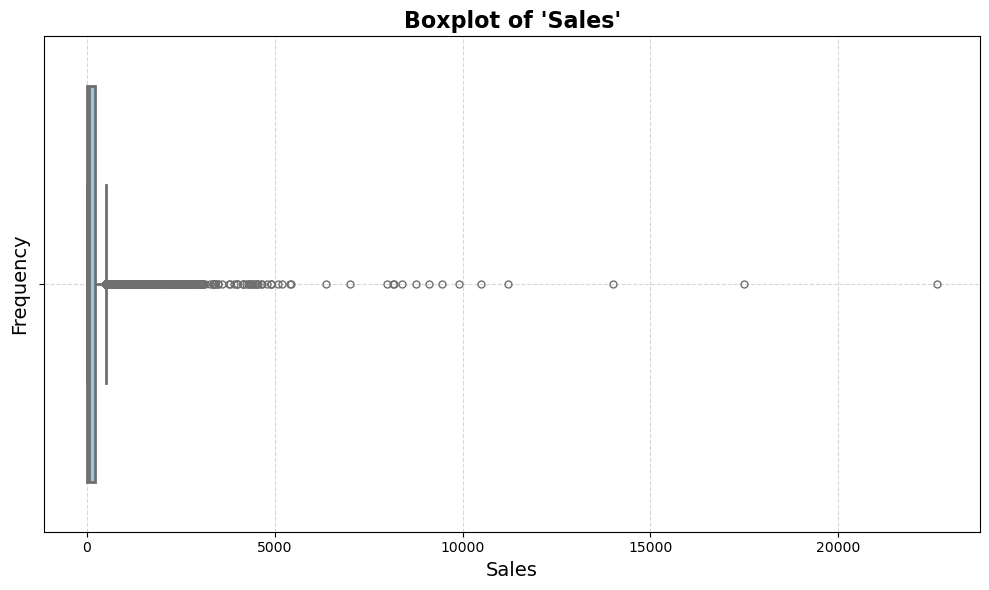

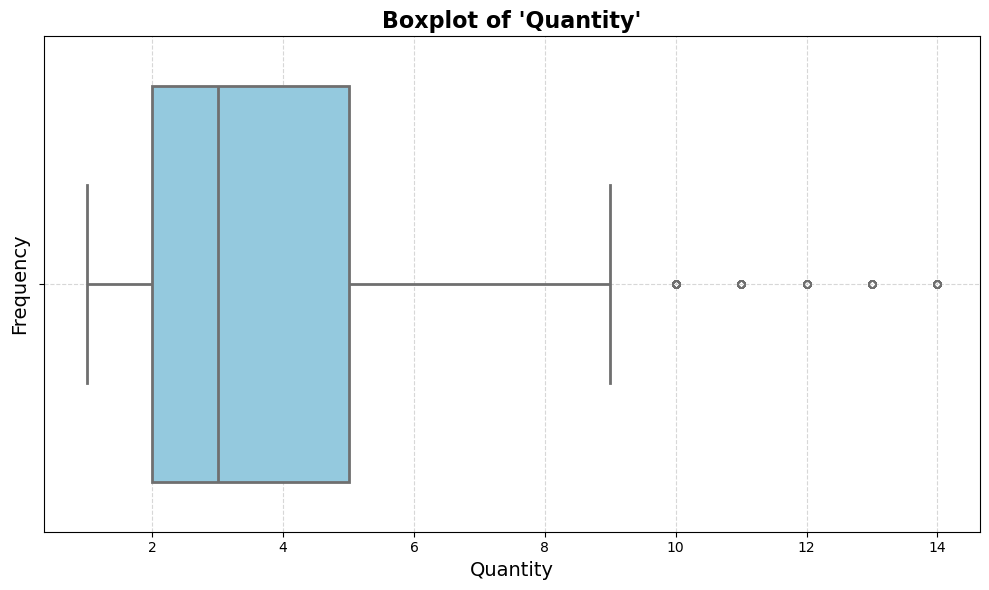

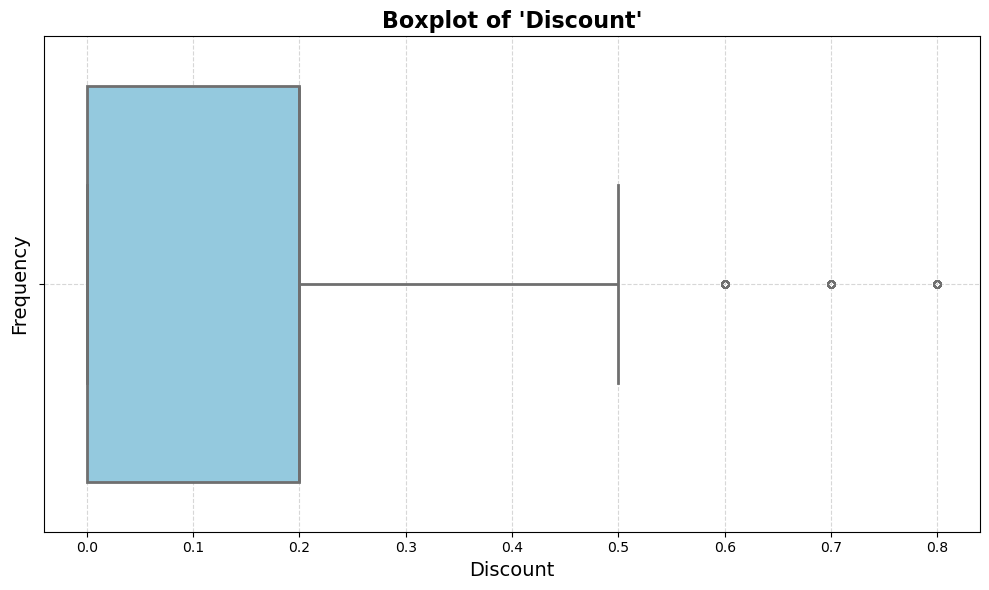

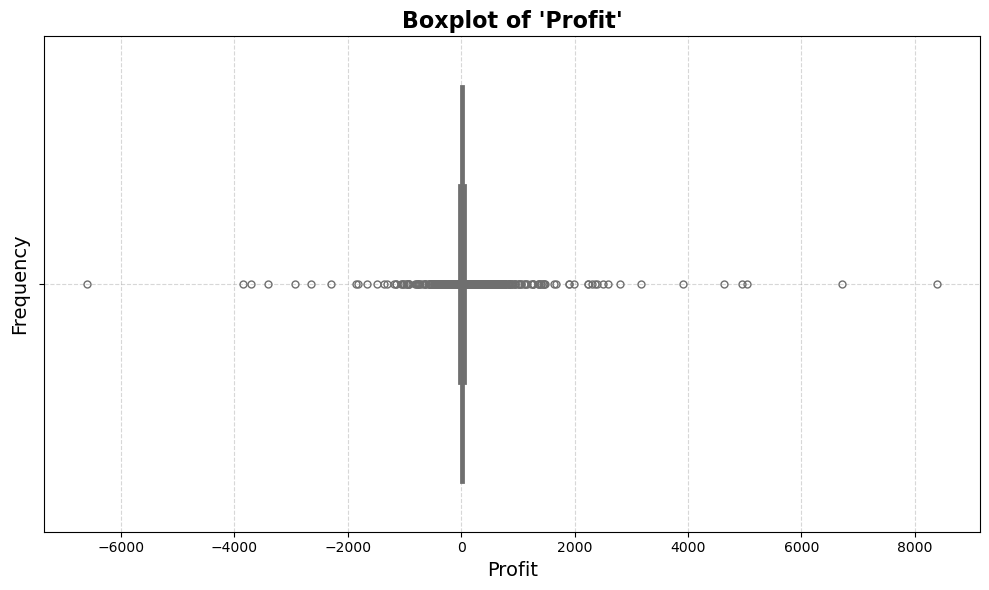

---

## Step 14: Outlier Treatment Using REMOVE Method

The **REMOVE** method eliminates rows containing extreme outliers. This can improve analysis accuracy but reduces dataset size.


Sales: Detected bounds [-271.71000000000004, 498.93] using IQR.

Quantity: Detected bounds [-2.5, 9.5] using IQR.

Discount: Detected bounds [-0.30000000000000004, 0.5] using IQR.

Profit: Detected bounds [-39.691250000000004, 70.80355] using IQR.


### Outliers After REMOVE Treatment

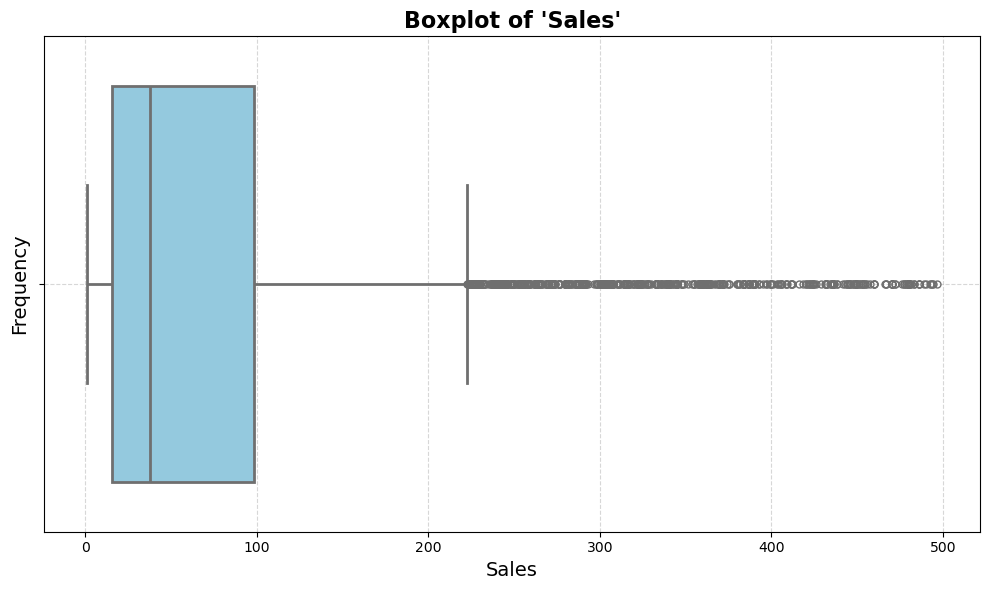

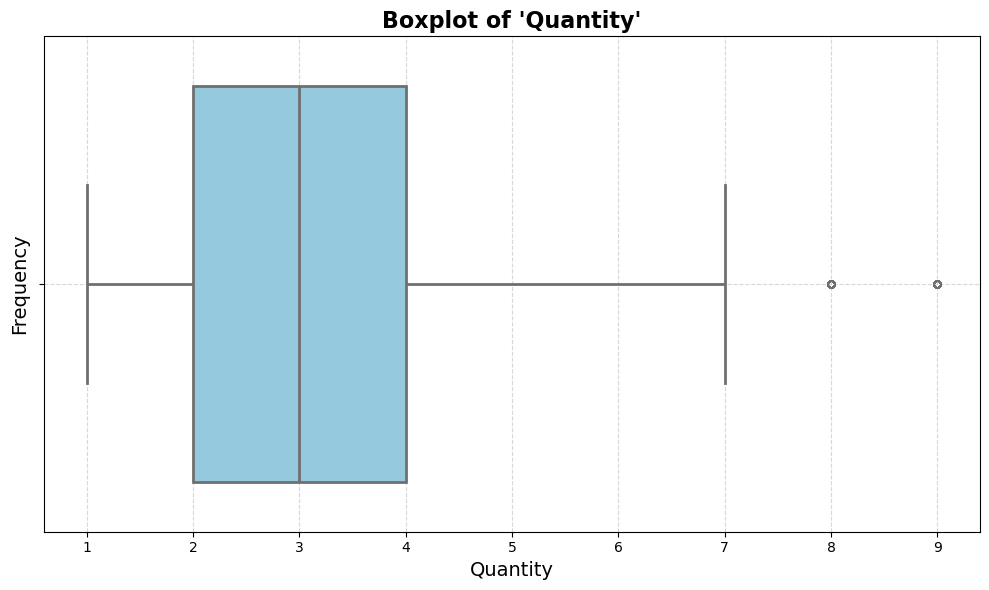

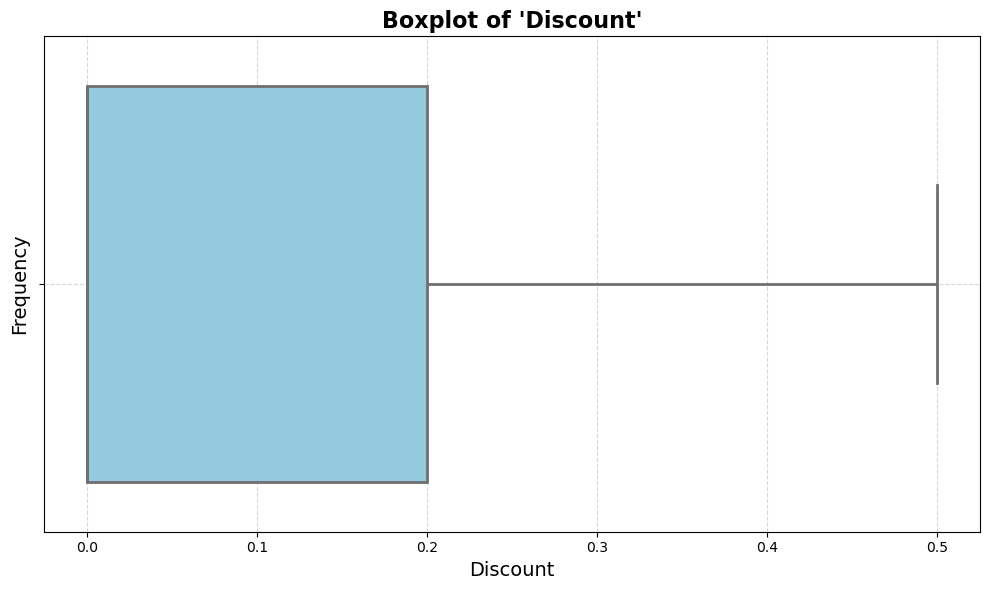

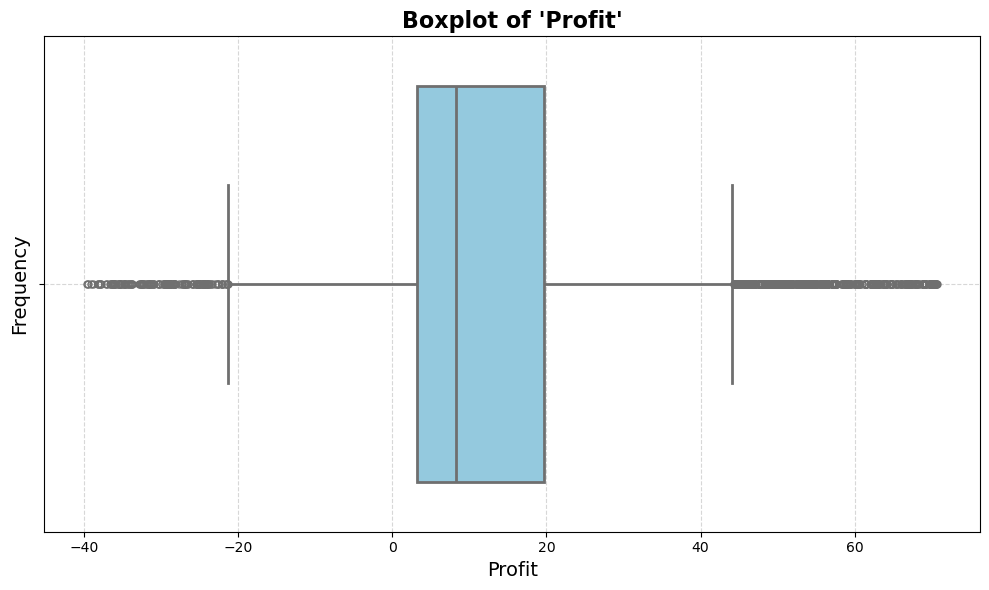

---

## Step 15: Outlier Treatment Using CAP Method

The **CAP** method limits extreme values to a specified percentile (e.g., 1st and 99th). This preserves all data points but reduces the impact of extreme outliers.


Sales: Detected bounds [-271.71000000000004, 498.93] using IQR.

Quantity: Detected bounds [-2.5, 9.5] using IQR.

Discount: Detected bounds [-0.30000000000000004, 0.5] using IQR.

Profit: Detected bounds [-39.691250000000004, 70.80355] using IQR.


### Outliers After CAP Treatment

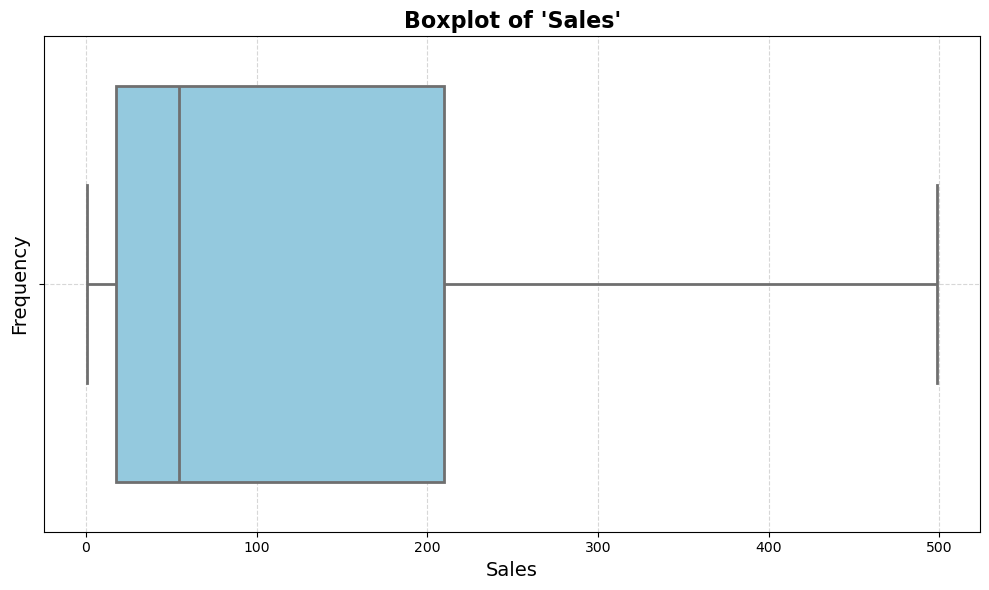

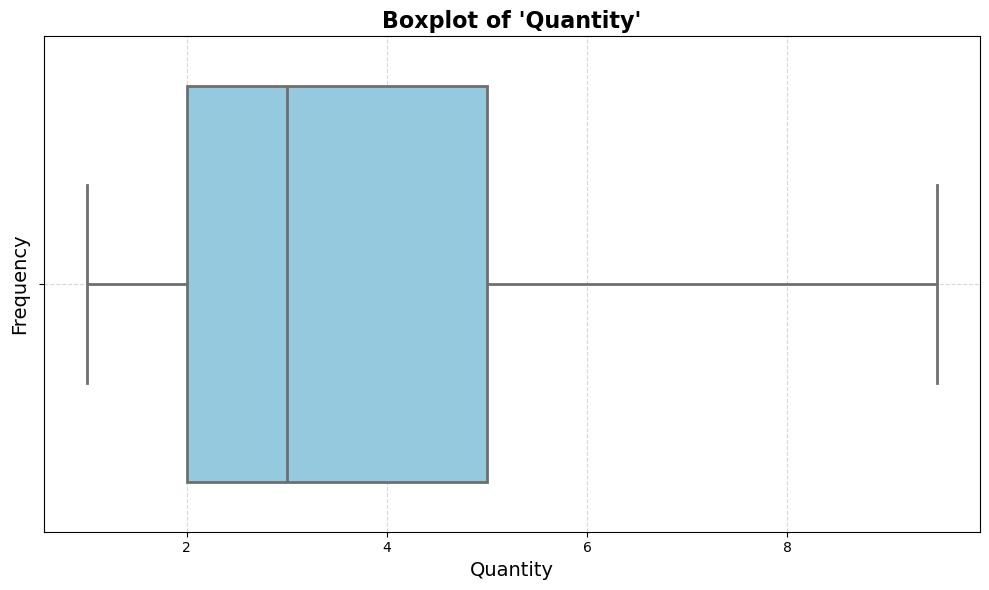

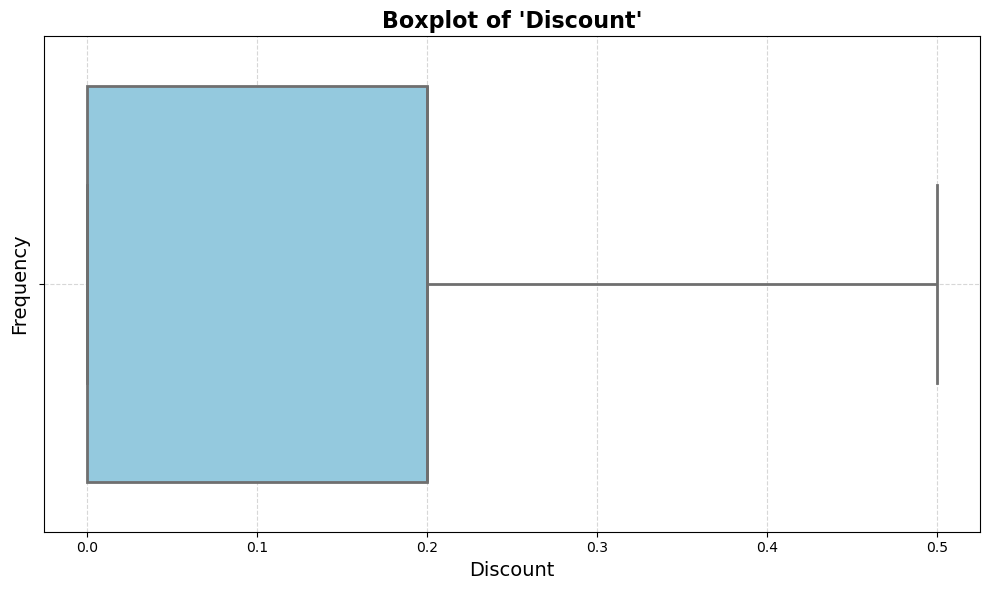

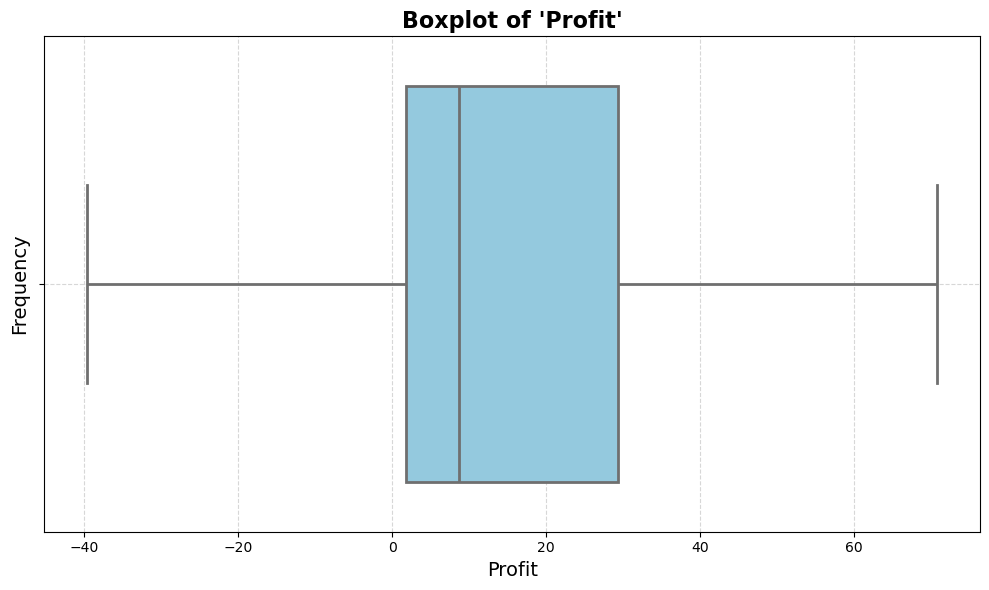

---

## Step 16: Outlier Treatment Using TRANSFORM (Yeo-Johnson Method)

The **Yeo-Johnson transformation** is a power transformation that reduces **skewness** and stabilises variance while accommodating both positive and negative values. This method helps normalise the data without removing or capping values.


Sales: Detected bounds [-271.71000000000004, 498.93] using IQR.

Quantity: Detected bounds [-2.5, 9.5] using IQR.

Discount: Detected bounds [-0.30000000000000004, 0.5] using IQR.

Profit: Detected bounds [-39.691250000000004, 70.80355] using IQR.


### Outliers After TRANSFORM (Yeo-Johnson)

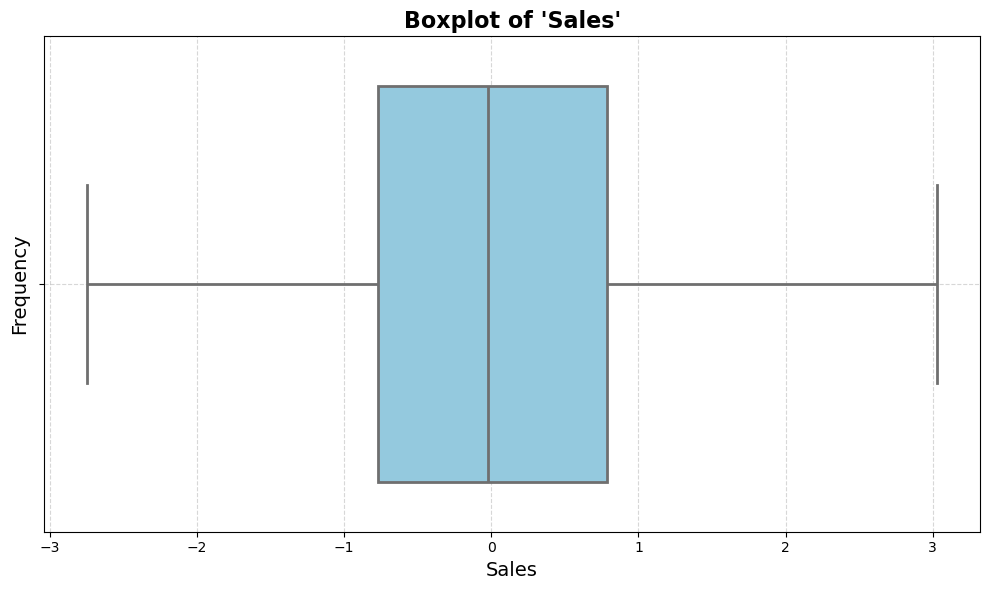

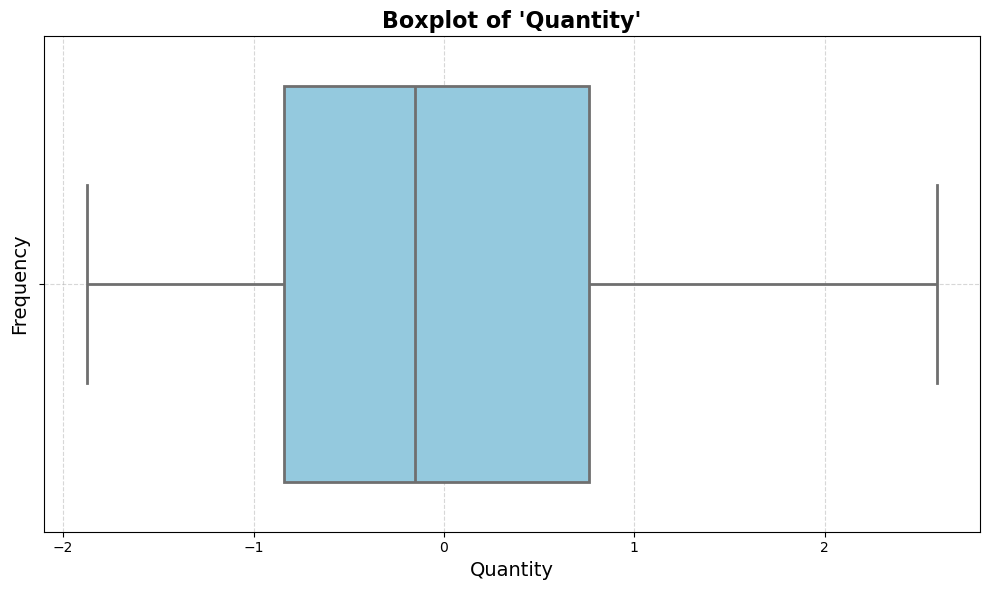

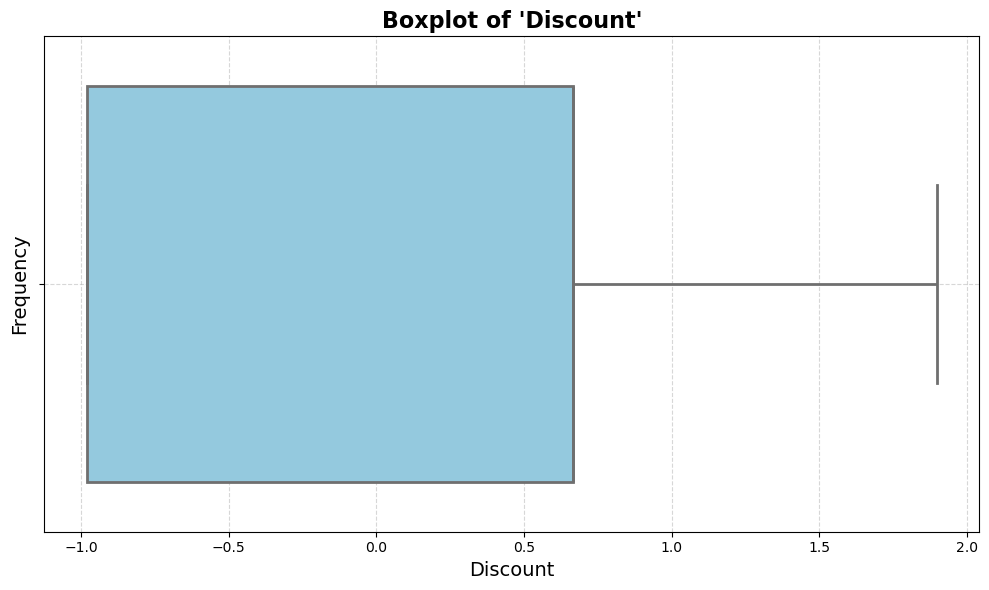

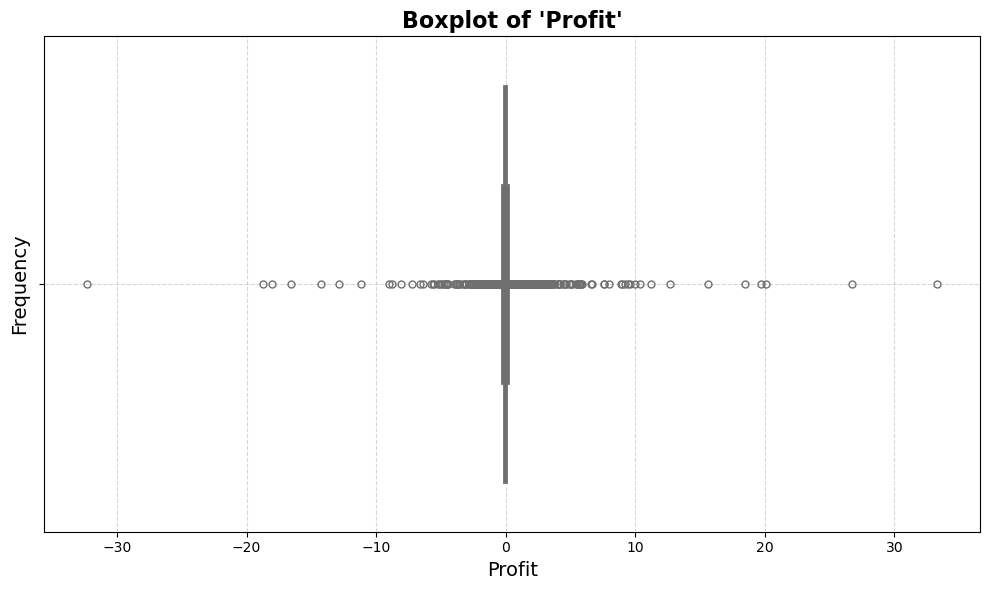

---

## Step 17: Outlier Treatment Using TRANSFORM (Box-Cox Method)

The **Box-Cox transformation** is a power transformation technique used to stabilise variance and make the data more normally distributed. It requires **strictly positive values** in the dataset.


Sales: Detected bounds [-271.71000000000004, 498.93] using IQR.

Quantity: Detected bounds [-2.5, 9.5] using IQR.

Discount: Detected bounds [-0.30000000000000004, 0.5] using IQR.


**Negative values not allowed: Box-Cox transform requires strictly positive values in 'Discount'.**

---

## Step 20: Outlier Treatment Using IMPUTE Method

The **IMPUTE method** replaces outlier values with a more suitable estimate (e.g., median or mean) rather than removing or transforming them. This preserves all rows in the dataset while reducing the effect of extreme values.


Sales: Detected bounds [-271.71000000000004, 498.93] using IQR.

Quantity: Detected bounds [-2.5, 9.5] using IQR.

Discount: Detected bounds [-0.30000000000000004, 0.5] using IQR.

Profit: Detected bounds [-39.691250000000004, 70.80355] using IQR.


### Outliers After IMPUTE Method

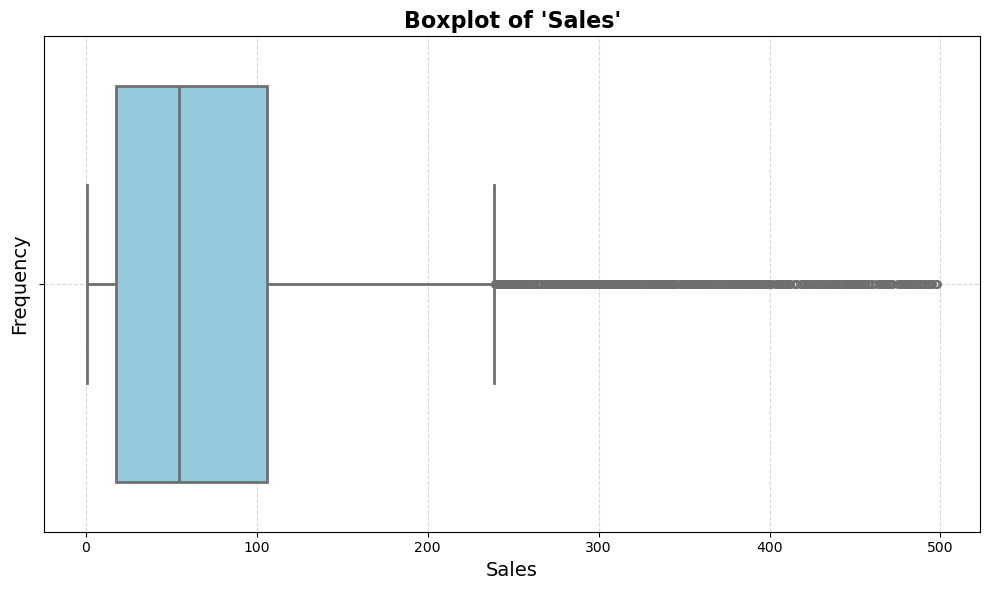

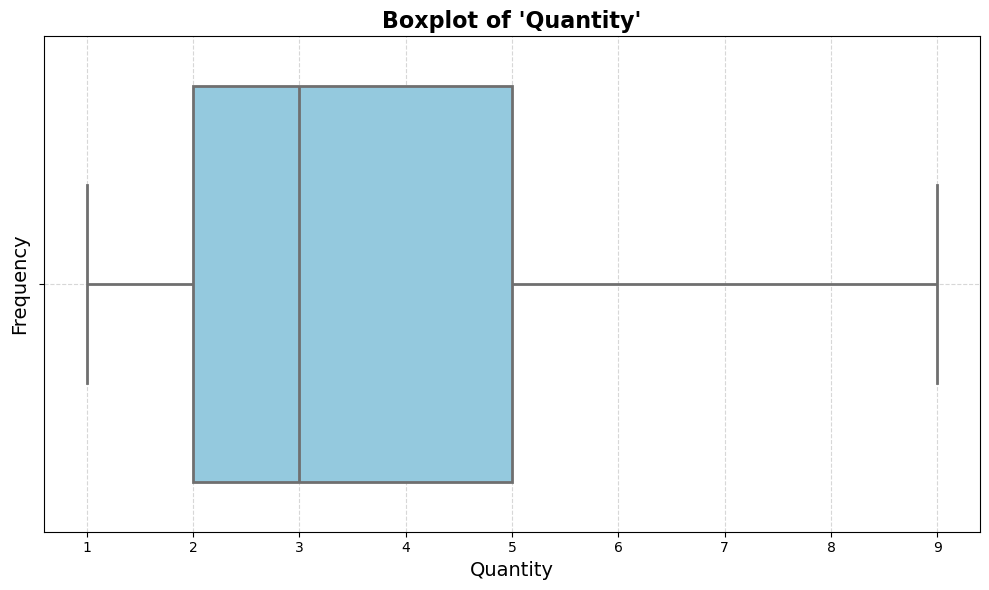

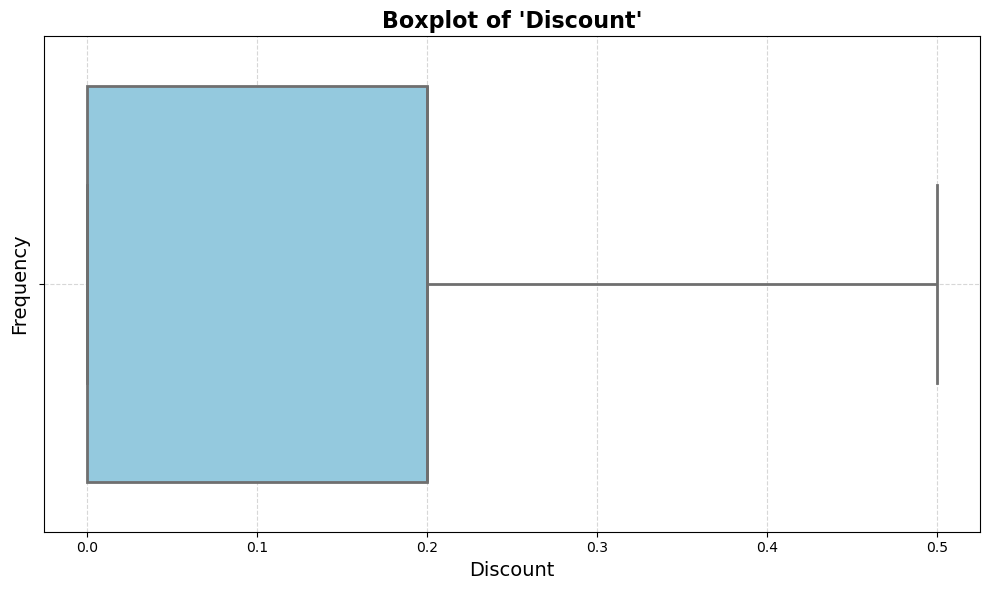

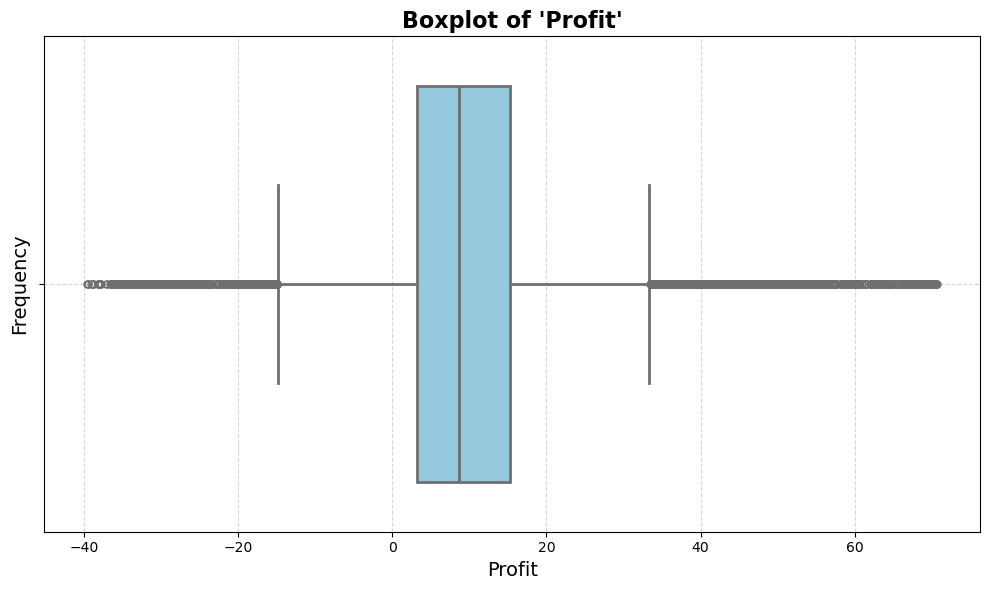

---

## Step 21: Choosing the Final Outlier Treatment Method

**Observation:** After comparing all methods, the **CAP method** provides the most balanced results—effectively handling extreme values without significantly altering data distribution. We will proceed with the **CAP**-treated dataset.

---

## Step 22: Normalising and Scaling Numerical Variables

We now **normalise** and **scale** numerical features to ensure that all variables contribute equally to analyses and models, regardless of their original scale. This step improves the performance of algorithms sensitive to feature magnitude.

Successfully scaled 'Sales' using 'NumericScaleMethods.STANDARD' method.
Successfully scaled 'Quantity' using 'NumericScaleMethods.STANDARD' method.
Successfully scaled 'Discount' using 'NumericScaleMethods.STANDARD' method.
Successfully scaled 'Profit' using 'NumericScaleMethods.STANDARD' method.


### Descriptive Statistics After Scaling

          Sales  Quantity  Discount    Profit
count  9993.000  9989.000  9991.000  9983.000
mean     -0.000     0.000     0.000     0.000
std       1.000     1.000     1.000     1.000
min      -0.828    -1.309    -0.872    -1.896
25%      -0.729    -0.834    -0.872    -0.488
50%      -0.508    -0.358     0.397    -0.253
75%       0.413     0.593     0.397     0.450
max       2.125     2.733     2.300     1.857


### Visualising Numerical Columns After Scaling

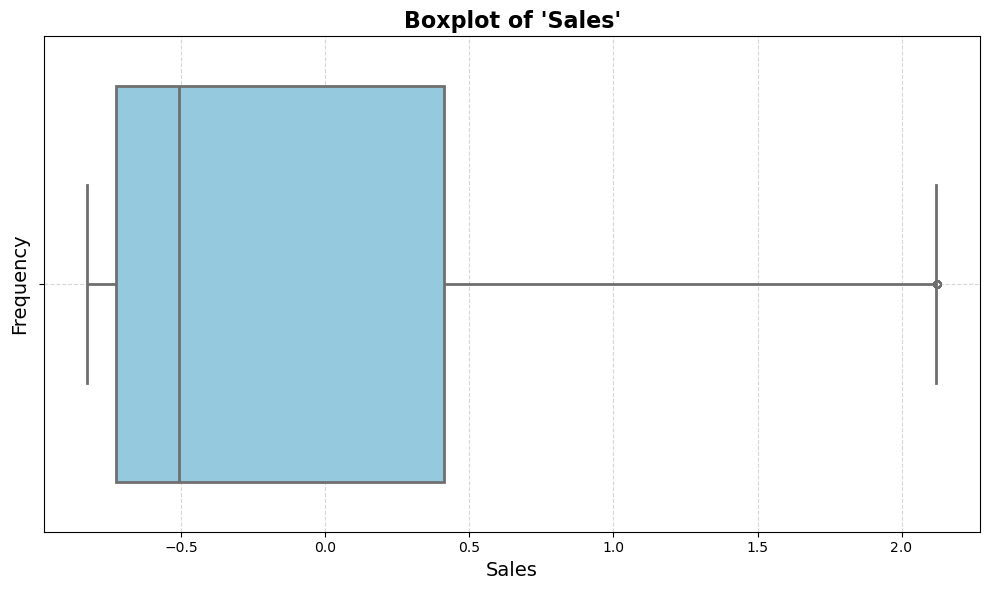

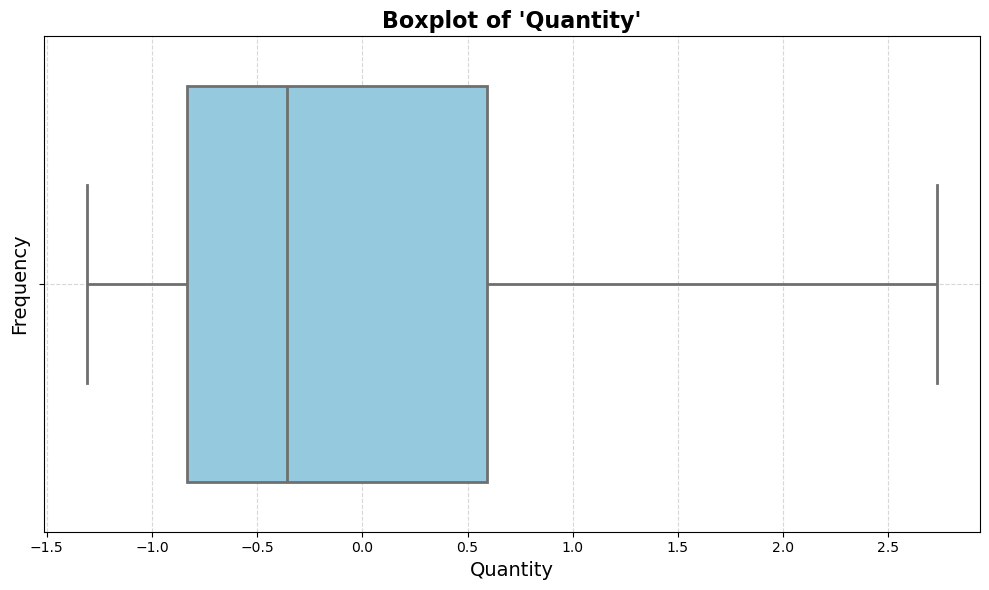

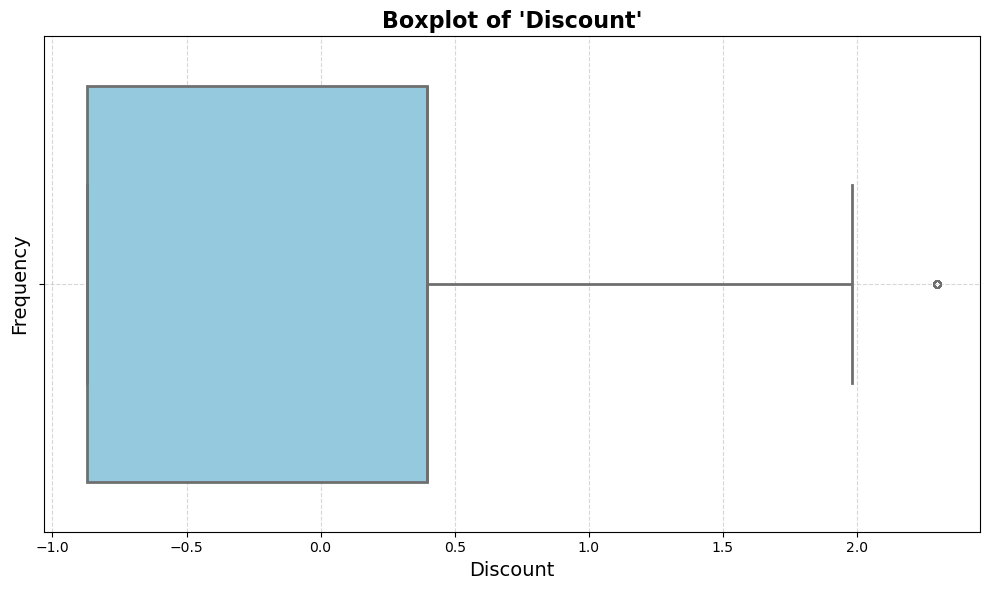

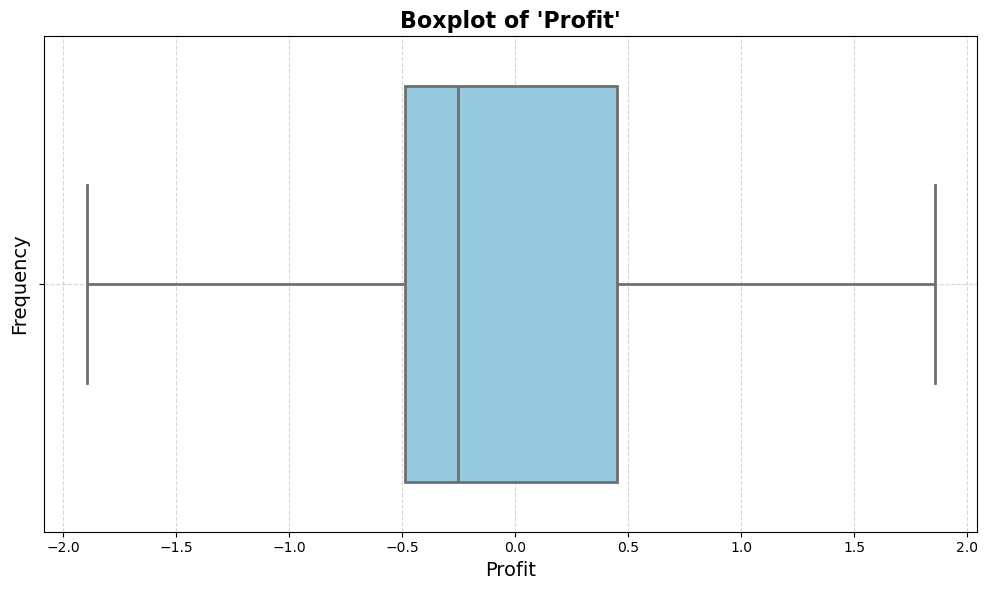

---

## Step 23: Data Aggregations

We perform **grouped aggregations** to summarise sales and profit metrics across different categorical dimensions. This helps in identifying patterns and high/low performing segments.

<Figure size 1000x600 with 0 Axes>

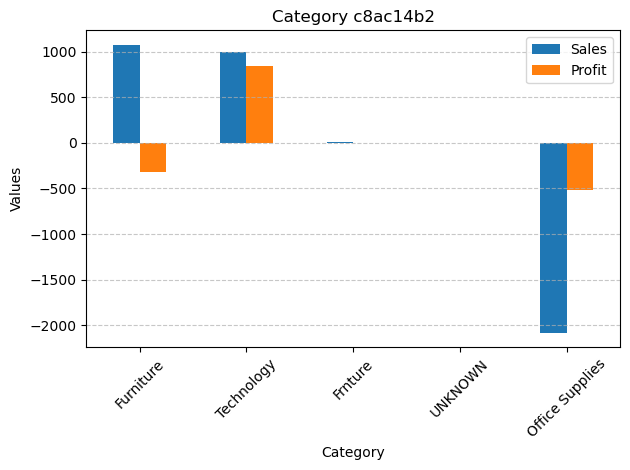

<Figure size 1000x600 with 0 Axes>

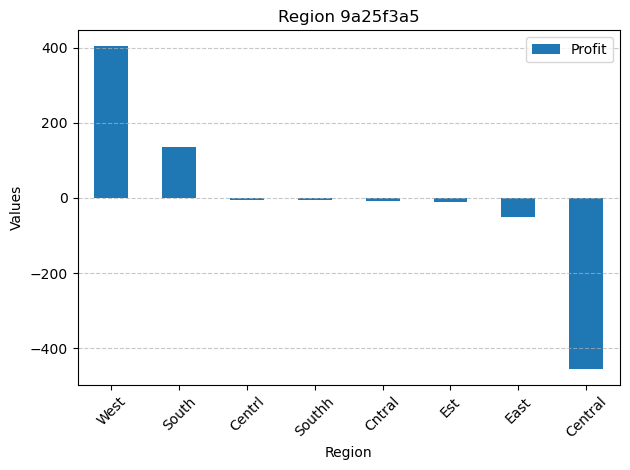

<Figure size 1000x600 with 0 Axes>

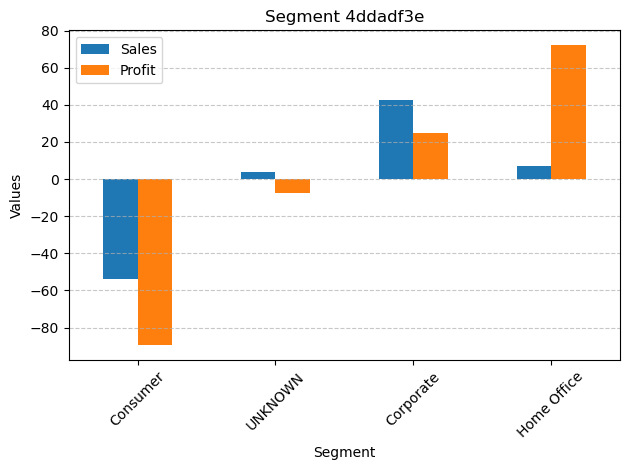

---

## Step 24: Frequency Distributions

We generate **frequency distributions** to understand the count of occurrences for different categorical variables, giving insights into data composition.

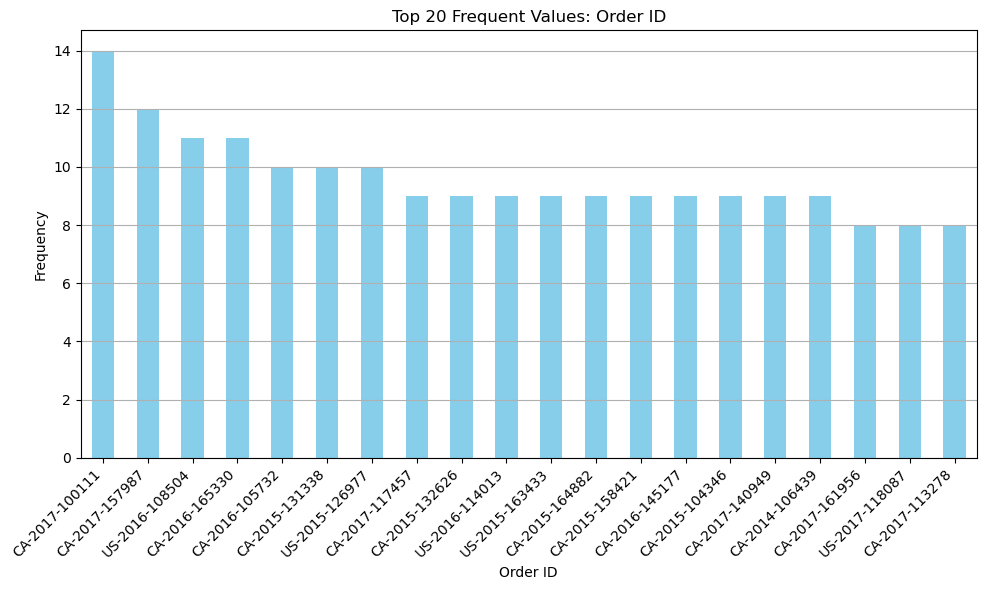

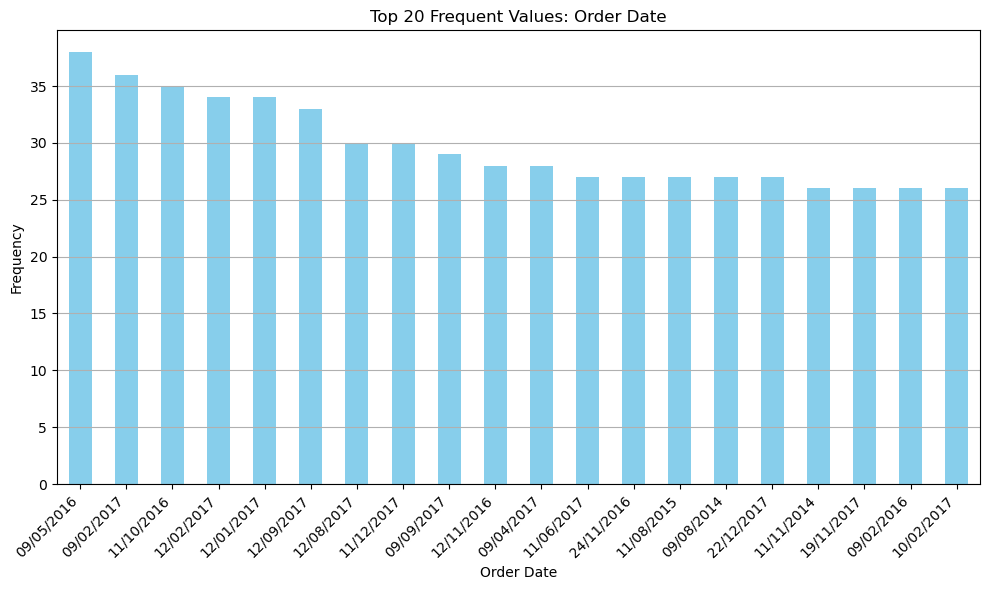

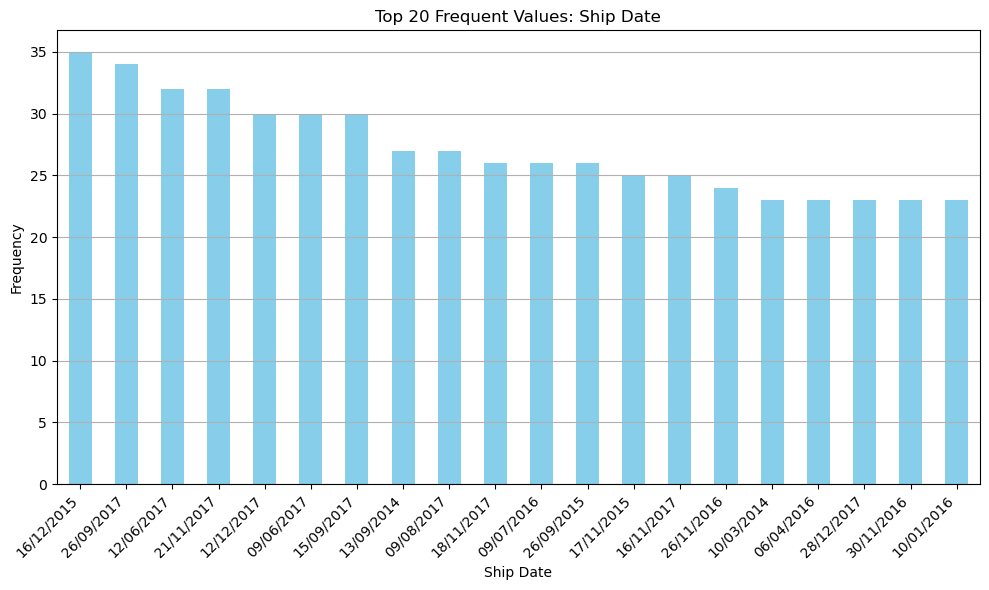

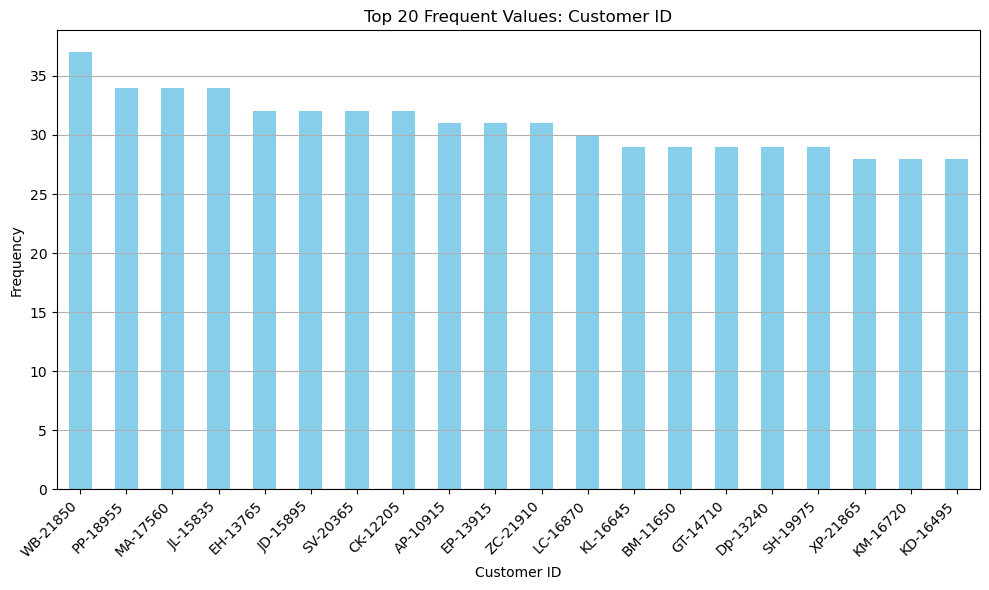

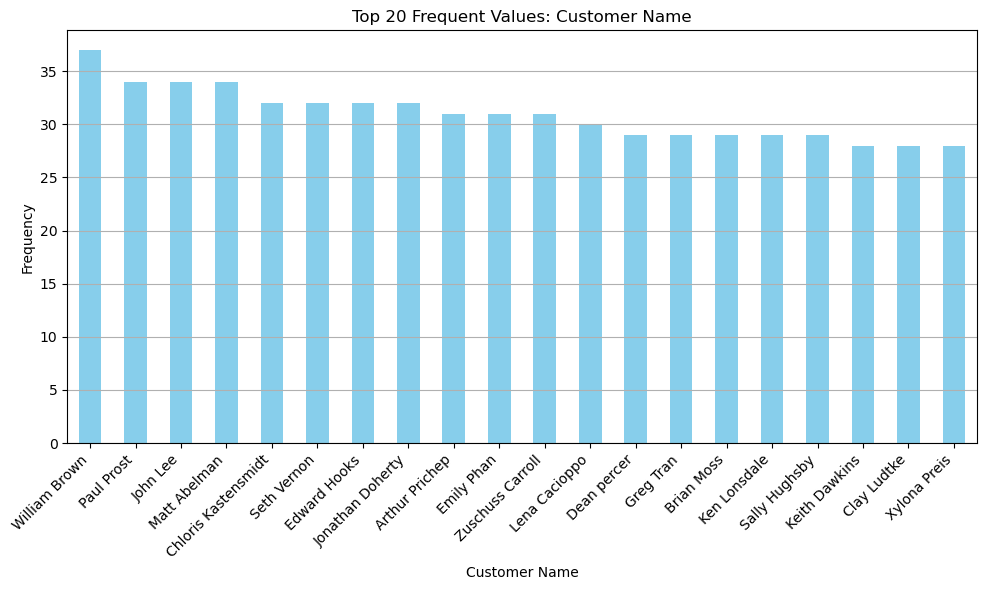

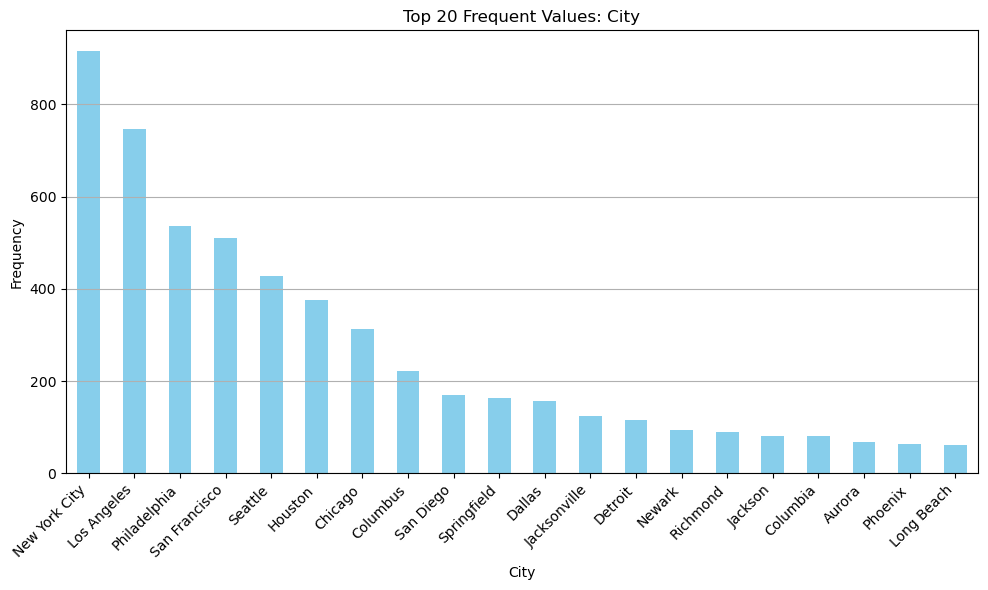

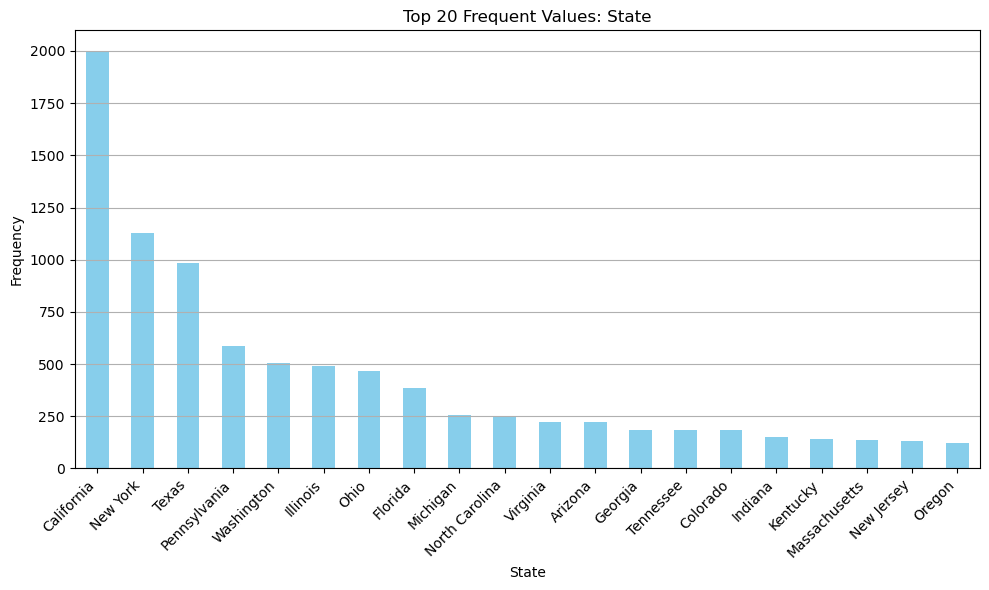

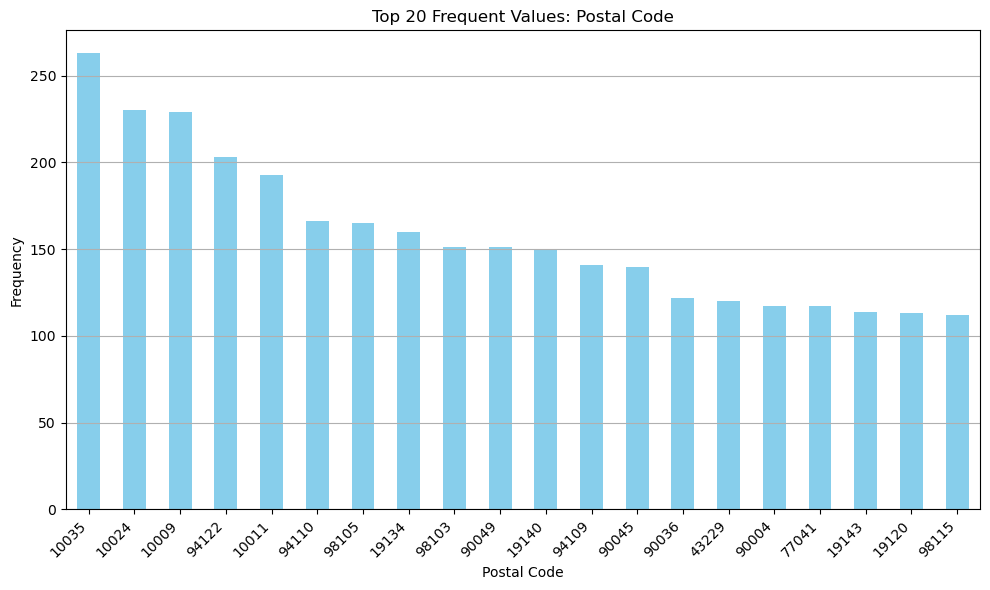

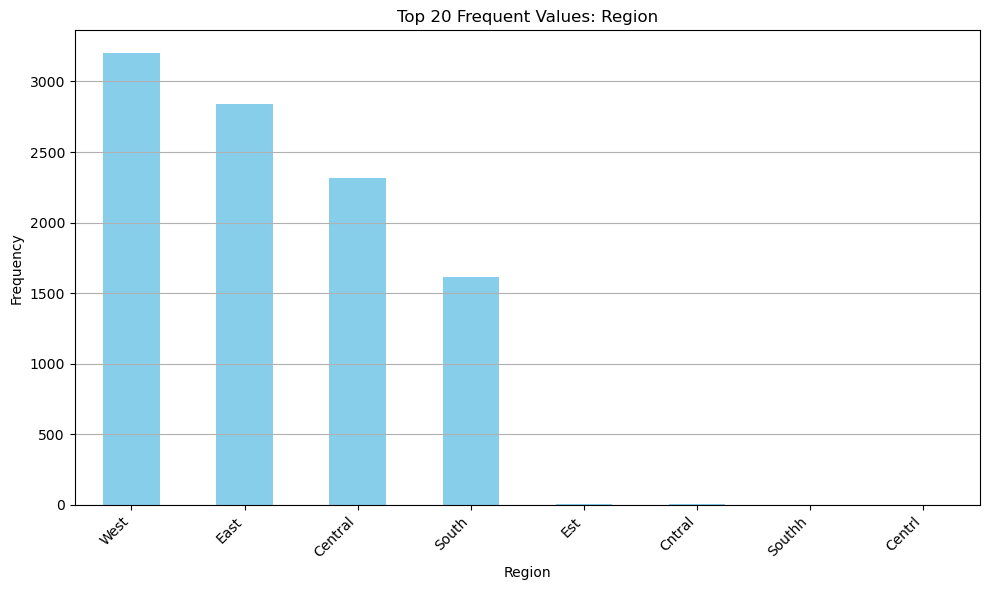

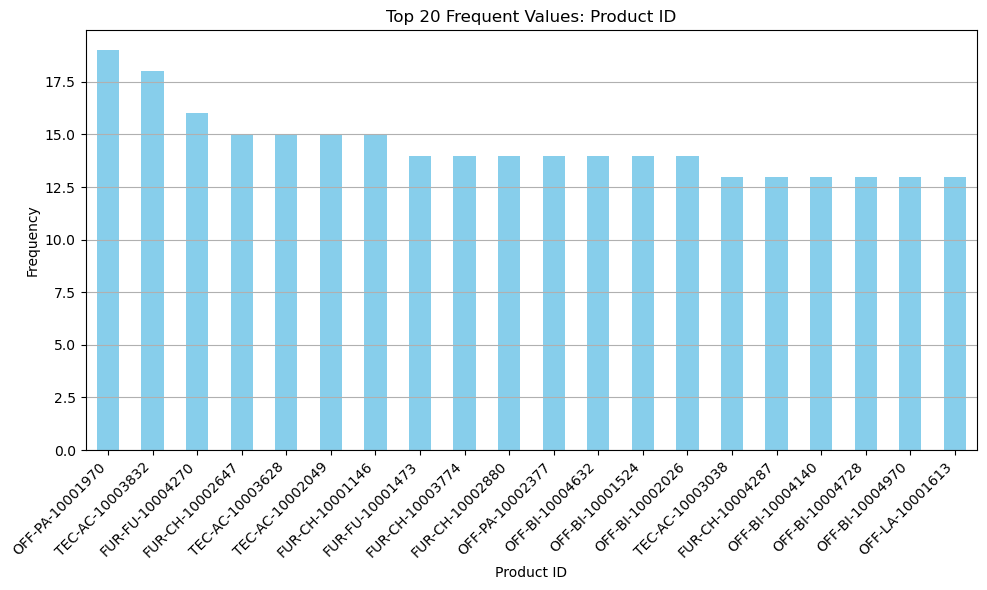

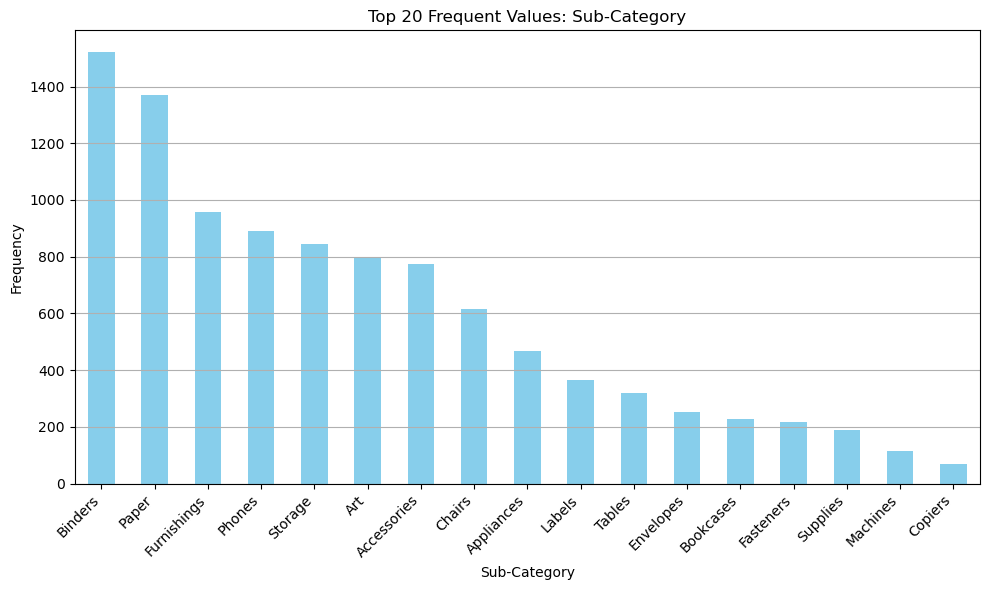

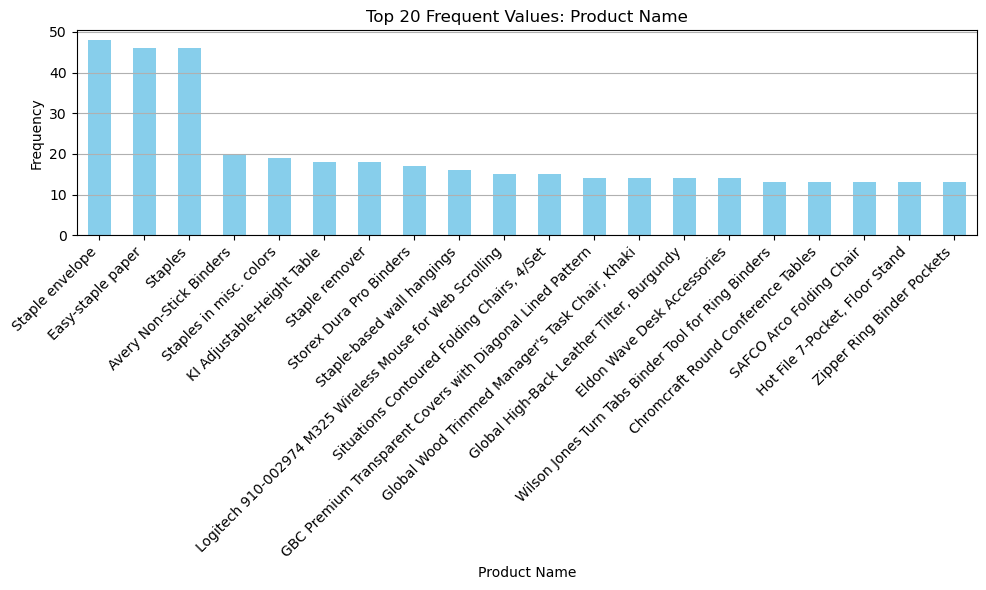

---

## Step 25: Advanced Missing Value Detection

We use an **advanced missing value summary** to detect and quantify missing data in each column. This helps in planning imputation or removal strategies.

Missing Count  Missing %
Profit                    11   0.110066
Quantity                   5   0.050030
State                      4   0.040024
Sub-Category               4   0.040024
Ship Date                  3   0.030018
Customer Name              3   0.030018
Postal Code                3   0.030018
Region                     3   0.030018
Product Name               3   0.030018
Discount                   3   0.030018
Order Date                 2   0.020012
City                       2   0.020012
Product ID                 2   0.020012
Order ID                   1   0.010006
Sales                      1   0.010006

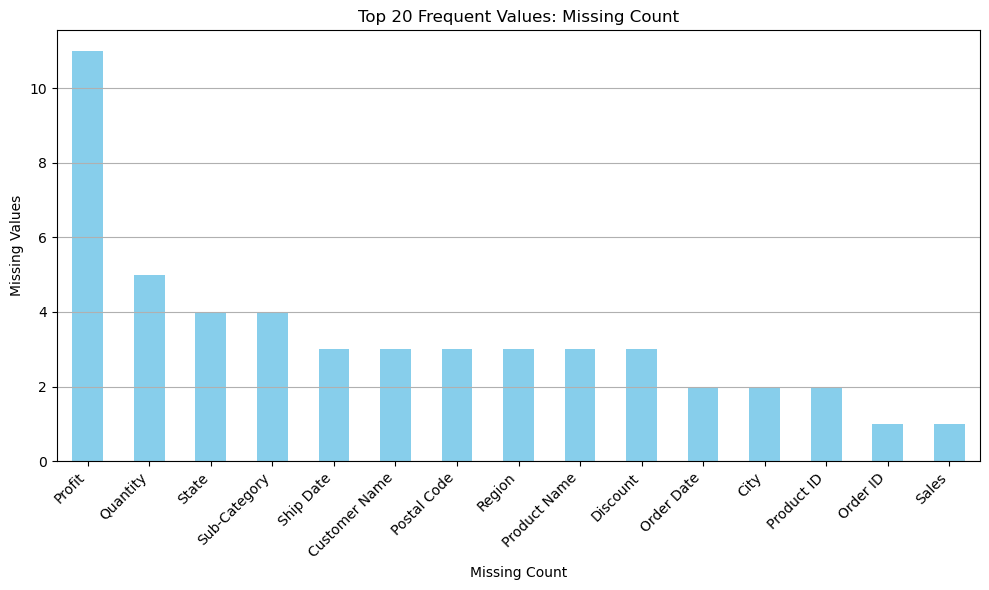

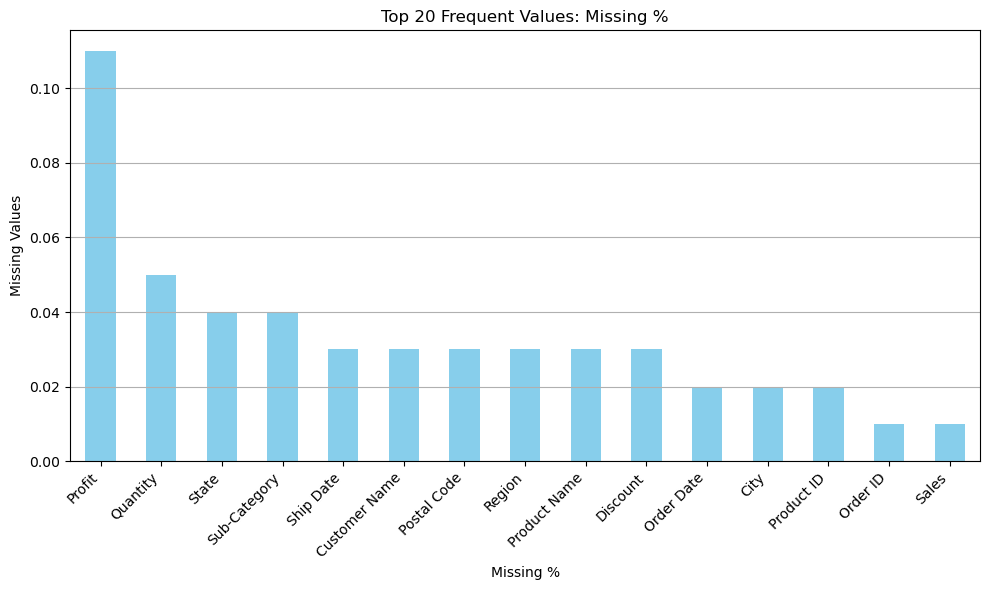

---

## Step 26: Impute Missing Values Using MEAN

We replace missing values with the **mean** of each column. This method is suitable for normally distributed numerical data.

Imputing missing values for Profit using strategy MissingValueImputationMethod.MEAN
Imputing missing values for Quantity using strategy MissingValueImputationMethod.MEAN
Imputing missing values for State using strategy MissingValueImputationMethod.MEAN
Imputing missing values for Sub-Category using strategy MissingValueImputationMethod.MEAN
Imputing missing values for Ship Date using strategy MissingValueImputationMethod.MEAN
Imputing missing values for Customer Name using strategy MissingValueImputationMethod.MEAN
Imputing missing values for Postal Code using strategy MissingValueImputationMethod.MEAN
Imputing missing values for Region using strategy MissingValueImputationMethod.MEAN
Imputing missing values for Product Name using strategy MissingValueImputationMethod.MEAN
Imputing missing values for Discount using strategy MissingValueImputationMethod.MEAN
Imputing missing values for Order Date using strategy MissingValueImputationMethod.MEAN
Imputing missing values for City using str

## Step 27: Correlation Matrix (After MEAN Imputation)

We visualise the correlation matrix to assess relationships between variables after applying mean imputation.

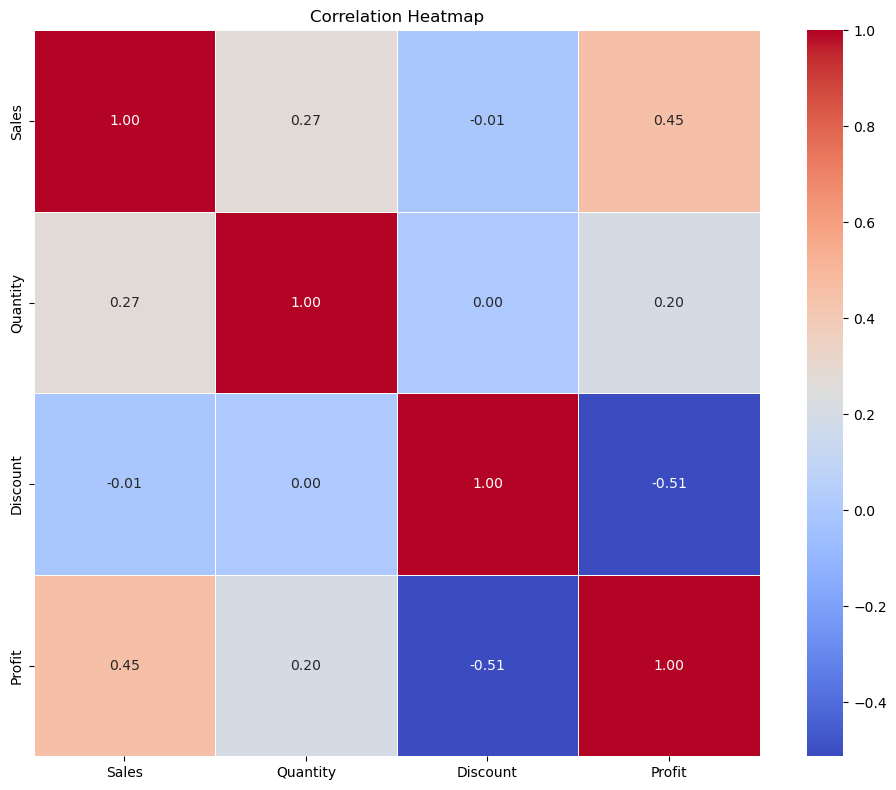

---

## Step 28: Impute Missing Values Using MEDIAN

We replace missing values with the **median** of each column. This is robust against outliers and is preferred when the data distribution is skewed.

Imputing missing values for Profit using strategy MissingValueImputationMethod.MEDIAN
Imputing missing values for Quantity using strategy MissingValueImputationMethod.MEDIAN
Imputing missing values for State using strategy MissingValueImputationMethod.MEDIAN
Imputing missing values for Sub-Category using strategy MissingValueImputationMethod.MEDIAN
Imputing missing values for Ship Date using strategy MissingValueImputationMethod.MEDIAN
Imputing missing values for Customer Name using strategy MissingValueImputationMethod.MEDIAN
Imputing missing values for Postal Code using strategy MissingValueImputationMethod.MEDIAN
Imputing missing values for Region using strategy MissingValueImputationMethod.MEDIAN
Imputing missing values for Product Name using strategy MissingValueImputationMethod.MEDIAN
Imputing missing values for Discount using strategy MissingValueImputationMethod.MEDIAN
Imputing missing values for Order Date using strategy MissingValueImputationMethod.MEDIAN
Imputing missing val

## Step 29: Correlation Matrix (After MEDIAN Imputation)

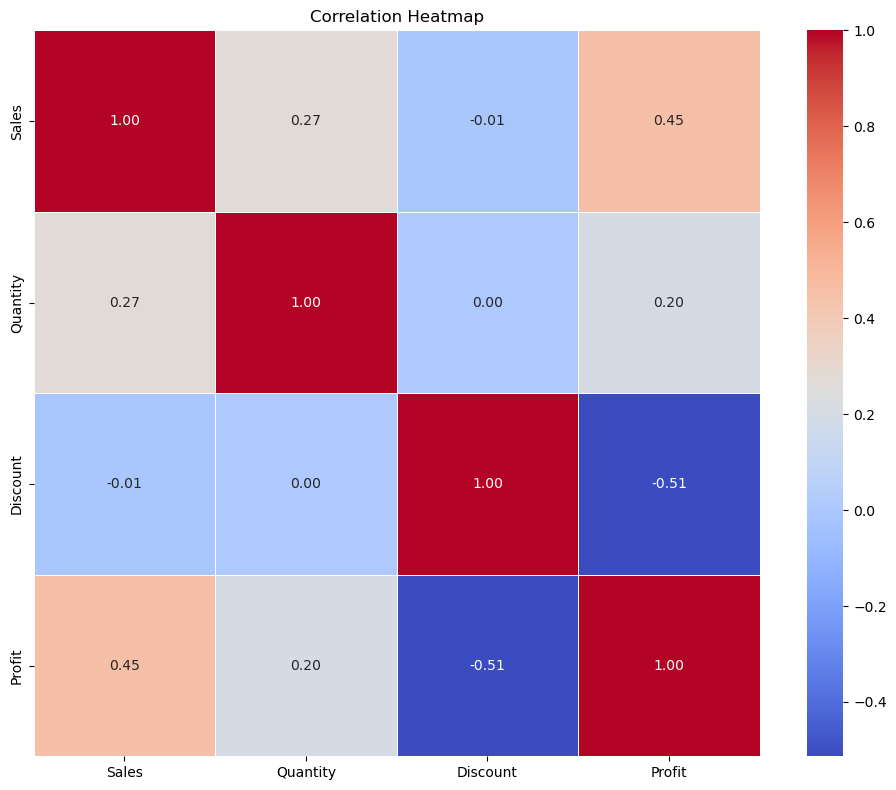

---

## Step 30: Impute Missing Values Using MODE

We replace missing values with the **mode** (most frequent value) of each column. This method is suitable for categorical data and certain discrete numerical values.

Imputing missing values for Profit using strategy MissingValueImputationMethod.MODE
Imputing missing values for Quantity using strategy MissingValueImputationMethod.MODE
Imputing missing values for State using strategy MissingValueImputationMethod.MODE
Imputing missing values for Sub-Category using strategy MissingValueImputationMethod.MODE
Imputing missing values for Ship Date using strategy MissingValueImputationMethod.MODE
Imputing missing values for Customer Name using strategy MissingValueImputationMethod.MODE
Imputing missing values for Postal Code using strategy MissingValueImputationMethod.MODE
Imputing missing values for Region using strategy MissingValueImputationMethod.MODE
Imputing missing values for Product Name using strategy MissingValueImputationMethod.MODE
Imputing missing values for Discount using strategy MissingValueImputationMethod.MODE
Imputing missing values for Order Date using strategy MissingValueImputationMethod.MODE
Imputing missing values for City using str

## Step 31: Correlation Matrix (After MODE Imputation)

We visualise the correlation matrix to check how relationships between variables look after applying **mode imputation**.

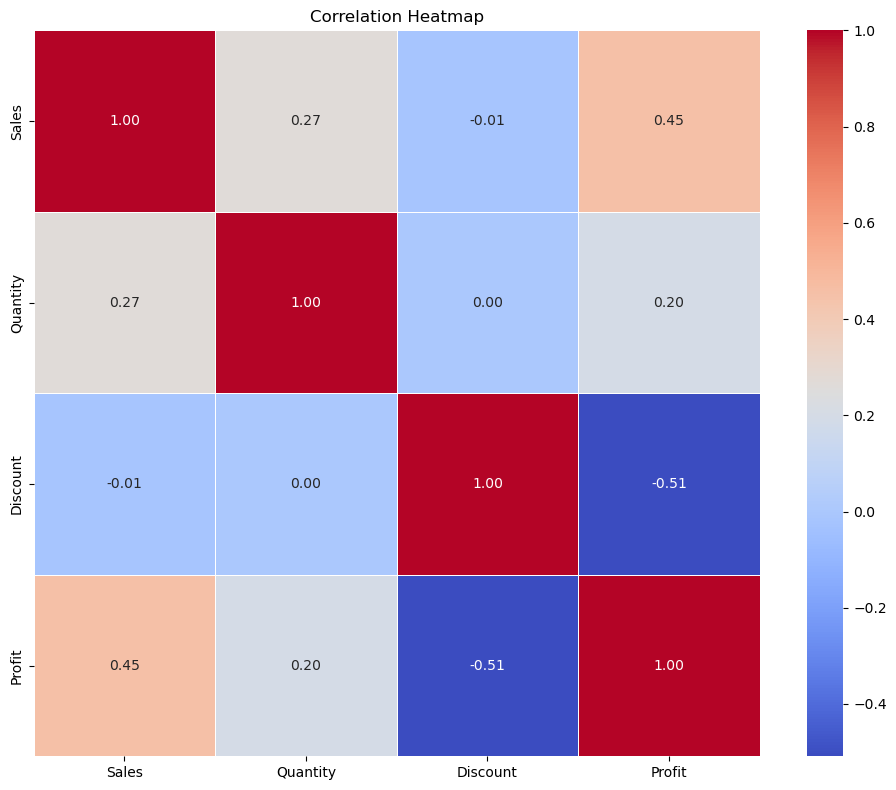

---

## Step 32: Impute Missing Values Using CONSTANT

We replace missing values with a fixed **constant** value (e.g., 0 or a placeholder). This approach can be useful when missing data represents a meaningful category.

Imputing missing values for Profit using strategy MissingValueImputationMethod.CONSTANT
Imputing missing values for Quantity using strategy MissingValueImputationMethod.CONSTANT
Imputing missing values for State using strategy MissingValueImputationMethod.CONSTANT
Imputing missing values for Sub-Category using strategy MissingValueImputationMethod.CONSTANT
Imputing missing values for Ship Date using strategy MissingValueImputationMethod.CONSTANT
Imputing missing values for Customer Name using strategy MissingValueImputationMethod.CONSTANT
Imputing missing values for Postal Code using strategy MissingValueImputationMethod.CONSTANT
Imputing missing values for Region using strategy MissingValueImputationMethod.CONSTANT
Imputing missing values for Product Name using strategy MissingValueImputationMethod.CONSTANT
Imputing missing values for Discount using strategy MissingValueImputationMethod.CONSTANT
Imputing missing values for Order Date using strategy MissingValueImputationMethod.CONSTAN

## Step 33: Correlation Matrix (After CONSTANT Imputation)

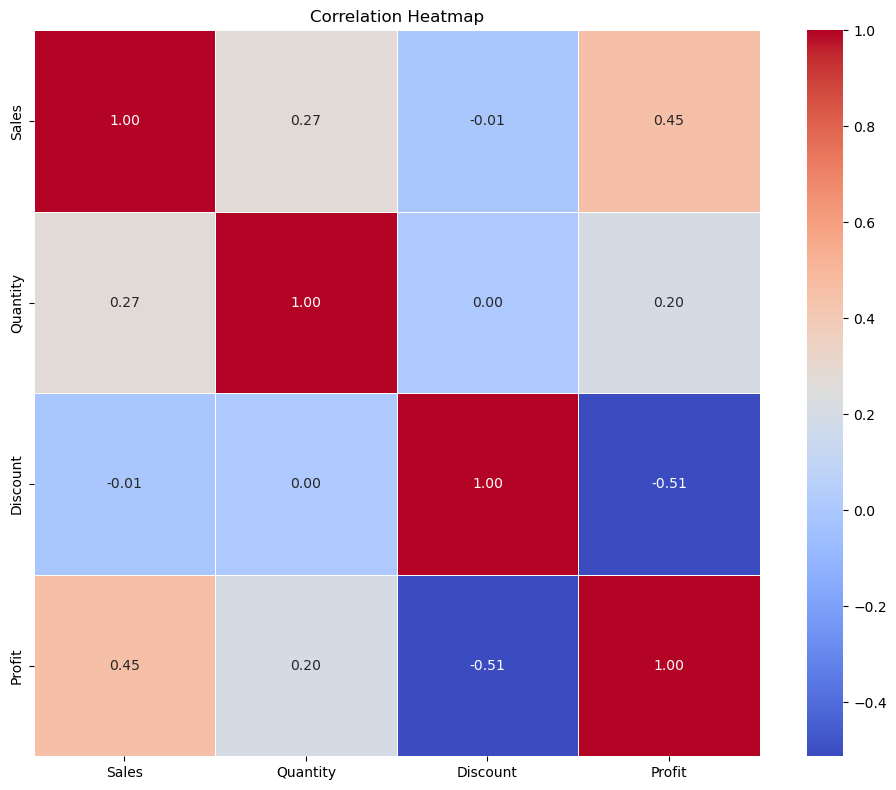

---

## Step 34: Update Exploratory Data

**Observation:** All imputation methods yield similar results in this dataset. For simplicity and suitability, we will proceed with the **MODE** method for further analysis.

---

In [91]:
try:
    # Initialise plotter and exploratory data analysis objects
    edaPlotter = EDAPlotter()
    exp_data_analysis = ExploratoryDataAnalysis('sample-superstore.csv')
        
    # Step 1: Dataset Inspection
    display(Markdown("## Step 1: Inspecting the Dataset"))
    display(Markdown(
        "Before diving into analysis, we first examine the dataset's overall structure "
        "including its **dimensions**, **column names**, and **sample data**. "
        "This initial inspection helps identify potential issues or insights early on."
    ))
    exp_data_analysis.inspect()
    display(Markdown("---")) 
        
    # Step 2: Display Data Types and Non-Null Counts
    display(Markdown("## Step 2: Data Types and Non-Null Counts"))
    display(Markdown(
        "Understanding each column's data type alongside **non-null** counts reveals the "
        "data's readiness for analysis. It informs necessary preprocessing like "
        "**type conversions** or handling **missing values** to maintain data quality."
    ))
    exp_data_analysis.basic_info()
    display(Markdown("---")) 
        
    # Step 3: Analyse Missing Values
    display(Markdown("## Step 3: Analyzing Missing Values"))
    display(Markdown(
        "Missing data can bias results and degrade model performance. "
        "Here, we quantify missing values per column to guide decisions on **imputation** or **removal**."
    ))
    exp_data_analysis.missing_value_info()
    display(Markdown("---")) 
        
    # Step 4: Identify Candidate Categorical Columns
    display(Markdown("## Step 4: Identify Candidate Categorical Columns"))
    display(Markdown(
        "Categorical variables often have a limited number of unique values. "
        "Here, we select columns with 5 or fewer unique values as potential categorical features. "
        "These columns may require special handling such as encoding or targeted imputation **(Han et al., 2011)**."
    ))
    categorical_columns = exp_data_analysis.get_categorical_candidates(5)
    print("Categorical candidate columns:", categorical_columns)
    display(Markdown("---"))
        
    # Step 5: Fill Missing Values in Categorical Columns
    display(Markdown("## Step 5: Impute Missing Values in Categorical Columns"))
    display(Markdown(
        "To maintain data **integrity**, **missing values** in categorical columns are filled with the placeholder 'UNKNOWN'. "
        "This avoids null-related errors in subsequent analyses and preserves category completeness."
    ))
    exp_data_analysis.fill_missing_values(categorical_columns, fill_value="UNKNOWN")
    print("\n")
    display(Markdown("---"))
        
    # Step 6: Display Unique Values Post-Imputation
    display(Markdown("## Step 6: Unique Values After Imputation"))
    display(Markdown(
        "After filling **missing values**, we print unique values in the categorical columns to verify the changes."
    ))
    exp_data_analysis.print_uniques(columns=categorical_columns)
    display(Markdown("---"))
        
    # Step 7: Data Cleansing - Replace Known Erroneous Values
    display(Markdown("## Step 7: Data Cleansing - Replace Known Erroneous Values"))
    display(Markdown(
        "Certain columns contain known bad or inconsistent values that need correction. "
        "Here, we replace such values with appropriate cleaned or placeholder values to ensure **data consistency**."
    ))
    exp_data_analysis.replace_values([
        ColumnValueReplacer('Segment', '%', 'UNKNOWN'),
        ColumnValueReplacer('Country', '56', 'UNKNOWN'),
        ColumnValueReplacer('Quantity', 'Two', 2),
        ColumnValueReplacer('Quantity', 'Thirteen', 13),
        ColumnValueReplacer('Quantity', 'Seven', 7),
        ColumnValueReplacer('Quantity', 'ten', 10),
        ColumnValueReplacer('Quantity', '7?', 7)
    ])
        
    # Step 8: Verify Data Cleansing Results by Checking Unique Values
    display(Markdown("## Step 8: Verify Data Cleansing Results"))
    display(Markdown(
        "After replacements, print **unique values** of categorical columns to confirm that erroneous entries have been addressed."
    ))
    exp_data_analysis.print_uniques(columns=categorical_columns)
    display(Markdown("---"))
        
    # Step 9: Convert Categorical Columns to 'category' dtype for Memory Efficiency
    display(Markdown("## Step 9: Optimize Data Types - Convert Categorical Columns"))
    display(Markdown(
        "Converting columns with limited unique values to the 'category' data type reduces memory usage "
        "and speeds up certain operations **(Pandas Documentation, 2023)**."
    ))
    exp_data_analysis.convert_columns_dtype({col: 'category' for col in categorical_columns})
        
    # Step 10: Convert Numeric Columns ('Profit', 'Quantity') to Float for Consistent Numeric Operations
    display(Markdown("## Step 10: Ensure Correct Numeric Data Types"))
    display(Markdown(
        "Convert **Profit** and **Quantity** columns to float type to ensure consistency and enable numeric computations."
    ))
    exp_data_analysis.convert_columns_dtype({'Profit': 'float', 'Quantity': 'float'})
    display(Markdown("---"))
        
    # Step 11: Generate and Display Descriptive Statistics to Understand Data Distribution
    display(Markdown("## Step 11: Descriptive Statistics Summary"))
    display(Markdown(
        "Provides key statistics such as **mean**, **median**, **min**, **max**, and **quartiles** to summarise numeric columns."
    ))
    exp_data_analysis.descriptive_stats()
    display(Markdown("---"))

    # Step 12: Select Numeric Columns
    display(Markdown("## Step 12: Selecting Numeric Columns"))
    display(Markdown(
        "Numeric columns are required for statistical analysis and outlier detection. "
        "Here, we extract columns of type **float**, **float64**, or **int64**."
    ))
    numeric_columns = exp_data_analysis.get_columns_by_types(['float', 'float64', 'int64'])
    print(numeric_columns)
    display(Markdown("---"))

    # Step 13: Visualise Outliers in Numeric Data
    display(Markdown("## Step 13: Visualising Outliers (Before Treatment)"))
    display(Markdown(
        "Boxplots provide a quick overview of data spread and help identify extreme values (outliers). "
        "This step visualises potential outliers in the selected numeric columns."
    ))
    edaPlotter.plot_boxplot(exp_data_analysis.get_exploratory_data_frame(), numeric_columns) 
    display(Markdown("---"))

    # Step 14: Outlier Treatment - REMOVE Method
    display(Markdown("## Step 14: Outlier Treatment Using REMOVE Method"))
    display(Markdown(
        "The **REMOVE** method eliminates rows containing extreme outliers. "
        "This can improve analysis accuracy but reduces dataset size."
    ))
    dataAfterRemoveMethod = exp_data_analysis.treat_outliers(numeric_columns, method=OutlierRemovalMethods.REMOVE)

    # Step 14.1: Visualise Outliers After REMOVE Treatment
    display(Markdown("### Outliers After REMOVE Treatment"))
    edaPlotter.plot_boxplot(dataAfterRemoveMethod, numeric_columns)
    display(Markdown("---"))

    # Step 15: Outlier Treatment - CAP Method
    display(Markdown("## Step 15: Outlier Treatment Using CAP Method"))
    display(Markdown(
        "The **CAP** method limits extreme values to a specified percentile (e.g., 1st and 99th). "
        "This preserves all data points but reduces the impact of extreme outliers."
    ))
    dataAfterCapMethod = exp_data_analysis.treat_outliers(numeric_columns, method=OutlierRemovalMethods.CAP)

    # Step 15.1: Visualise Outliers After CAP Treatment
    display(Markdown("### Outliers After CAP Treatment"))
    edaPlotter.plot_boxplot(dataAfterCapMethod, numeric_columns)
    display(Markdown("---"))

    # Step 16: Outlier Treatment - TRANSFORM (Yeo-Johnson Method)
    display(Markdown("## Step 16: Outlier Treatment Using TRANSFORM (Yeo-Johnson Method)"))
    display(Markdown(
        "The **Yeo-Johnson transformation** is a power transformation that reduces **skewness** "
        "and stabilises variance while accommodating both positive and negative values. "
        "This method helps normalise the data without removing or capping values."
    ))
    dataAfterTransformYeoJohnsonMethod = exp_data_analysis.treat_outliers(
        numeric_columns, method=OutlierRemovalMethods.TRANSFORM_YEO_JOHNSON
    )

    # Step 16.1: Visualise Outliers After Yeo-Johnson Transformation
    display(Markdown("### Outliers After TRANSFORM (Yeo-Johnson)"))
    edaPlotter.plot_boxplot(dataAfterTransformYeoJohnsonMethod, numeric_columns) 
    display(Markdown("---"))

    try:
        # Step 17: Outlier Treatment - TRANSFORM (Box-Cox Method)
        display(Markdown("## Step 17: Outlier Treatment Using TRANSFORM (Box-Cox Method)"))
        display(Markdown(
            "The **Box-Cox transformation** is a power transformation technique used to "
            "stabilise variance and make the data more normally distributed. "
            "It requires **strictly positive values** in the dataset."
        ))
        dataAfterTransformBoxCoxMethod = exp_data_analysis.treat_outliers(
            numeric_columns, method=OutlierRemovalMethods.TRANSFORM_BOX_COX
        )

        # Step 17.1: Visualise Outliers After Box-Cox Transformation
        display(Markdown("### Outliers After TRANSFORM (Box-Cox)"))
        edaPlotter.plot_boxplot(dataAfterTransformBoxCoxMethod, numeric_columns) 
        display(Markdown("---"))

        # Step 18: Outlier Treatment - LOG Transformation
        display(Markdown("## Step 18: Outlier Treatment Using LOG Transformation"))
        display(Markdown(
            "The **log transformation** reduces skewness by compressing large values "
            "and expanding smaller values. It is effective for data with **positive skewness** "
            "and requires all values to be **positive**."
        ))
        dataAfterTransformLogMethod = exp_data_analysis.treat_outliers(
            numeric_columns, method=OutlierRemovalMethods.LOG
        )

        # Step 18.1: Visualise Outliers After LOG Transformation
        display(Markdown("### Outliers After LOG Transformation"))
        edaPlotter.plot_boxplot(dataAfterTransformLogMethod, numeric_columns) 
        display(Markdown("---"))

        # Step 19: Outlier Treatment - SQRT Transformation
        display(Markdown("## Step 19: Outlier Treatment Using SQRT Transformation"))
        display(Markdown(
            "The **square root transformation** reduces the range of large values "
            "and helps normalise data distributions. It is commonly used for count data."
        ))
        dataAfterTransformSqrtMethod = exp_data_analysis.treat_outliers(
            numeric_columns, method=OutlierRemovalMethods.SQRT
        )

        # Step 19.1: Visualise Outliers After SQRT Transformation
        display(Markdown("### Outliers After SQRT Transformation"))
        edaPlotter.plot_boxplot(dataAfterTransformSqrtMethod, numeric_columns) 
        display(Markdown("---"))

    except NegativeValuesNotAllowedException as ex:
        display(Markdown(f"**Negative values not allowed: {ex}**"))
        display(Markdown("---"))

    # Step 20: Outlier Treatment - IMPUTE Method
    display(Markdown("## Step 20: Outlier Treatment Using IMPUTE Method"))
    display(Markdown(
        "The **IMPUTE method** replaces outlier values with a more suitable estimate "
        "(e.g., median or mean) rather than removing or transforming them. "
        "This preserves all rows in the dataset while reducing the effect of extreme values."
    ))
    dataAfterImputeMethod = exp_data_analysis.treat_outliers(
        numeric_columns, method=OutlierRemovalMethods.IMPUTE
    )

    # Step 20.1: Visualise Outliers After IMPUTE Method
    display(Markdown("### Outliers After IMPUTE Method"))
    edaPlotter.plot_boxplot(dataAfterImputeMethod, numeric_columns)
    display(Markdown("---"))

    # Step 21: Selecting the CAP Method for Further Analysis
    display(Markdown("## Step 21: Choosing the Final Outlier Treatment Method"))
    display(Markdown(
        "**Observation:** After comparing all methods, the **CAP method** "
        "provides the most balanced results—effectively handling extreme values "
        "without significantly altering data distribution. We will proceed with the **CAP**-treated dataset."
    ))
    exp_data_analysis.set_exploratory_data_frame(dataAfterCapMethod)
    display(Markdown("---"))

    # Step 22: Normalising and Scaling Numerical Variables
    display(Markdown("## Step 22: Normalising and Scaling Numerical Variables"))
    display(Markdown(
        "We now **normalise** and **scale** numerical features to ensure that "
        "all variables contribute equally to analyses and models, regardless of "
        "their original scale. This step improves the performance of algorithms sensitive to feature magnitude."
    ))
    exp_data_analysis.scale_numerical_columns(numeric_columns)

    # Step 22.1: Descriptive Statistics After Scaling
    display(Markdown("### Descriptive Statistics After Scaling"))
    exp_data_analysis.descriptive_stats()

    # Step 22.2: Visualising Numerical Columns After Scaling
    display(Markdown("### Visualising Numerical Columns After Scaling"))
    edaPlotter.plot_boxplot(exp_data_analysis.get_exploratory_data_frame(), numeric_columns)
    display(Markdown("---"))

    # Step 23: Data Aggregations
    display(Markdown("## Step 23: Data Aggregations"))
    display(Markdown(
        "We perform **grouped aggregations** to summarise sales and profit metrics "
        "across different categorical dimensions. This helps in identifying patterns "
        "and high/low performing segments."
    ))

    # Grouping and summarising
    edaPlotter.plot_grouped_results(
        exp_data_analysis.group_and_summarize([
        # Step 23a: Sales & Profit by Category (sorted by Sales, descending)
        AggregationSpec(group_by_col="Category", agg_cols=['Sales', 'Profit'], sort_by='Sales'),

        # Step 23b: Profit by Region (sorted by Profit, descending)
        AggregationSpec(group_by_col="Region", agg_cols='Profit', sort_by="Profit"),

        # Step 23c: Sales & Profit by Segment (sorted by Profit, ascending)
        AggregationSpec(group_by_col="Segment", agg_cols=['Sales', 'Profit'], sort_by="Profit", ascending=True)
        ])
    )
    display(Markdown("---"))

    # Step 24: Frequency Distributions
    display(Markdown("## Step 24: Frequency Distributions"))
    display(Markdown(
        "We generate **frequency distributions** to understand the count of occurrences "
        "for different categorical variables, giving insights into data composition."
    ))

    # Generate and plot frequency distribution
    freq_seg = exp_data_analysis.get_frequency_distribution(FrequencyDistributionMetadata())
    edaPlotter.plot_distributions(freq_seg, "Frequency")
    display(Markdown("---"))

    # Step 25: Advanced Missing Value Detection
    display(Markdown("## Step 25: Advanced Missing Value Detection"))
    display(Markdown(
        "We use an **advanced missing value summary** to detect and quantify missing data "
        "in each column. This helps in planning imputation or removal strategies."
    ))

    # Get and display the missing values summary
    missing_value_summary = exp_data_analysis.get_missing_value_summary()
    display(missing_value_summary)

    # Visualise missing values
    edaPlotter.plot_distributions(missing_value_summary, "Missing Values")
    display(Markdown("---"))
        
    # Step 26: Impute Missing Values Using MEAN
    display(Markdown("## Step 26: Impute Missing Values Using MEAN"))
    display(Markdown(
        "We replace missing values with the **mean** of each column. "
        "This method is suitable for normally distributed numerical data."
    ))
    imputedDataByMean = exp_data_analysis.impute_missing_values(
        columns=missing_value_summary.index.tolist(),
        strategy=MissingValueImputationMethod.MEAN
    )

    # Step 27: Correlation Matrix after MEAN Imputation
    display(Markdown("## Step 27: Correlation Matrix (After MEAN Imputation)"))
    display(Markdown(
        "We visualise the correlation matrix to assess relationships between variables "
        "after applying mean imputation."
    ))
    edaPlotter.plot_correlation_heatmap(imputedDataByMean)
    display(Markdown("---"))

    # Step 28: Impute Missing Values Using MEDIAN
    display(Markdown("## Step 28: Impute Missing Values Using MEDIAN"))
    display(Markdown(
        "We replace missing values with the **median** of each column. "
        "This is robust against outliers and is preferred when the data distribution is skewed."
    ))
    imputedDataByMedian = exp_data_analysis.impute_missing_values(
        columns=missing_value_summary.index.tolist(),
        strategy=MissingValueImputationMethod.MEDIAN
    )

    # Step 29: Correlation Matrix after MEDIAN Imputation
    display(Markdown("## Step 29: Correlation Matrix (After MEDIAN Imputation)"))
    edaPlotter.plot_correlation_heatmap(imputedDataByMedian)
    display(Markdown("---"))

    # Step 30: Impute Missing Values Using MODE
    display(Markdown("## Step 30: Impute Missing Values Using MODE"))
    display(Markdown(
        "We replace missing values with the **mode** (most frequent value) of each column. "
        "This method is suitable for categorical data and certain discrete numerical values."
    ))
    imputedDataByMode = exp_data_analysis.impute_missing_values(
        columns=missing_value_summary.index.tolist(),
        strategy=MissingValueImputationMethod.MODE
    )

    # Step 31: Correlation Matrix after MODE Imputation
    display(Markdown("## Step 31: Correlation Matrix (After MODE Imputation)"))
    display(Markdown(
        "We visualise the correlation matrix to check how relationships between variables "
        "look after applying **mode imputation**."
    ))
    edaPlotter.plot_correlation_heatmap(imputedDataByMode)
    display(Markdown("---"))

    # Step 32: Impute Missing Values Using CONSTANT
    display(Markdown("## Step 32: Impute Missing Values Using CONSTANT"))
    display(Markdown(
        "We replace missing values with a fixed **constant** value (e.g., 0 or a placeholder). "
        "This approach can be useful when missing data represents a meaningful category."
    ))
    imputedDataByConstant = exp_data_analysis.impute_missing_values(
        columns=missing_value_summary.index.tolist(),
        strategy=MissingValueImputationMethod.CONSTANT
    )

    # Step 33: Correlation Matrix after CONSTANT Imputation
    display(Markdown("## Step 33: Correlation Matrix (After CONSTANT Imputation)"))
    edaPlotter.plot_correlation_heatmap(imputedDataByConstant)
    display(Markdown("---"))

    # Step 34: Final Selection of Imputation Method
    display(Markdown("## Step 34: Update Exploratory Data"))
    display(Markdown(
        "**Observation:** All imputation methods yield similar results in this dataset. "
        "For simplicity and suitability, we will proceed with the **MODE** method for further analysis."
    ))
    exp_data_analysis.set_exploratory_data_frame(imputedDataByMode)
    display(Markdown("---"))

except Exception as e:    
    print(f"\nException: {e}")

### Task 2 - Part B

## Summary of Techniques Applied in Data Analysis

In this project, I applied a comprehensive set of **exploratory data analysis (EDA)** and **preprocessing techniques** to prepare the `Sample Superstore` dataset for further analysis. Initially, the dataset was inspected to understand its **structure, size, and missing values**, which is fundamental for identifying data quality issues (**Han, Kamber & Pei, 2012**). Missing values were quantified, and **categorical columns with limited unique values** were identified to guide subsequent imputation strategies.

For missing data imputation, different strategies such as **mean, median, mode, and constant value replacement** were tested. Imputation ensures the **completeness of data** and reduces bias in models (**Little & Rubin, 2019**). The **mode imputation** was selected based on performance and data integrity after visual inspection of correlations.

**Outlier detection and treatment** were performed using multiple methods, including **removal, capping, and transformations** (Yeo-Johnson, Box-Cox, log, sqrt). Treating outliers is critical for minimising their **skewing effect on analysis** (**Aggarwal, 2017**). Visualisations such as **boxplots** were employed before and after treatment to validate effectiveness.

**Data type conversion** optimised memory usage by casting categorical variables appropriately, which is a common best practice in data engineering (**Wickham, 2014**). **Normalisation and scaling** of numeric features standardised their range, facilitating fair comparison across variables and improving algorithm performance (**Jain et al., 2005**).

Finally, **aggregation and frequency distribution techniques** were applied to summarise data insights across different dimensions, supporting a better understanding of business patterns. Throughout the analysis, Python’s **pandas** and **matplotlib** libraries facilitated data manipulation and visualisation (**McKinney, 2017**).

---

### References

Aggarwal, C.C. (2017). *Outlier Analysis*. 2nd ed. Cham: Springer.  
[https://doi.org/10.1007/978-3-319-47578-3](https://doi.org/10.1007/978-3-319-47578-3)

Han, J., Kamber, M. and Pei, J. (2012). *Data Mining: Concepts and Techniques*. 3rd ed. Waltham: Morgan Kaufmann.  
[https://www.sciencedirect.com/book/9780123814791/data-mining](https://www.sciencedirect.com/book/9780123814791/data-mining)

Jain, A.K., Murty, M.N. and Flynn, P.J. (2005). Data clustering: a review. *ACM Computing Surveys (CSUR)*, 31(3), pp.264-323.  
[https://dl.acm.org/doi/10.1145/331499.331504](https://dl.acm.org/doi/10.1145/331499.331504)

Little, R.J.A. and Rubin, D.B. (2019). *Statistical Analysis with Missing Data*. 3rd ed. Hoboken: Wiley.  
[https://onlinelibrary.wiley.com/doi/book/10.1002/9781119482260](https://onlinelibrary.wiley.com/doi/book/10.1002/9781119482260)

McKinney, W. (2017). *Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython*. 2nd ed. Sebastopol: O’Reilly Media.  
[https://www.oreilly.com/library/view/python-for-data/9781491957653/](https://www.oreilly.com/library/view/python-for-data/9781491957653/)

Wickham, H. (2014). *Advanced R*. 1st ed. Boca Raton: CRC Press.  
[https://adv-r.hadley.nz/](https://adv-r.hadley.nz/)

---

## Task 3:
### Part A
Provide Python scripts to explain the relationships between variables and do bivariate analysis and visualisation as needed using **all of the following**:

- Two categorical variables
- Numerical vs numerical
- Categorical vs numerical

### Part B
**Summarise your methods and show your workings. (maximum 200 words)**

---

### Task 3 - Part A

## Step 1: Categorical Heatmaps - Category vs Category


Columns with ≤ 10 unique values (possible categorical features):



#### Catogerical Crosstab: Ship Mode vs Segment

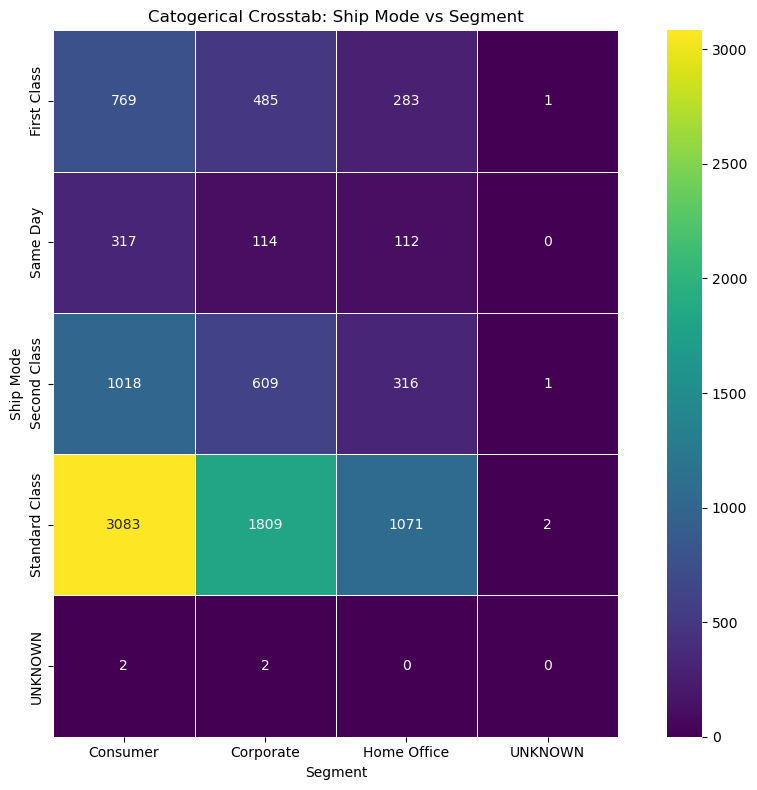

#### Catogerical Crosstab: Ship Mode vs Country

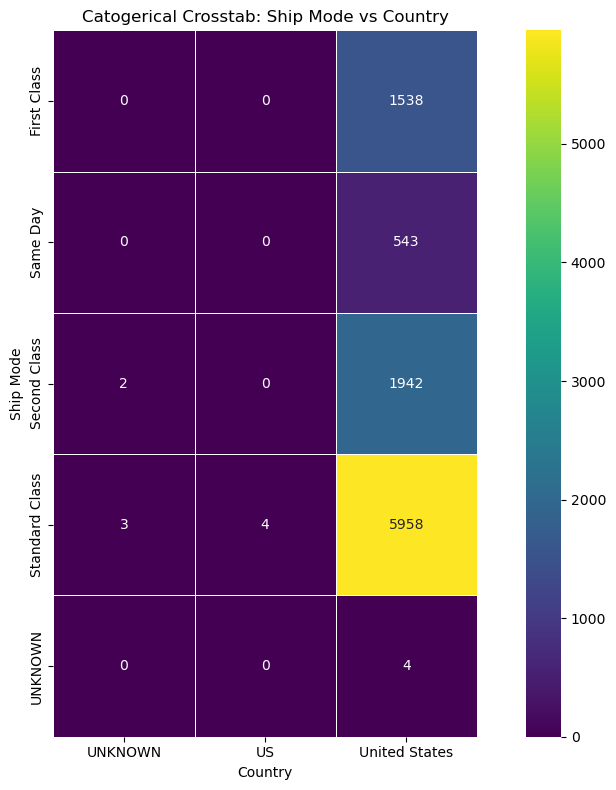

#### Catogerical Crosstab: Ship Mode vs Region

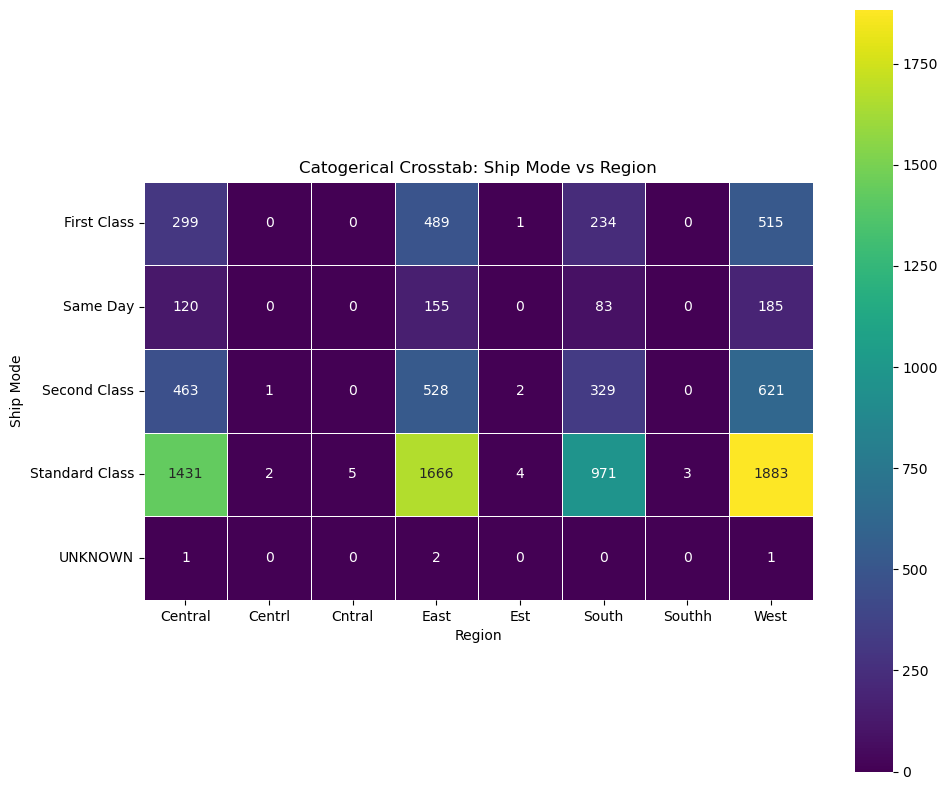

#### Catogerical Crosstab: Ship Mode vs Category

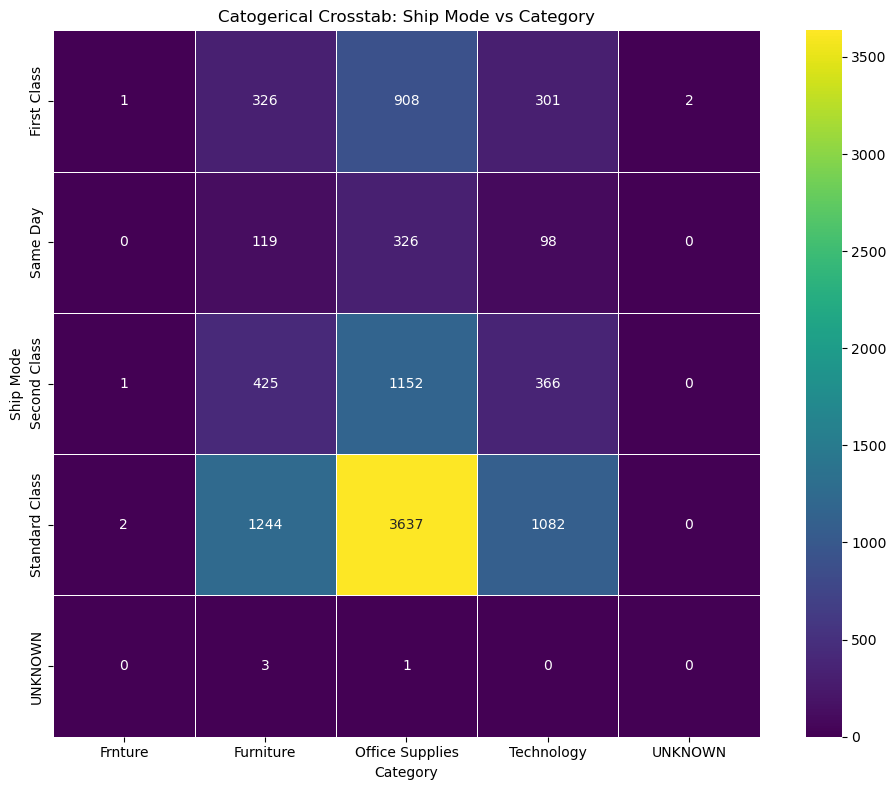

#### Catogerical Crosstab: Ship Mode vs Quantity

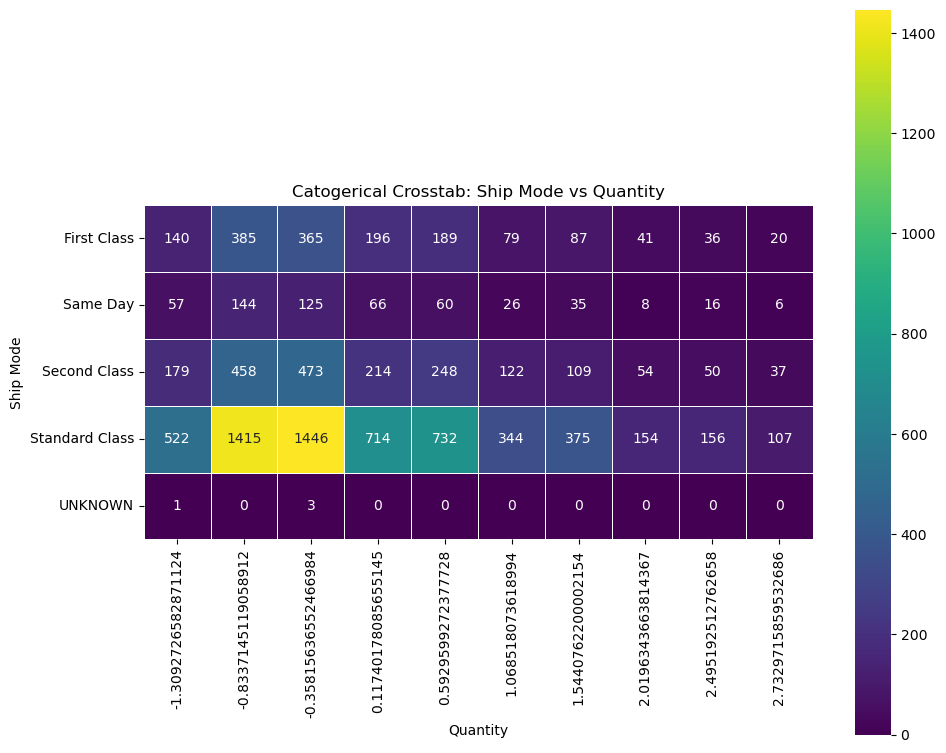

#### Catogerical Crosstab: Ship Mode vs Discount

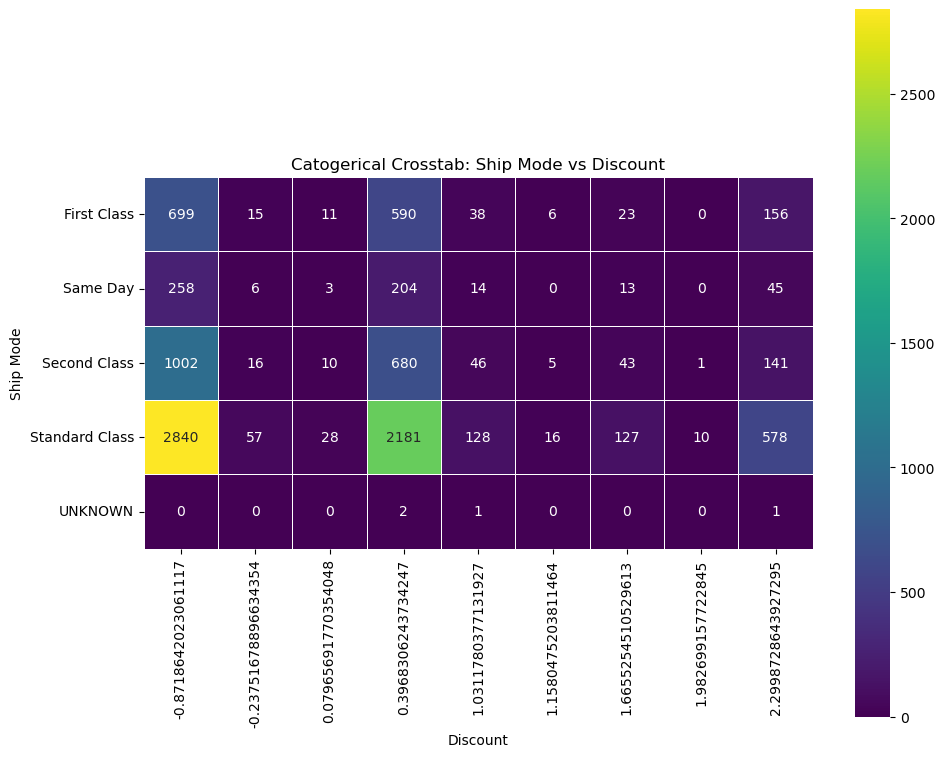

#### Catogerical Crosstab: Segment vs Country

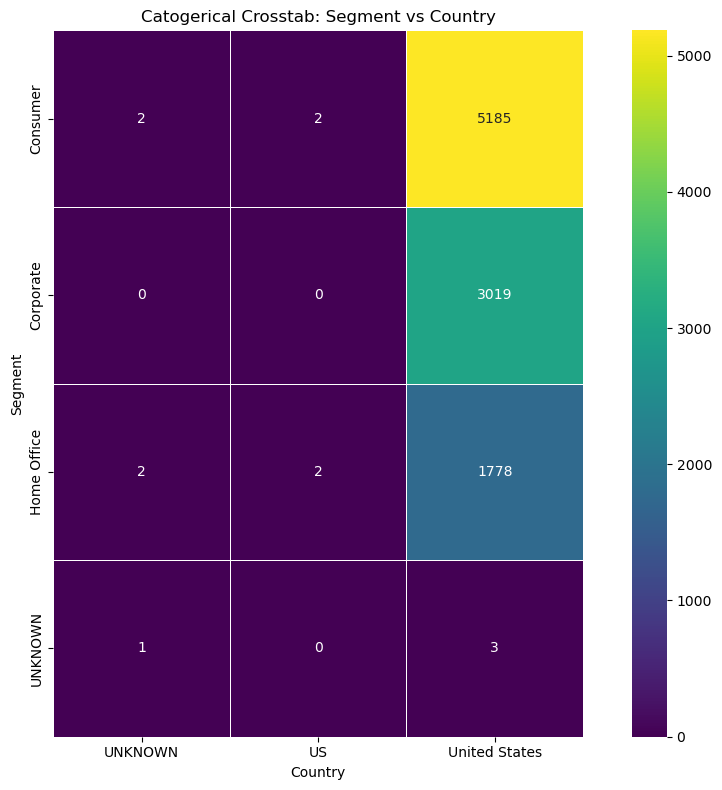

#### Catogerical Crosstab: Segment vs Region

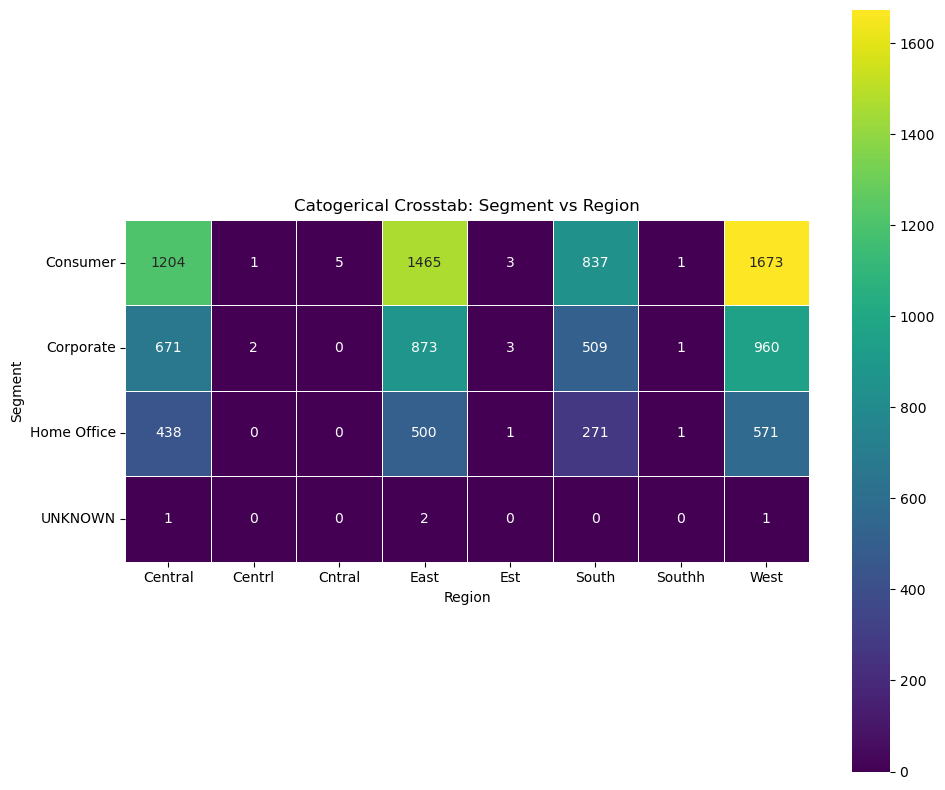

#### Catogerical Crosstab: Segment vs Category

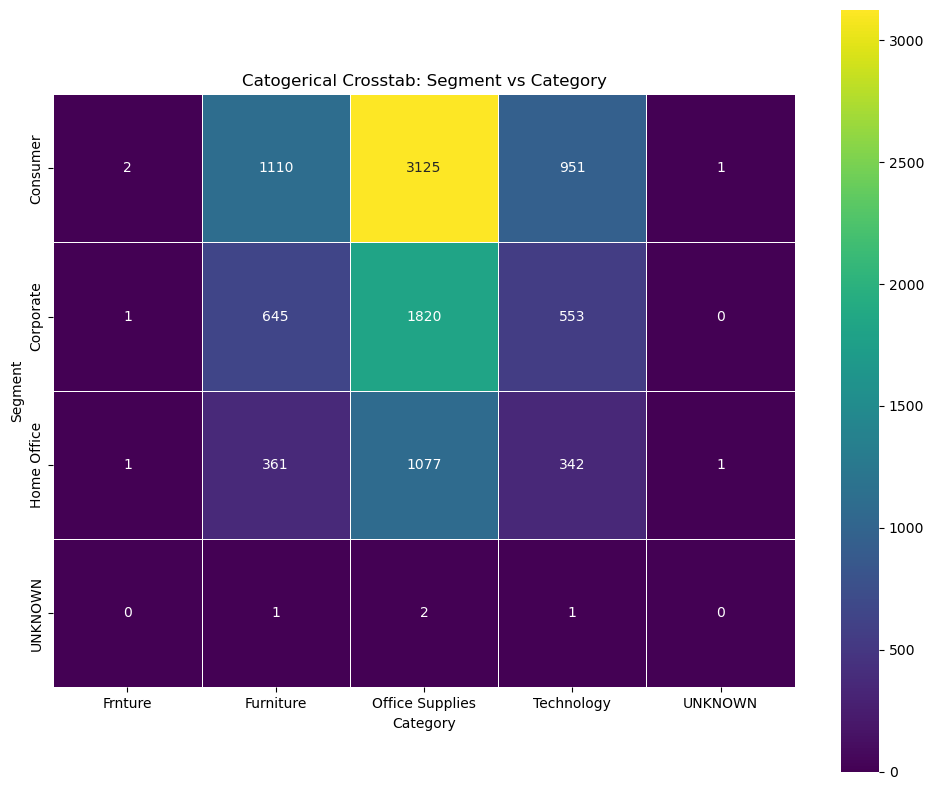

#### Catogerical Crosstab: Segment vs Quantity

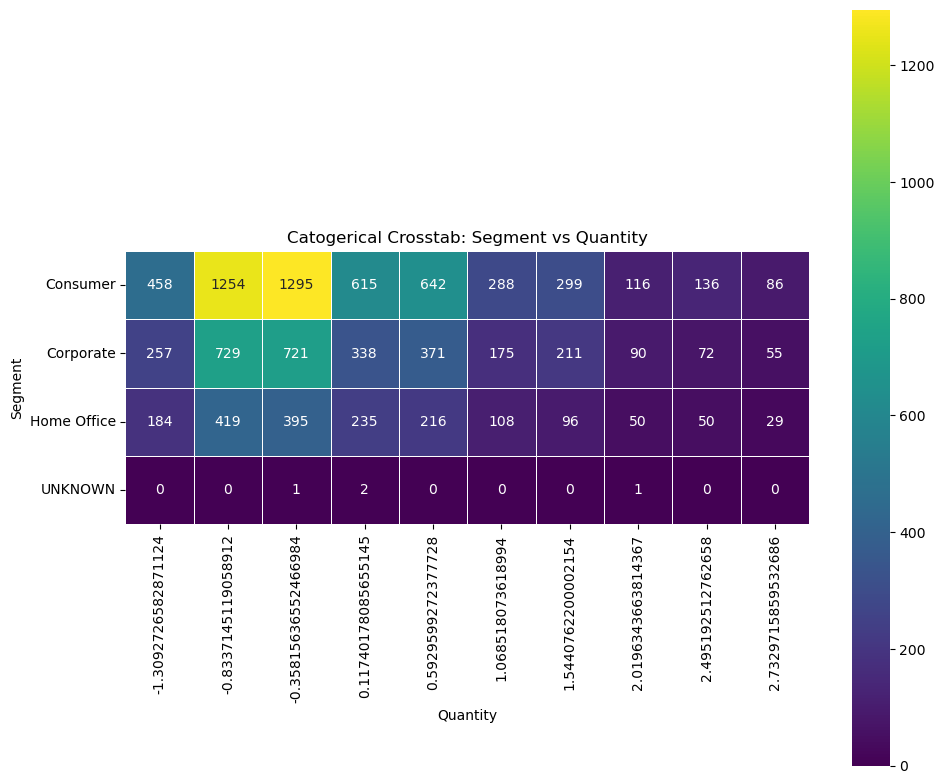

#### Catogerical Crosstab: Segment vs Discount

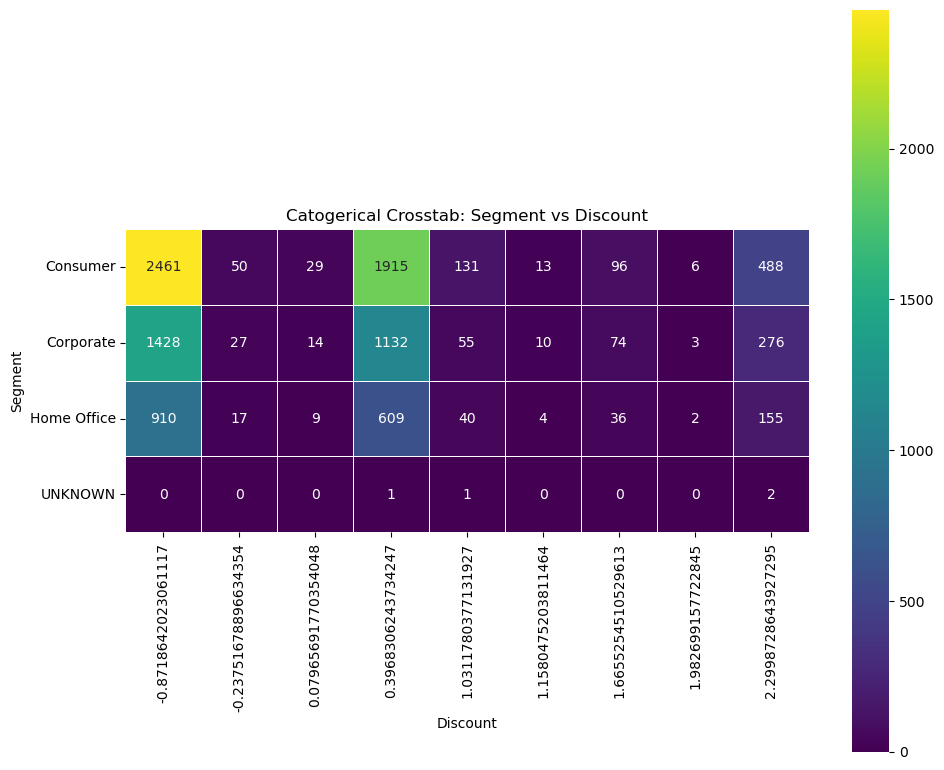

#### Catogerical Crosstab: Country vs Region

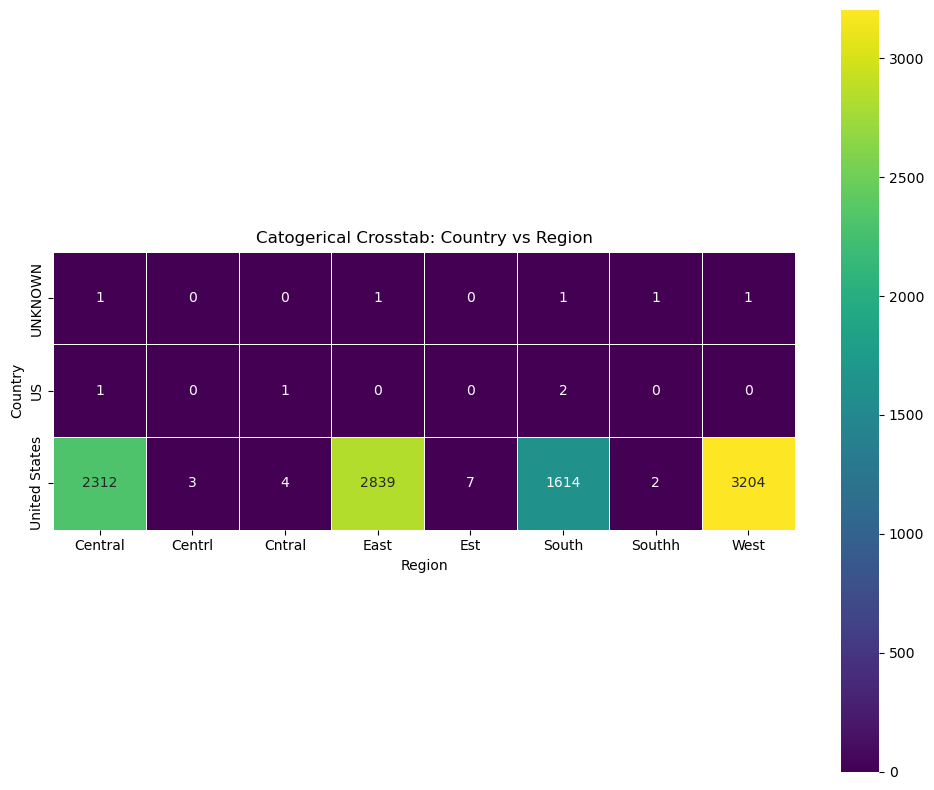

#### Catogerical Crosstab: Country vs Category

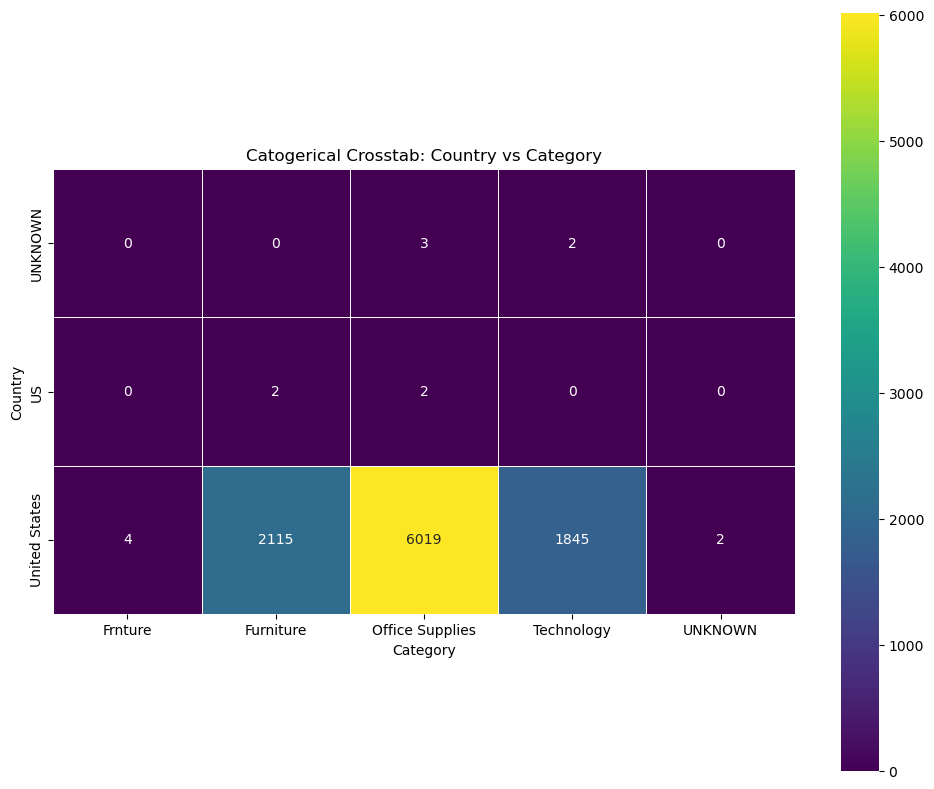

#### Catogerical Crosstab: Country vs Quantity

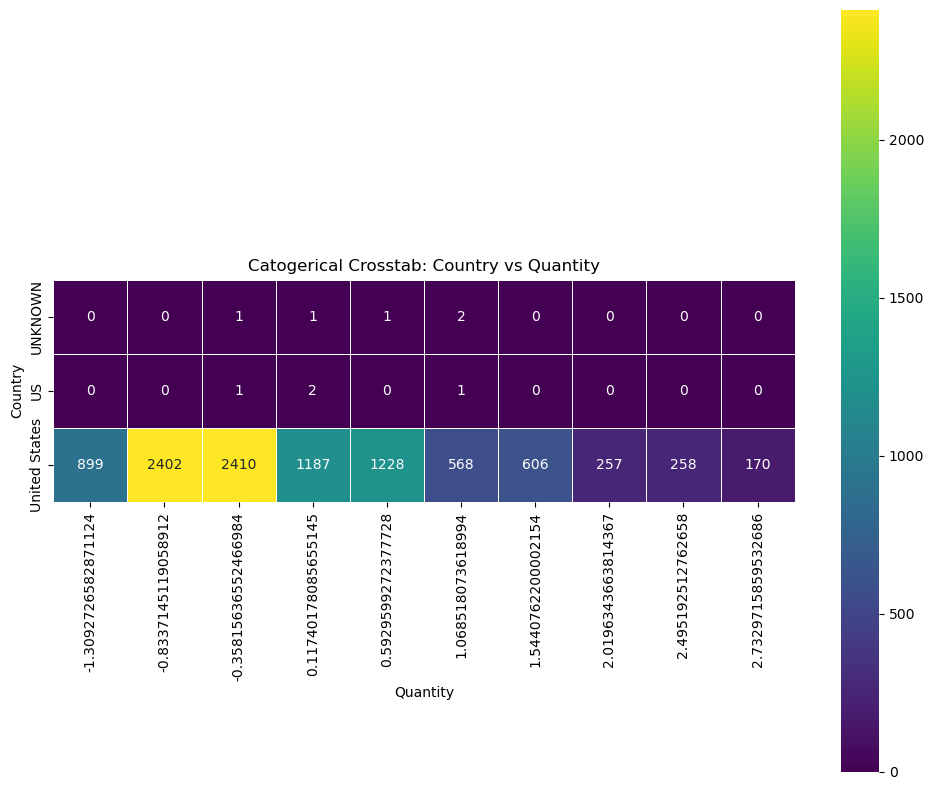

#### Catogerical Crosstab: Country vs Discount

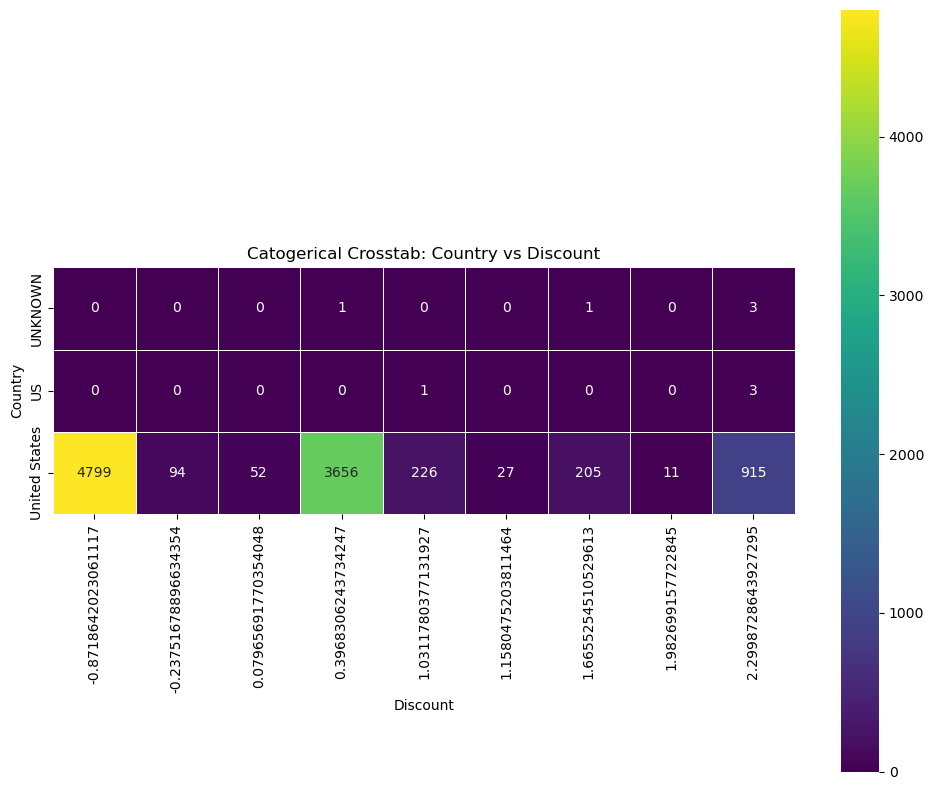

#### Catogerical Crosstab: Region vs Category

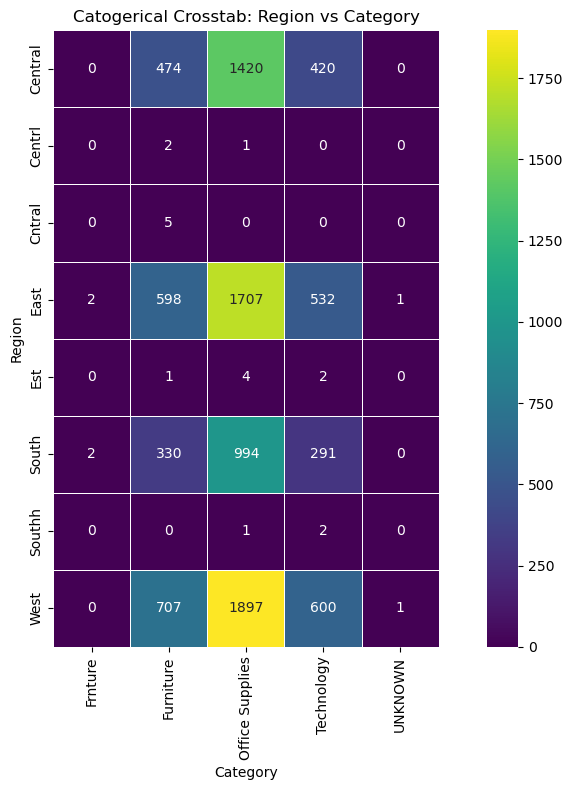

#### Catogerical Crosstab: Region vs Quantity

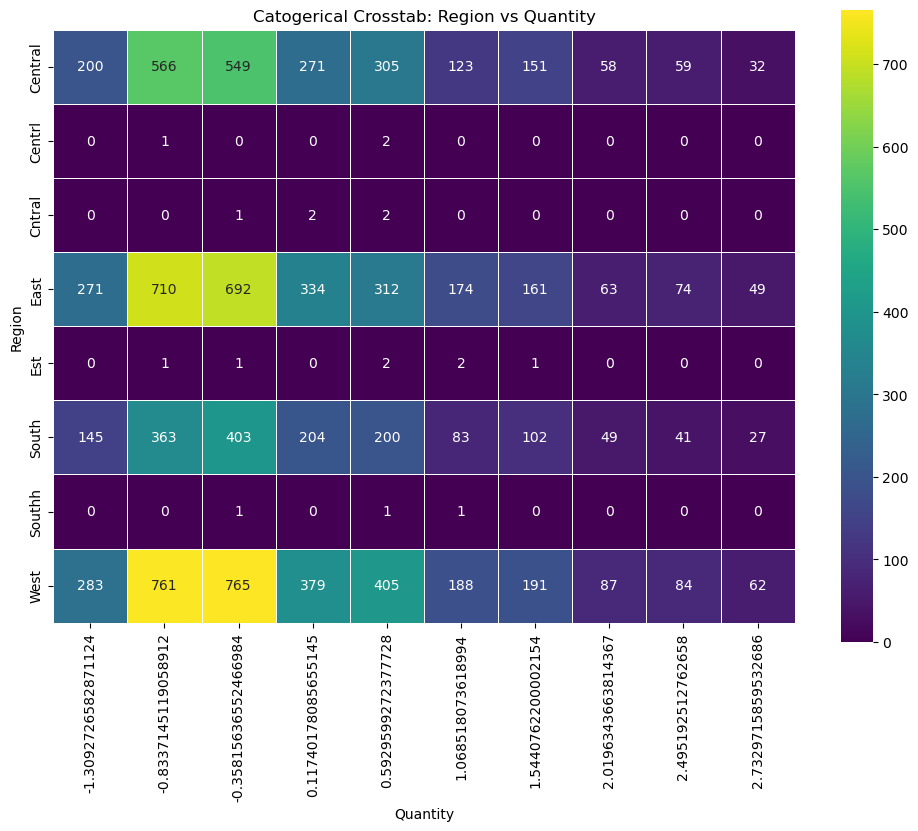

#### Catogerical Crosstab: Region vs Discount

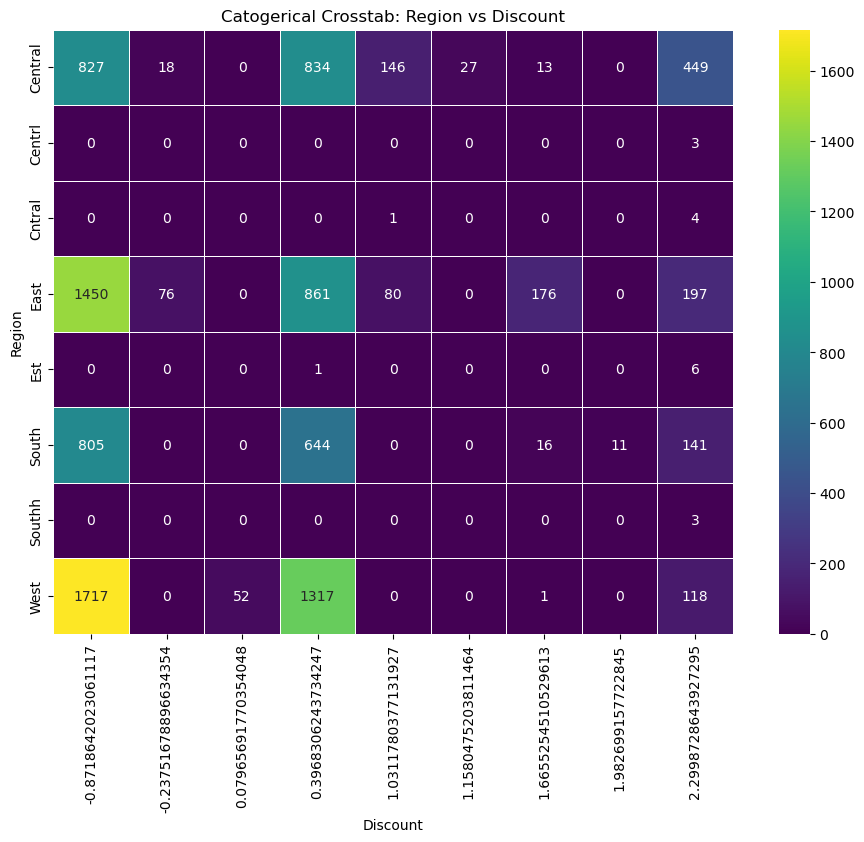

#### Catogerical Crosstab: Category vs Quantity

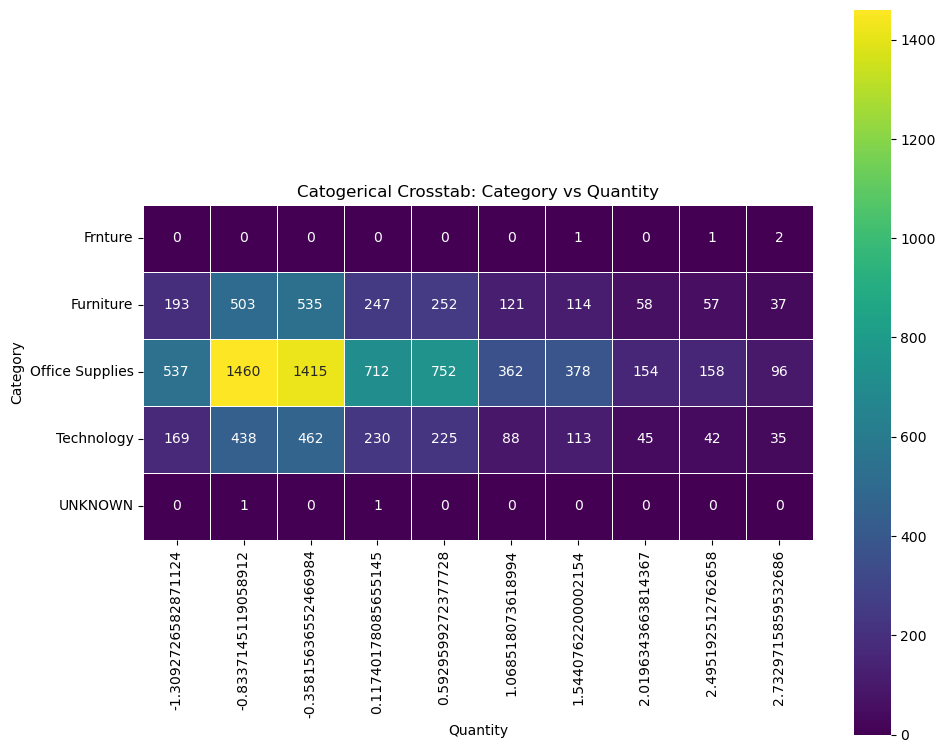

#### Catogerical Crosstab: Category vs Discount

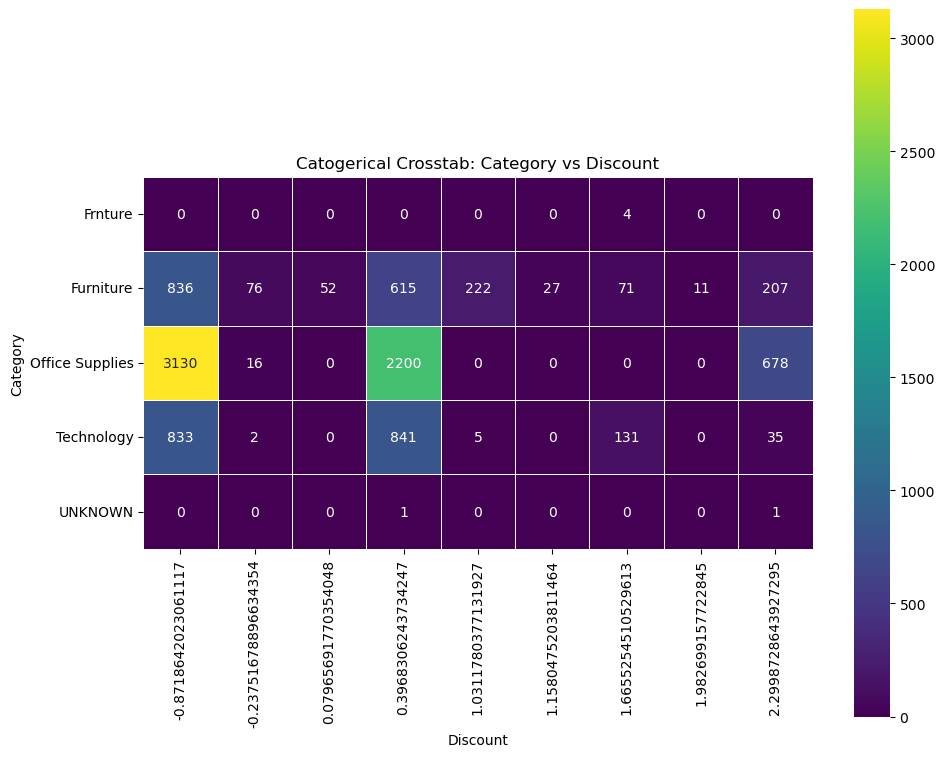

#### Catogerical Crosstab: Quantity vs Discount

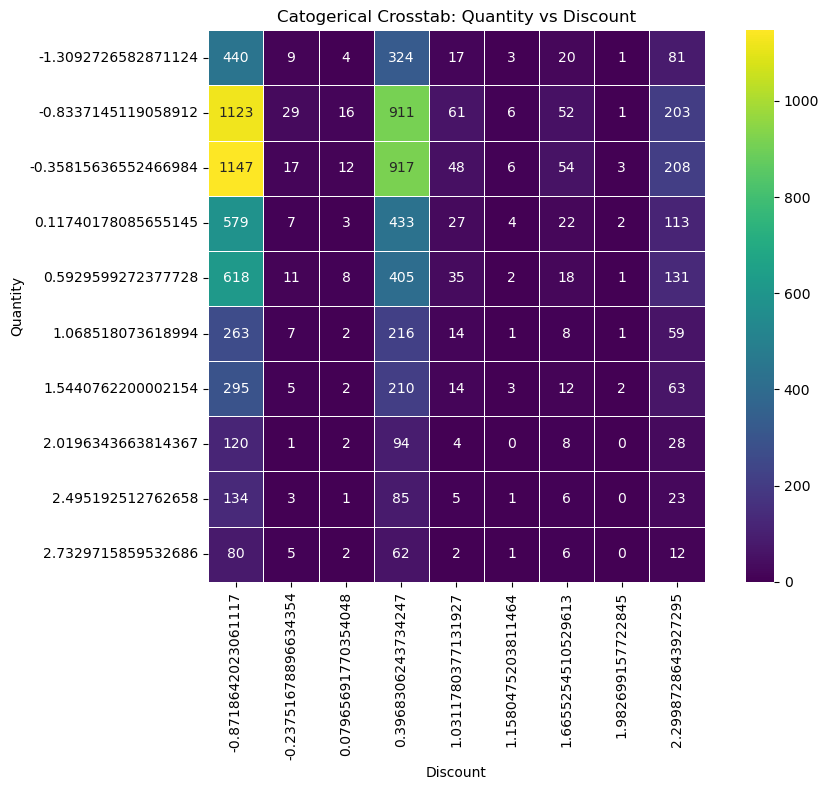

---

## Step 2: Numerical Scatter Plots - Numeric vs Numeric

#### Correlation between Sales and Quantity: 0.267

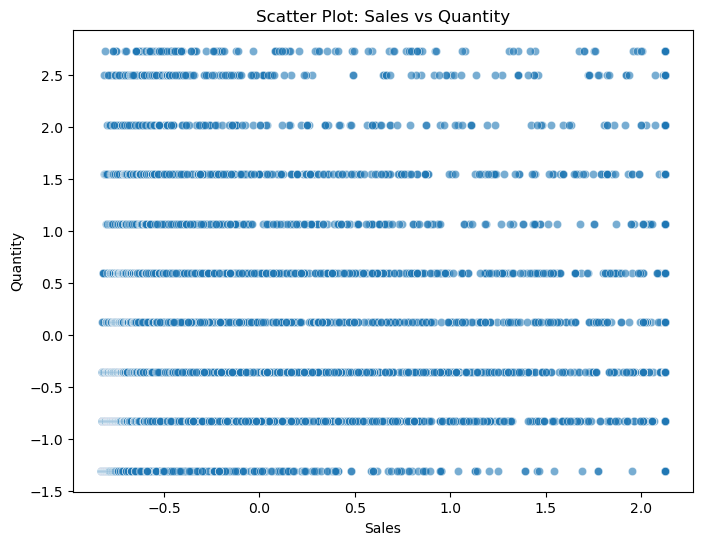

#### Correlation between Sales and Discount: -0.014

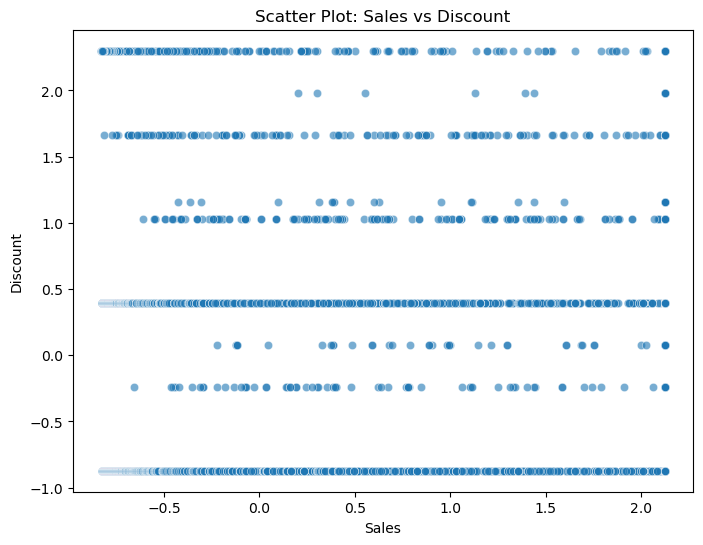

#### Correlation between Sales and Profit: 0.454

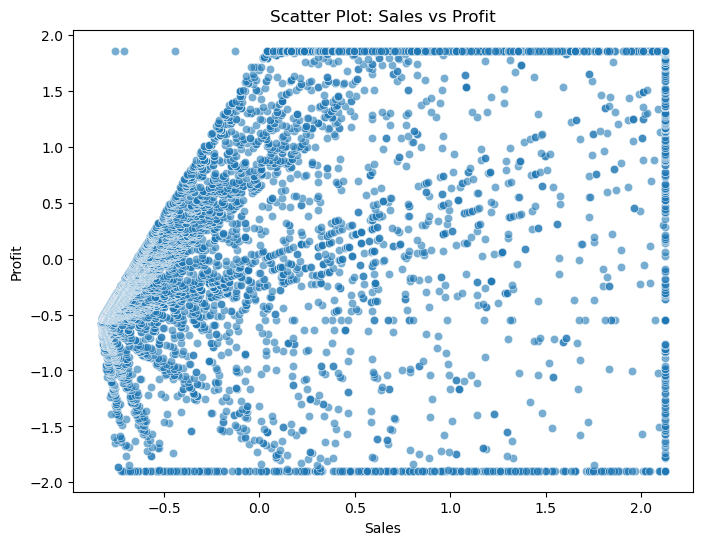

#### Correlation between Quantity and Discount: 0.003

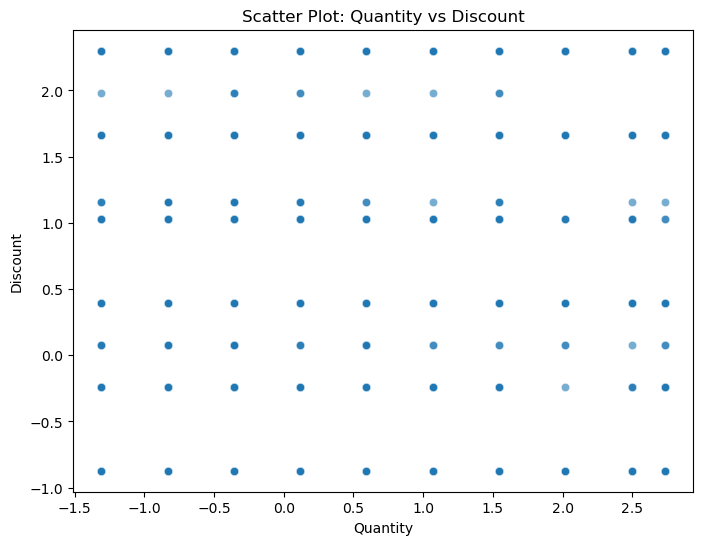

#### Correlation between Quantity and Profit: 0.198

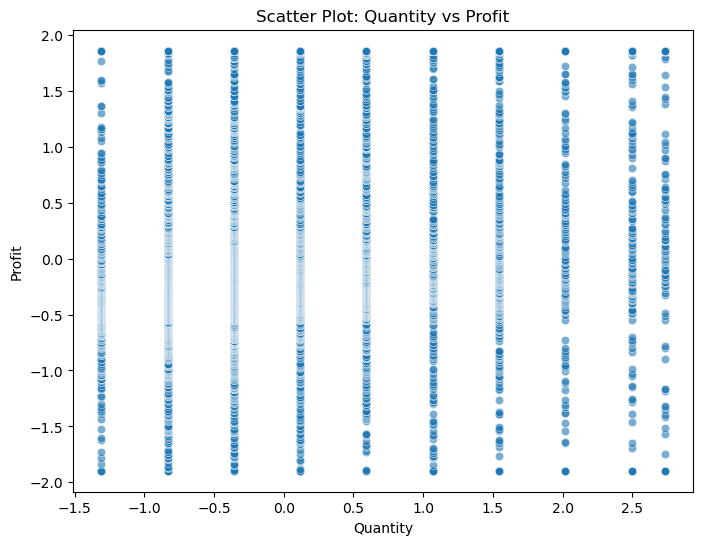

#### Correlation between Discount and Profit: -0.509

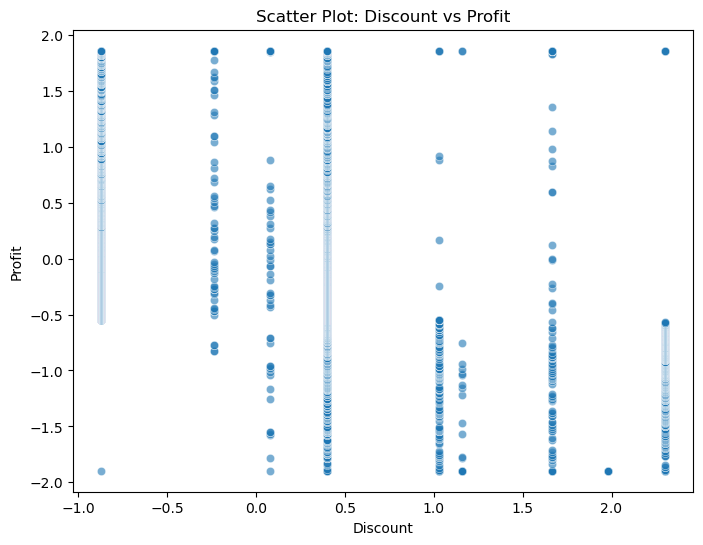

---

## Step 3: Categorical vs Numerical - Boxplots and Grouped Means

### Boxplot and Grouped Mean: Sales by Ship Mode

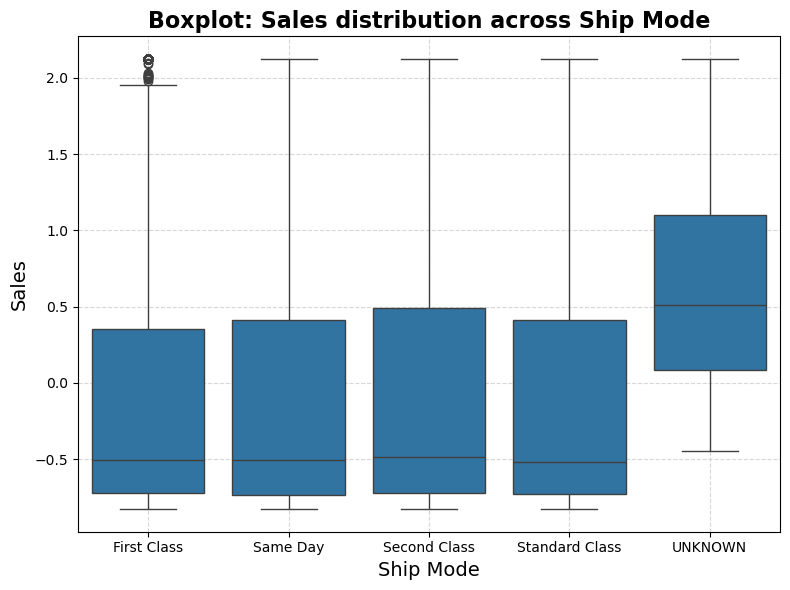

**Mean Sales by Ship Mode:**

Ship Mode
First Class      -0.008538
Standard Class   -0.004932
Same Day          0.008229
Second Class      0.019292
UNKNOWN           0.675768
Name: Sales, dtype: float64


### Boxplot and Grouped Mean: Quantity by Ship Mode

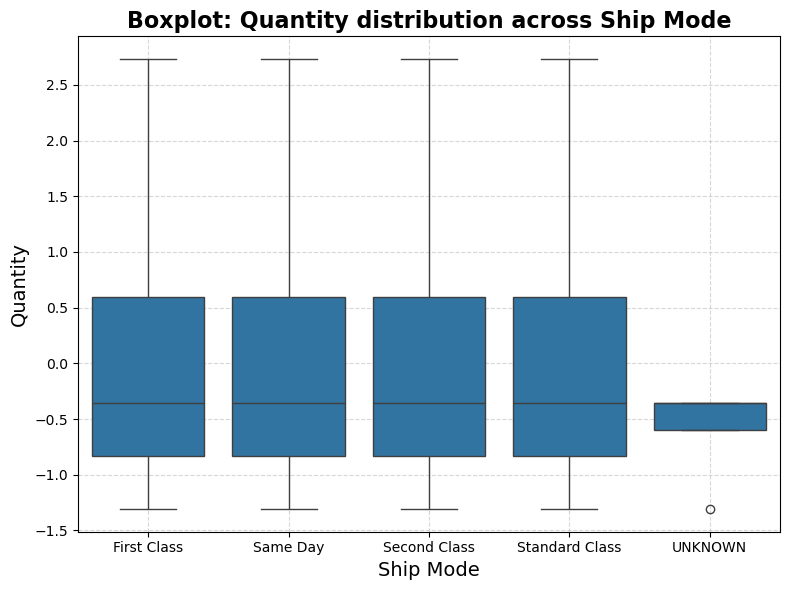

**Mean Quantity by Ship Mode:**

Ship Mode
UNKNOWN          -0.595935
Same Day         -0.077025
First Class      -0.035037
Second Class      0.010377
Standard Class    0.012763
Name: Quantity, dtype: float64


### Boxplot and Grouped Mean: Discount by Ship Mode

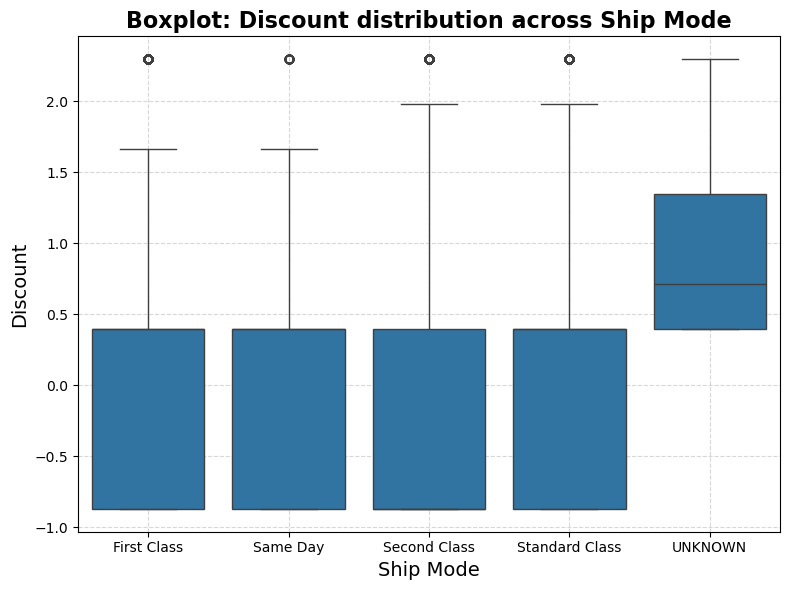

**Mean Discount by Ship Mode:**

Ship Mode
Second Class     -0.080072
Same Day         -0.010297
Standard Class    0.014967
First Class       0.042413
UNKNOWN           1.031178
Name: Discount, dtype: float64


### Boxplot and Grouped Mean: Profit by Ship Mode

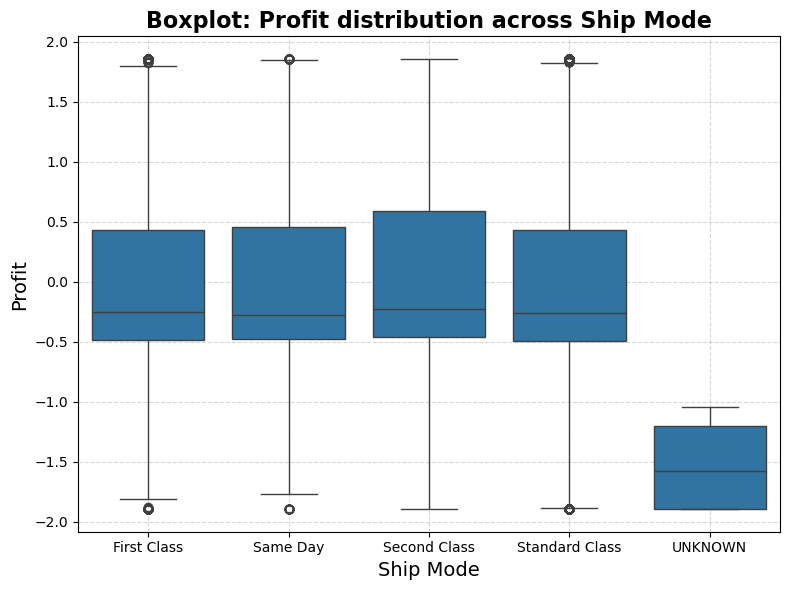

**Mean Profit by Ship Mode:**

Ship Mode
UNKNOWN          -1.522036
Standard Class   -0.014732
First Class      -0.014670
Same Day          0.035504
Second Class      0.060532
Name: Profit, dtype: float64


### Boxplot and Grouped Mean: Sales by Segment

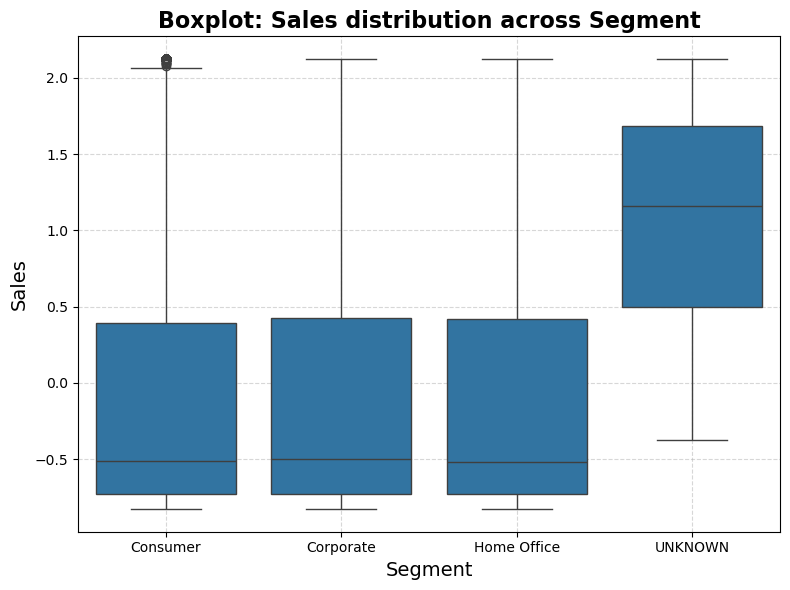

**Mean Sales by Segment:**

Segment
Consumer      -0.009979
Home Office    0.004018
Corporate      0.014135
UNKNOWN        1.017260
Name: Sales, dtype: float64


### Boxplot and Grouped Mean: Quantity by Segment

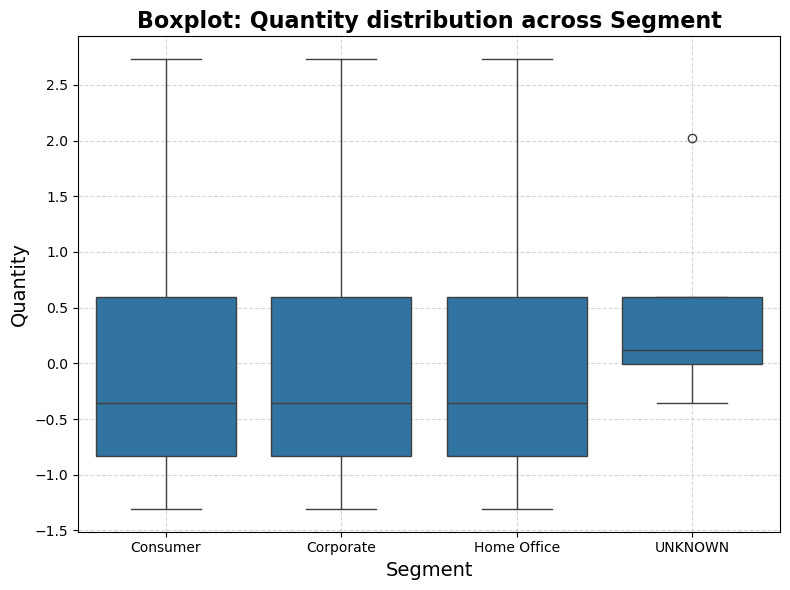

**Mean Quantity by Segment:**

Segment
Consumer      -0.015029
Home Office   -0.004156
Corporate      0.027063
UNKNOWN        0.474070
Name: Quantity, dtype: float64


### Boxplot and Grouped Mean: Discount by Segment

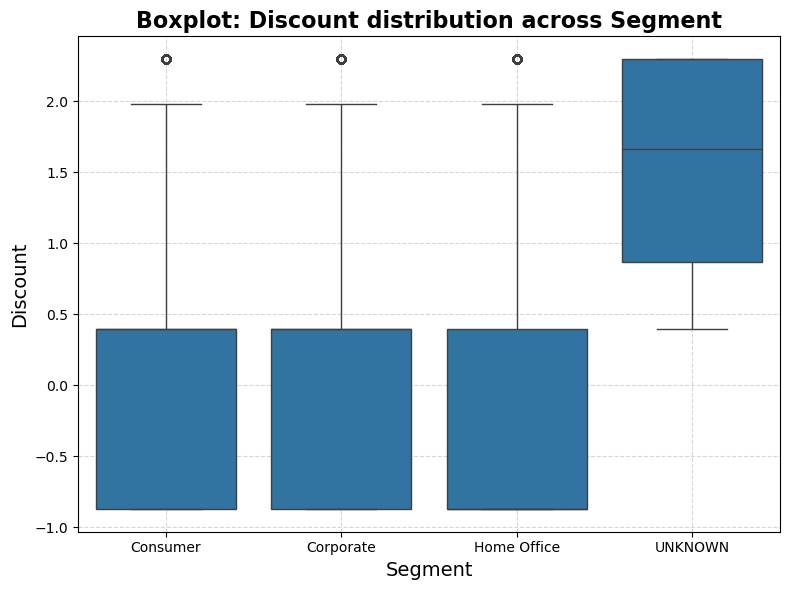

**Mean Discount by Segment:**

Segment
Home Office   -0.049811
Consumer       0.009437
Corporate      0.010318
UNKNOWN        1.506939
Name: Discount, dtype: float64


### Boxplot and Grouped Mean: Profit by Segment

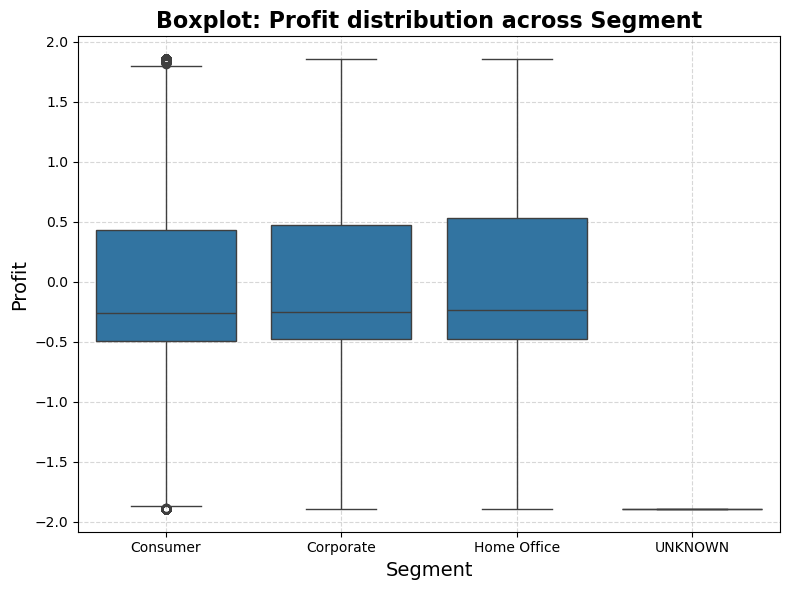

**Mean Profit by Segment:**

Segment
UNKNOWN       -1.895833
Consumer      -0.014354
Corporate      0.008856
Home Office    0.042514
Name: Profit, dtype: float64


### Boxplot and Grouped Mean: Sales by Country

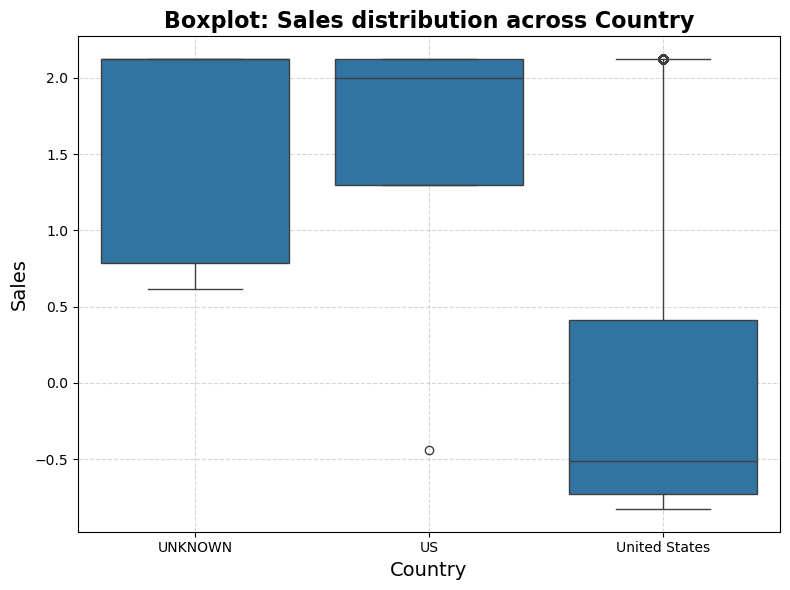

**Mean Sales by Country:**

Country
United States   -0.001135
US               1.422279
UNKNOWN          1.554618
Name: Sales, dtype: float64


### Boxplot and Grouped Mean: Quantity by Country

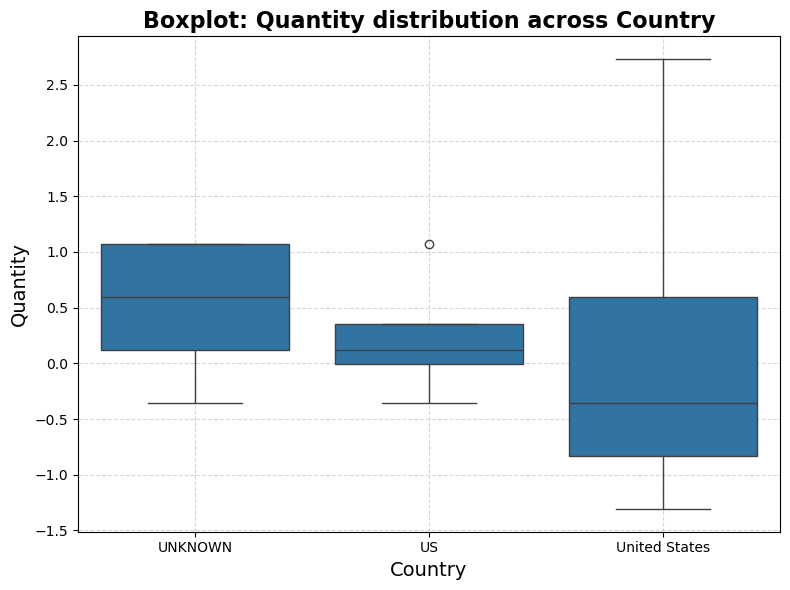

**Mean Quantity by Country:**

Country
United States   -0.000523
US               0.236291
UNKNOWN          0.497848
Name: Quantity, dtype: float64


### Boxplot and Grouped Mean: Discount by Country

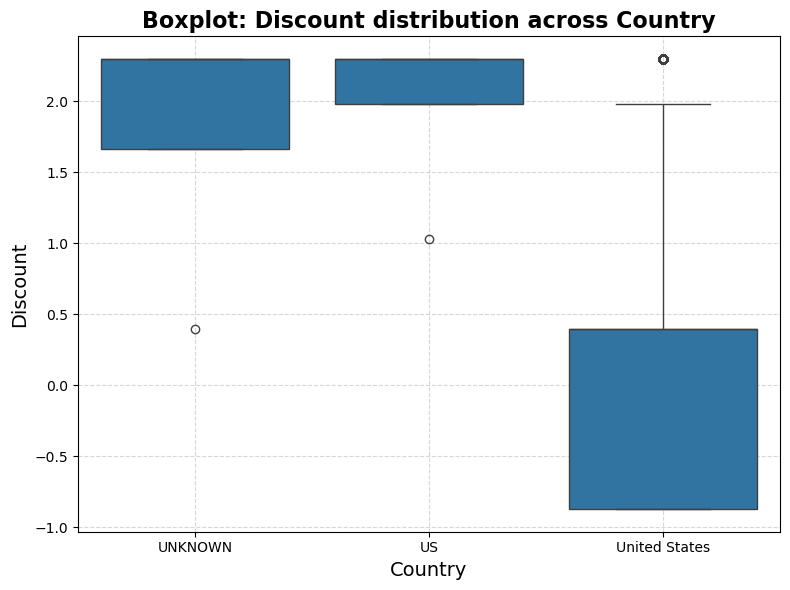

**Mean Discount by Country:**

Country
United States   -0.001954
UNKNOWN          1.792395
US               1.982699
Name: Discount, dtype: float64


### Boxplot and Grouped Mean: Profit by Country

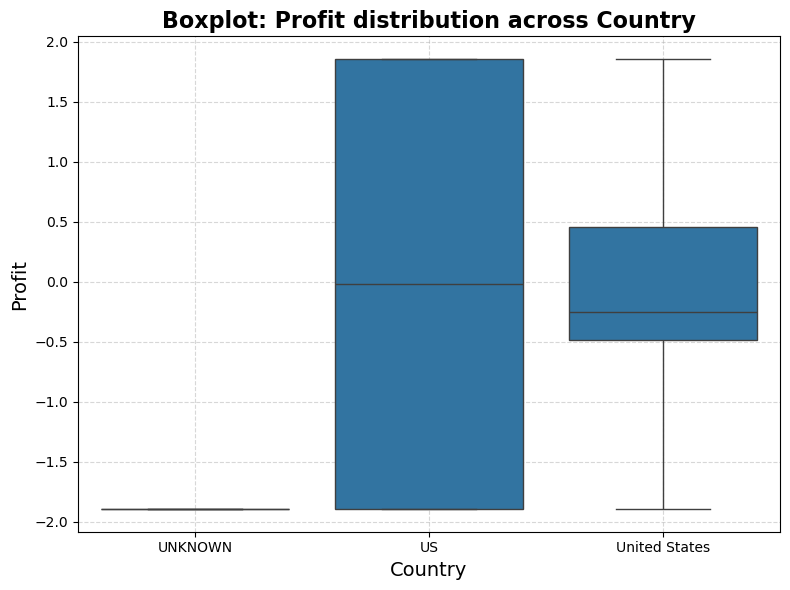

**Mean Profit by Country:**

Country
UNKNOWN         -1.895833
US              -0.019358
United States    0.003003
Name: Profit, dtype: float64


### Boxplot and Grouped Mean: Sales by Region

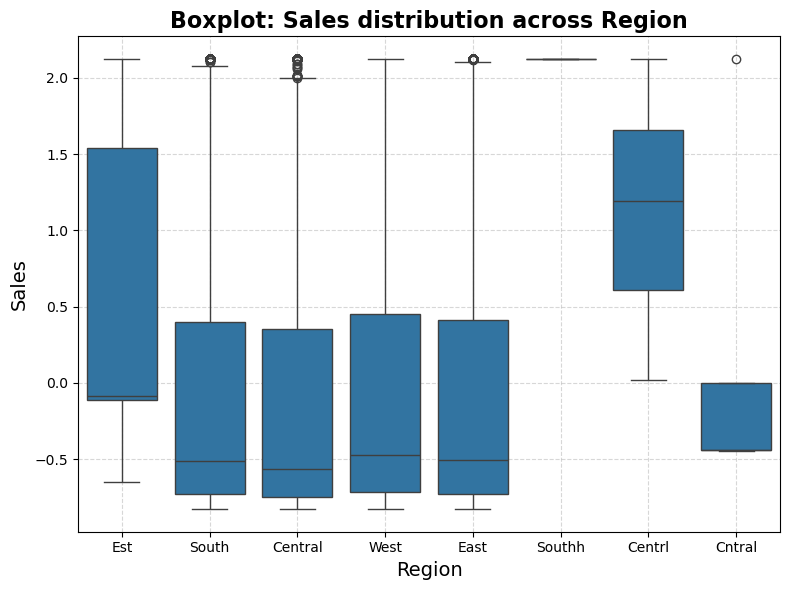

**Mean Sales by Region:**

Region
Central   -0.039057
East      -0.001525
South      0.000136
West       0.025539
Cntral     0.159528
Est        0.607415
Centrl     1.112107
Southh     2.124667
Name: Sales, dtype: float64


### Boxplot and Grouped Mean: Quantity by Region

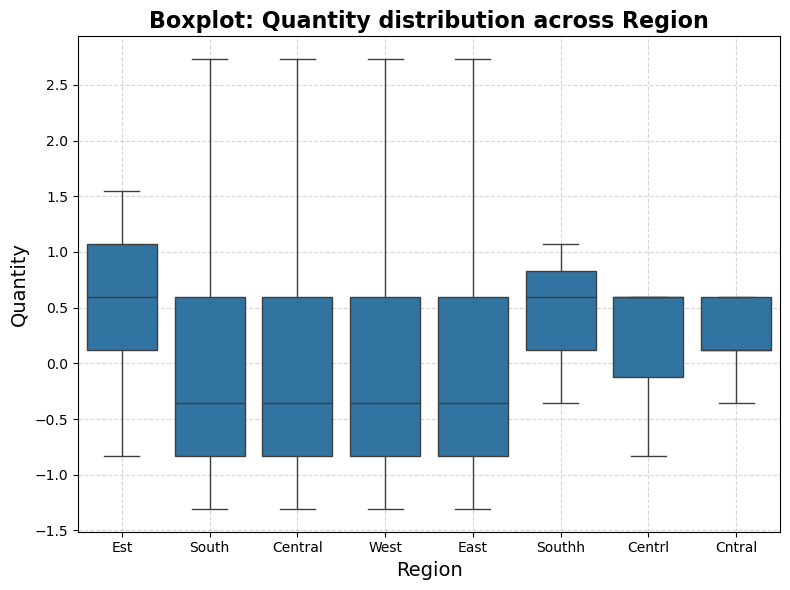

**Mean Quantity by Region:**

Region
East      -0.031712
Central   -0.000563
South      0.016673
West       0.017542
Centrl     0.117402
Cntral     0.212513
Southh     0.434441
Est        0.525023
Name: Quantity, dtype: float64


### Boxplot and Grouped Mean: Discount by Region

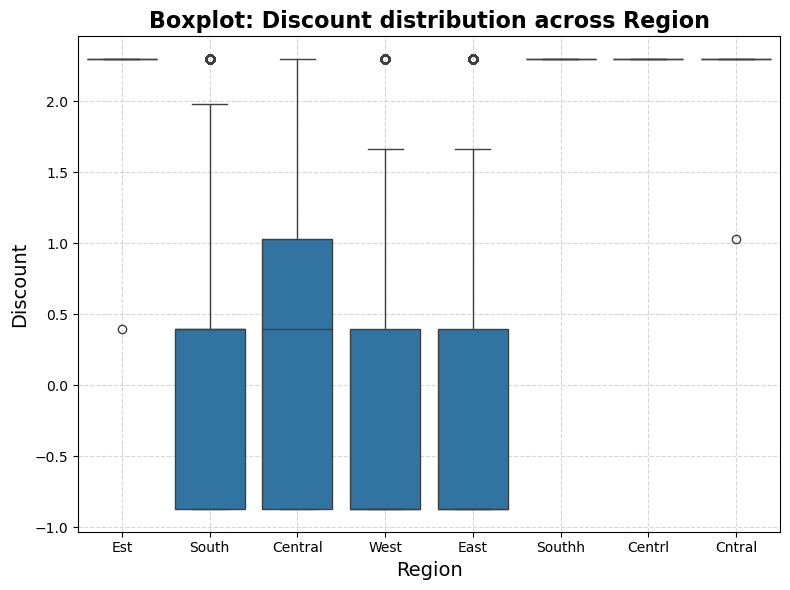

**Mean Discount by Region:**

Region
West      -0.217526
South     -0.045486
East      -0.039395
Central    0.363770
Est        2.028010
Cntral     2.046134
Centrl     2.299873
Southh     2.299873
Name: Discount, dtype: float64


### Boxplot and Grouped Mean: Profit by Region

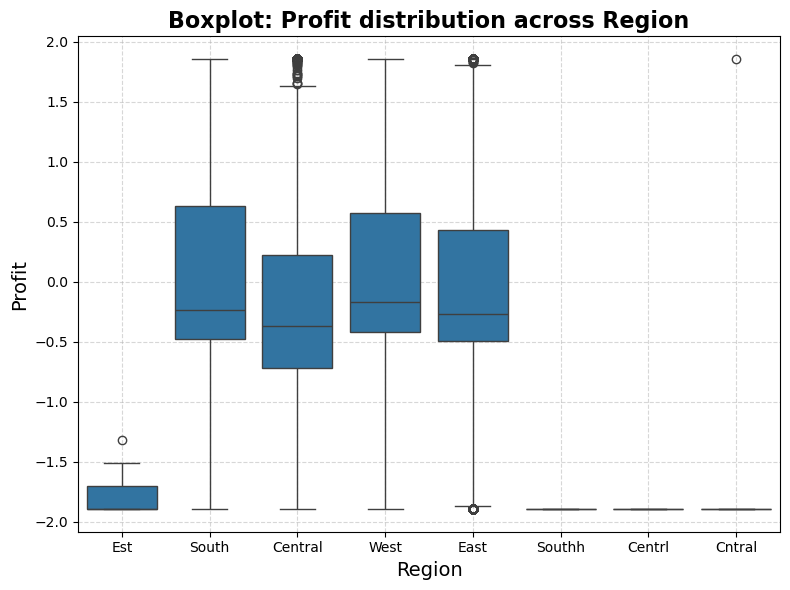

**Mean Profit by Region:**

Region
Centrl    -1.895833
Southh    -1.895833
Est       -1.758915
Cntral    -1.145243
Central   -0.192591
East      -0.016487
South      0.087624
West       0.125003
Name: Profit, dtype: float64


### Boxplot and Grouped Mean: Sales by Category

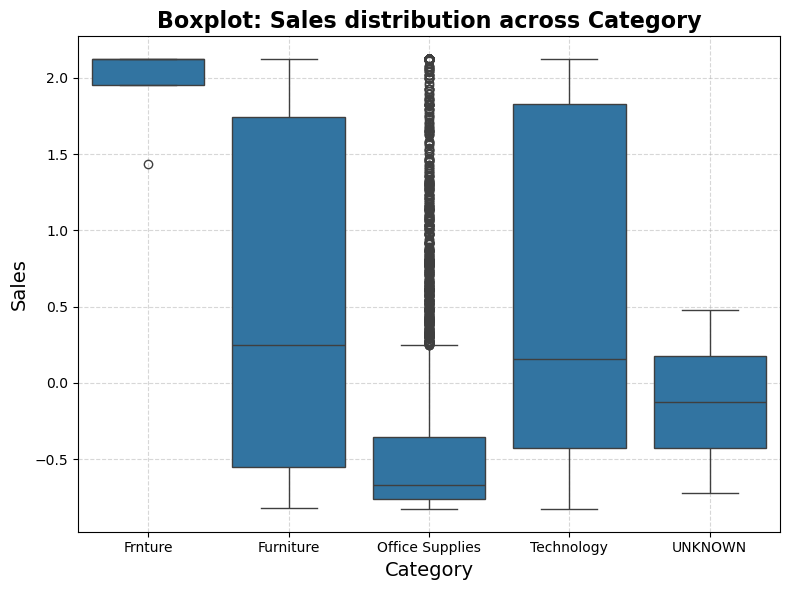

**Mean Sales by Category:**

Category
Office Supplies   -0.346325
UNKNOWN           -0.123302
Furniture          0.510292
Technology         0.541707
Frnture            1.952686
Name: Sales, dtype: float64


### Boxplot and Grouped Mean: Quantity by Category

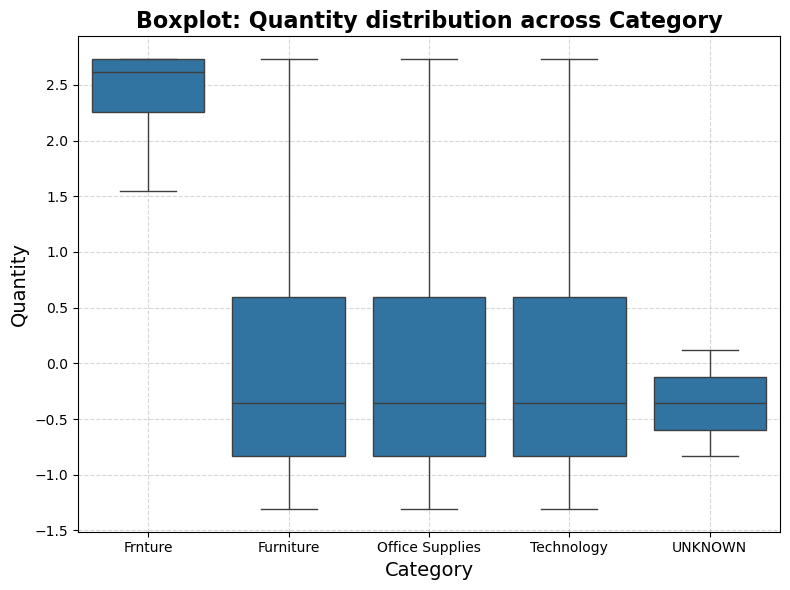

**Mean Quantity by Category:**

Category
UNKNOWN           -0.358156
Technology        -0.017129
Furniture         -0.009182
Office Supplies    0.006722
Frnture            2.376303
Name: Quantity, dtype: float64


### Boxplot and Grouped Mean: Discount by Category

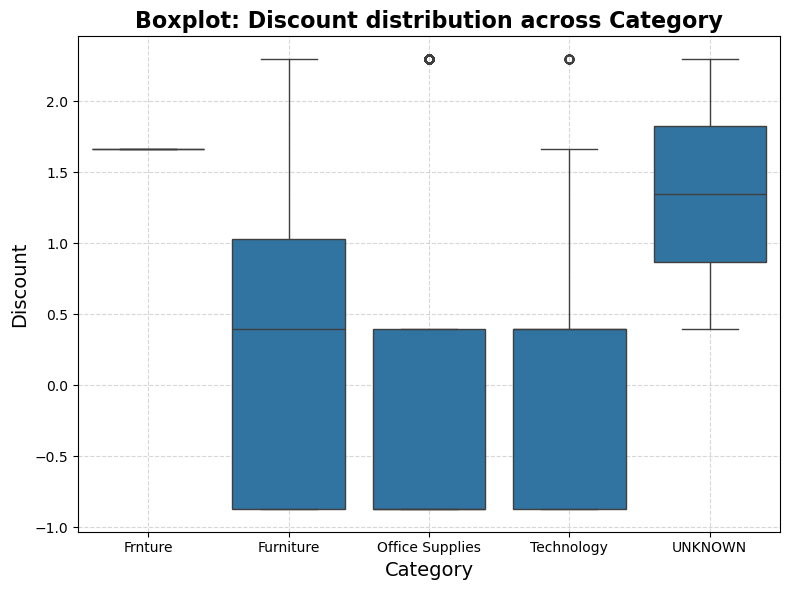

**Mean Discount by Category:**

Category
Office Supplies   -0.049866
Technology        -0.048277
Furniture          0.178360
UNKNOWN            1.348352
Frnture            1.665525
Name: Discount, dtype: float64


### Boxplot and Grouped Mean: Profit by Category

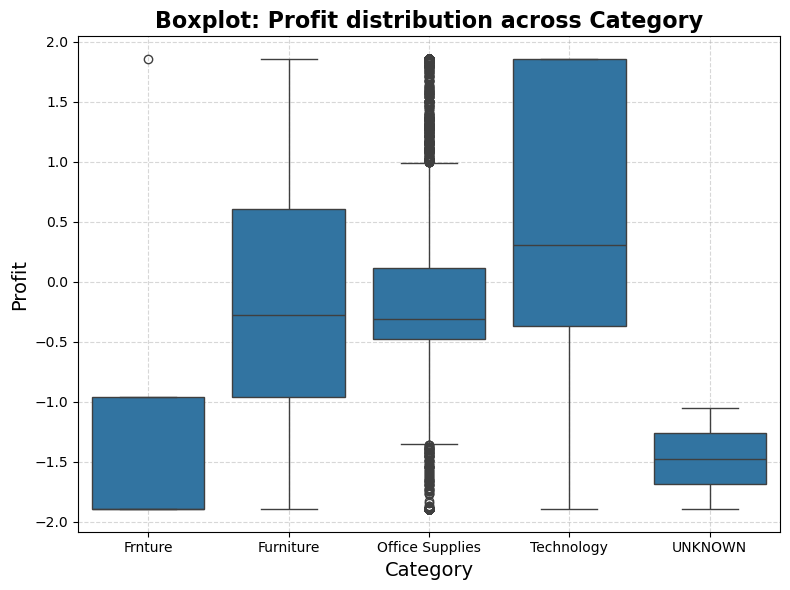

**Mean Profit by Category:**

Category
UNKNOWN           -1.475156
Frnture           -0.957595
Furniture         -0.147773
Office Supplies   -0.084567
Technology         0.459922
Name: Profit, dtype: float64


### Boxplot and Grouped Mean: Sales by Quantity

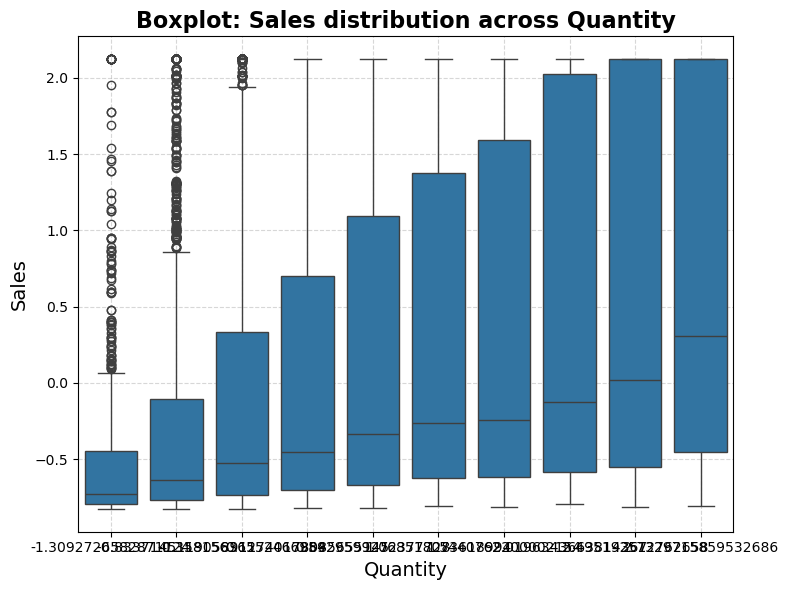

**Mean Sales by Quantity:**

Quantity
-1.309273   -0.496794
-0.833715   -0.243137
-0.358156   -0.044059
 0.117402    0.099188
 0.592960    0.235182
 1.068518    0.287575
 1.544076    0.325582
 2.019634    0.455077
 2.495193    0.561787
 2.732972    0.638544
Name: Sales, dtype: float64


### Boxplot and Grouped Mean: Quantity by Quantity

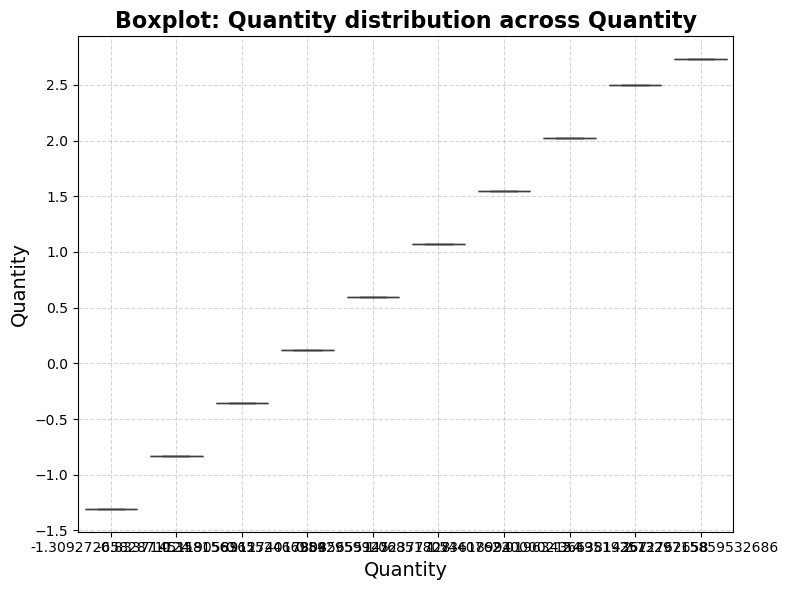

**Mean Quantity by Quantity:**

Quantity
-1.309273   -1.309273
-0.833715   -0.833715
-0.358156   -0.358156
 0.117402    0.117402
 0.592960    0.592960
 1.068518    1.068518
 1.544076    1.544076
 2.019634    2.019634
 2.495193    2.495193
 2.732972    2.732972
Name: Quantity, dtype: float64


### Boxplot and Grouped Mean: Discount by Quantity

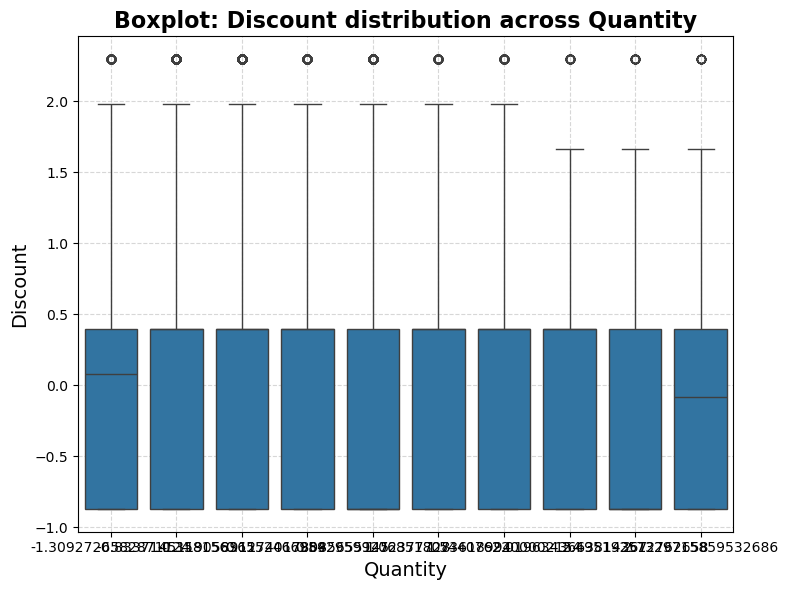

**Mean Discount by Quantity:**

Quantity
 2.495193   -0.056310
 2.732972   -0.031540
-1.309273   -0.015883
 0.592960   -0.006850
-0.358156   -0.003529
 0.117402   -0.001209
-0.833715    0.000878
 1.544076    0.019572
 1.068518    0.037663
 2.019634    0.056208
Name: Discount, dtype: float64


### Boxplot and Grouped Mean: Profit by Quantity

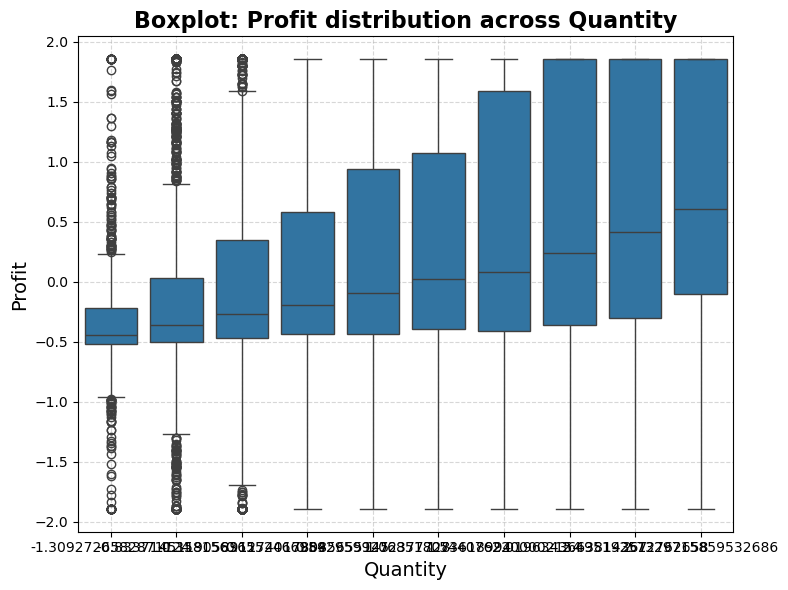

**Mean Profit by Quantity:**

Quantity
-1.309273   -0.328527
-0.833715   -0.163247
-0.358156   -0.033365
 0.117402    0.044286
 0.592960    0.135918
 1.068518    0.138058
 1.544076    0.278175
 2.019634    0.332385
 2.495193    0.493121
 2.732972    0.638660
Name: Profit, dtype: float64


### Boxplot and Grouped Mean: Sales by Discount

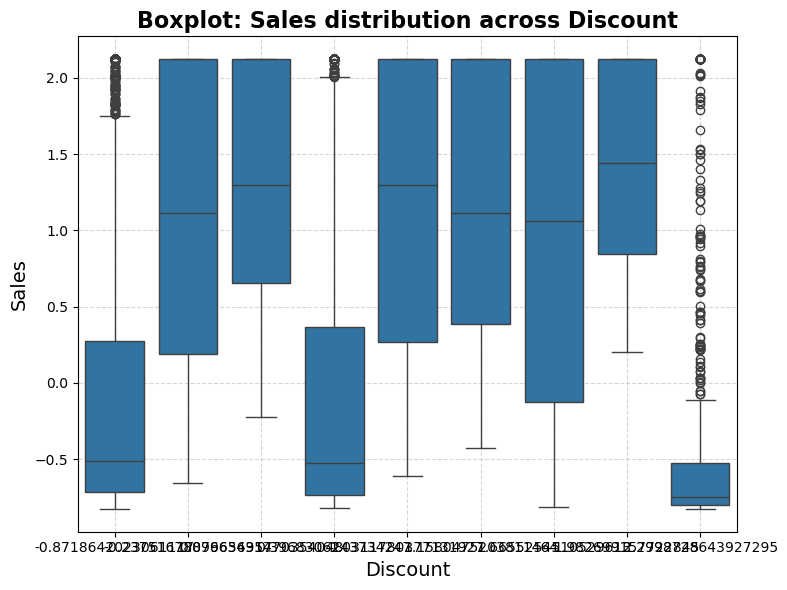

**Mean Sales by Discount:**

Discount
 2.299873   -0.425187
-0.871864   -0.038365
 0.396831   -0.023100
 1.665525    0.941341
-0.237517    1.074241
 1.031178    1.120191
 1.158048    1.147552
 0.079657    1.278960
 1.982699    1.422277
Name: Sales, dtype: float64


### Boxplot and Grouped Mean: Quantity by Discount

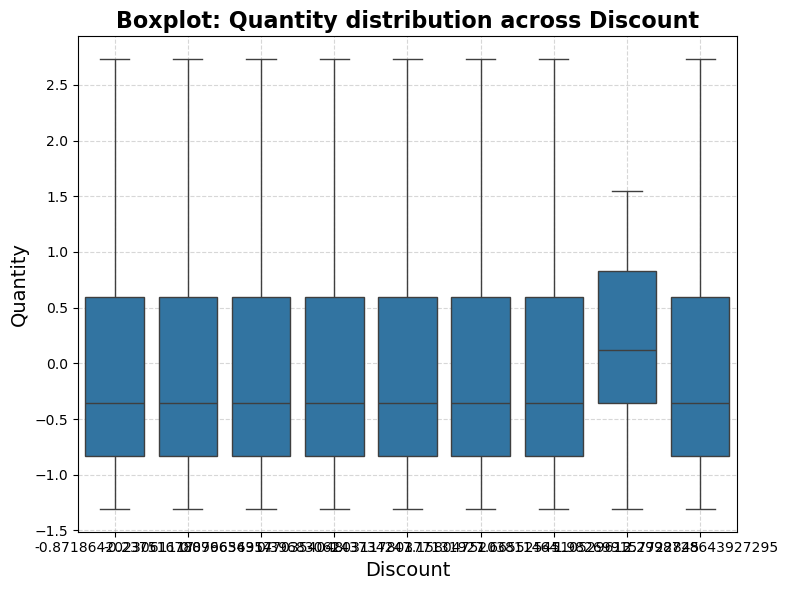

**Mean Quantity by Discount:**

Discount
 0.396831   -0.025903
 1.031178   -0.016676
 0.079657   -0.010633
 1.665525   -0.004951
-0.871864    0.008992
-0.237517    0.038985
 2.299873    0.052342
 1.158048    0.055755
 1.982699    0.160634
Name: Quantity, dtype: float64


### Boxplot and Grouped Mean: Discount by Discount

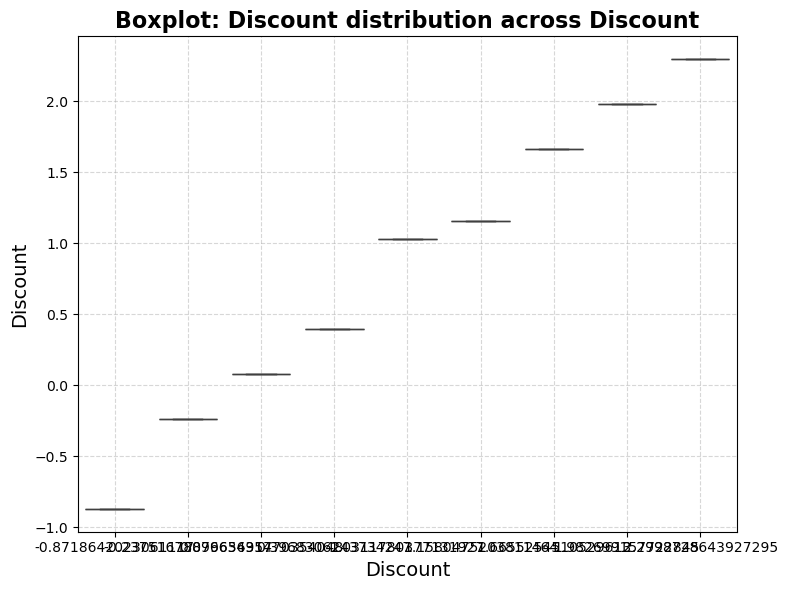

**Mean Discount by Discount:**

Discount
-0.871864   -0.871864
-0.237517   -0.237517
 0.079657    0.079657
 0.396831    0.396831
 1.031178    1.031178
 1.158048    1.158048
 1.665525    1.665525
 1.982699    1.982699
 2.299873    2.299873
Name: Discount, dtype: float64


### Boxplot and Grouped Mean: Profit by Discount

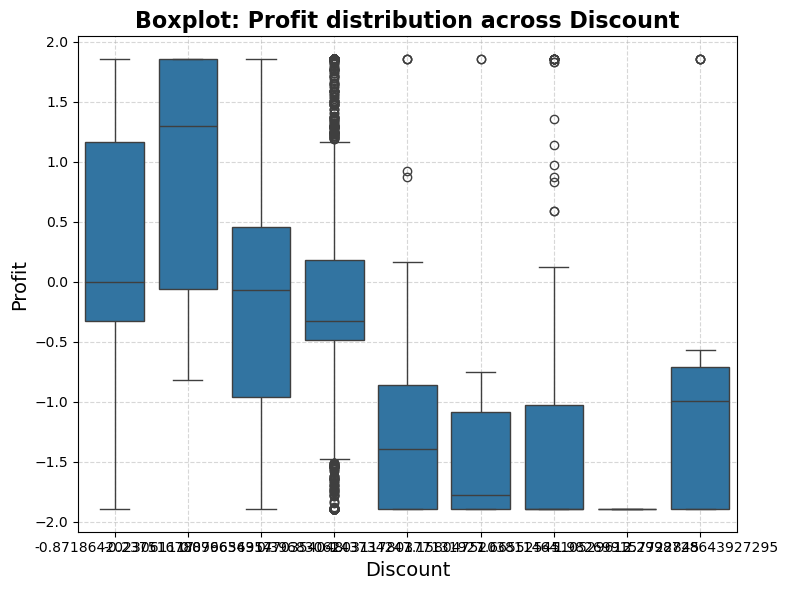

**Mean Profit by Discount:**

Discount
 1.982699   -1.895833
 1.158048   -1.325550
 1.031178   -1.307109
 1.665525   -1.291905
 2.299873   -1.171356
 0.396831   -0.071711
 0.079657   -0.023769
-0.871864    0.394854
-0.237517    0.928863
Name: Profit, dtype: float64


---

In [103]:
# Step 1: Categorical vs Categorical - Heatmaps of all pairs
display(Markdown("## Step 1: Categorical Heatmaps - Category vs Category"))
# Retrieve all categorical columns from the dataset
cat_columns = exp_data_analysis.get_categorical_candidates()
# Generate all unique pairs of categorical columns for bivariate analysis
cat_cat_pairs = list(combinations(cat_columns, 2))
# Plot heatmaps for each categorical pair to visualize relationships
edaPlotter.plot_categorical_vs_catogerical_heatmaps(
    exp_data_analysis.get_exploratory_data_frame(),
    cat_cat_pairs
)
display(Markdown("---"))

# Step 2: Numerical vs Numerical - Scatter plots and correlations
display(Markdown("## Step 2: Numerical Scatter Plots - Numeric vs Numeric"))
# Retrieve all numeric columns (float and integer types) from the dataset
numeric_columns = exp_data_analysis.get_columns_by_types(['float', 'float64', 'int64'])
# Generate all unique pairs of numeric columns for bivariate analysis
num_num_pairs = list(combinations(numeric_columns, 2))
# Plot scatter plots and display correlation coefficients for each numeric pair
edaPlotter.plot_numerical_vs_numerical_scatter(
    exp_data_analysis.get_exploratory_data_frame(),
    num_num_pairs
)
display(Markdown("---"))

# Step 3: Categorical vs Numerical - Boxplots and grouped means
display(Markdown("## Step 3: Categorical vs Numerical - Boxplots and Grouped Means"))
# Generate all possible pairs between categorical and numeric columns
cat_num_pairs = list(product(cat_columns, numeric_columns))
# Plot boxplots and grouped mean statistics for each categorical-numeric pair
edaPlotter.plot_categorical_vs_numerical_boxplots(
    exp_data_analysis.get_exploratory_data_frame(),
    cat_num_pairs
)
display(Markdown("---"))

### Task 3 - Part B

## Summary of Bivariate Analysis Methods

This analysis investigates relationships between variables through **three types of bivariate comparisons**: categorical vs categorical, numerical vs numerical, and categorical vs numerical.

For **categorical vs categorical variables**, I used **crosstabulation** to create contingency tables and visualized them with **heatmaps** to observe distribution patterns between pairs of categorical features **(Wickham, 2016)**. This helps identify associations and potential dependencies.

For **numerical vs numerical variables**, scatter plots were employed alongside the calculation of **Pearson correlation coefficients** to assess linear relationships **(James et al., 2013)**. Scatter plots visualize data distribution and highlight trends or clusters.

For **categorical vs numerical variables**, **boxplots** were used to show the distribution of numerical data across categories, accompanied by **grouped mean calculations** to quantify differences between groups **(Tukey, 1977)**. This method effectively highlights variation and central tendency differences between categories.

All visualisations were generated using **Seaborn and Matplotlib** libraries for clarity and customisation **(Waskom, 2021)**. The methods collectively provide a comprehensive understanding of variable relationships, guiding further analysis.

---

### References

James, G., Witten, D., Hastie, T. and Tibshirani, R. (2013). *An Introduction to Statistical Learning*. New York: Springer.  
[https://www.statlearning.com/](https://www.statlearning.com/)

Tukey, J.W. (1977). *Exploratory Data Analysis*. Reading, MA: Addison-Wesley.  
[https://books.google.com/books?id=Gz4nAQAAMAAJ](https://books.google.com/books?id=Gz4nAQAAMAAJ)

Wickham, H. (2016). *ggplot2: Elegant Graphics for Data Analysis*. Springer-Verlag New York.  
[https://ggplot2.tidyverse.org/](https://ggplot2.tidyverse.org/)

Waskom, M. (2021). Seaborn: Statistical Data Visualisation. *Journal of Open Source Software*, 6(60), p.3021.  
[https://doi.org/10.21105/joss.03021](https://doi.org/10.21105/joss.03021)